In [ ]:
import pandas as pd #importing the required libraries
import numpy as np
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sb

In [ ]:
df=pd.read_csv('NDAP_REPORT_7004.csv') #reading the csv into dataframe
display(df)

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

     Number of census houses  \
0                     109465   
1                      33522   
2                85561.57321   
3                      13136   
4                120312.4268   
...                      ...   
1468                   42352   
1469                    5410   
1470                    5279   
1471                   35408   
1472                   37655   

     Houses having grass or thatch or bamboo etc. as material of wall  \
0                                                   270                 
1                                                    69                 
2                                           134.1822704                 
3                                                    49                 
4                                           410.8177296                 
...                                                 ...                 
1468                                                202                 
1469                                                  6                 
1470                                                 11                 
1471                                              16428                 
1472                                               2156                 

     Houses having plastic or polythene as material of wall  \
0                                                  1331       
1                                                   121       
2                                           168.9702664       
3                                                    27       
4                                           173.0297336       
...                                                 ...       
1468                

In [ ]:
print('No. of rows',df.shape[0]) # .shape attribute is of the form row,columns so index 0 gives rows
print('No. of columns',df.shape[1]) #index 1 gives columns

No. of rows 1473
No. of columns 19


In [ ]:
print('Number of Unique Values in the format number : column')
for i in df.columns.values:  #iterate over all columns , i represents the key(index)
   print(len(df[i].unique()),' : ',i) #access the colummn by df[i] and use .unique() method to get all unique values
                                      # then use the len function to get length i.e. number of values in the array 

Number of Unique Values in the format number : column
1473  :  Rowid
1  :  Country
36  :  State lgd code
36  :  State
737  :  District lgd code
732  :  District
1  :  Year
2  :  Type of residence namely rural or urban
1439  :  Number of census houses
1366  :  Houses having grass or thatch or bamboo etc. as material of wall
1066  :  Houses having plastic or polythene as material of wall
1414  :  Houses having mud or unburnt brick as material of wall
1090  :  Houses having wood as material of wall
1339  :  Houses having stone not packed with mortar as material of wall
1362  :  Houses having stone packed with mortar as material of wall
946  :  Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall
1434  :  Houses having burnt brick as material of wall
1329  :  Houses having concrete as material of wall
1095  :  Houses having any other material of wall


**We have 732 unique districts however 737 unique district codes** this is an inconsistency

In [ ]:
for i in df.columns.values: #similar to previous bilock i represents the key used to access a row
  print(i,' : ',df[i].dtype) #access the row by df[i] and use .dtype attribute

Rowid  :  int64
Country  :  object
State lgd code  :  int64
State  :  object
District lgd code  :  int64
District  :  object
Year  :  int64
Type of residence namely rural or urban  :  object
Number of census houses  :  object
Houses having grass or thatch or bamboo etc. as material of wall  :  object
Houses having plastic or polythene as material of wall  :  object
Houses having mud or unburnt brick as material of wall  :  float64
Houses having wood as material of wall  :  float64
Houses having stone not packed with mortar as material of wall  :  float64
Houses having stone packed with mortar as material of wall  :  float64
Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall  :  float64
Houses having burnt brick as material of wall  :  float64
Houses having concrete as material of wall  :  float64
Houses having any other material of wall  :  float64


The columns 

    Number of census houses

    Houses having grass or thatch or bamboo etc. as material of wall

    Houses having plastic or polythene as material of wall

have dtype as object but should be of numerical type

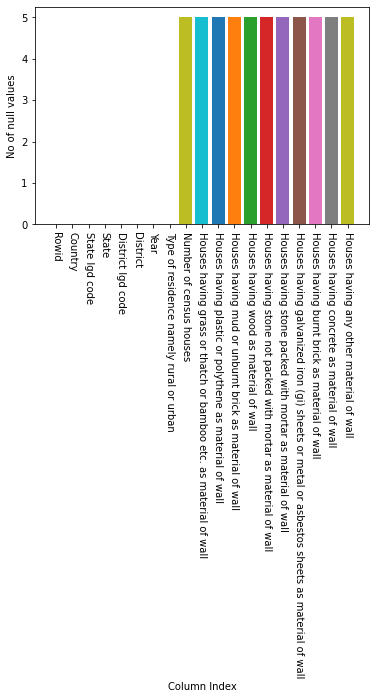

In [ ]:
for col in df.columns.values: #iterate over all columns
  pyplot.bar(col,df[col].isnull().sum(),label=col) #plot col on X axis and the number of null values on y axis
                                         #gives the true(1) and false(0) values whether the data in a row
                                         #is null , by adding we get the number of 1s i.e number of True   
pyplot.xlabel('Column Index') #give label to x axis
pyplot.ylabel('No of null values') #label for y axis
#pyplot.legend()
pyplot.xticks(rotation=270)
pyplot.show() #show the plot

All columns starting from *number of census houses* have 5 missing values , best case scenario is that only 5 rows have one or more values missing and the worst case scenario is that 55 rows have one or more missing values

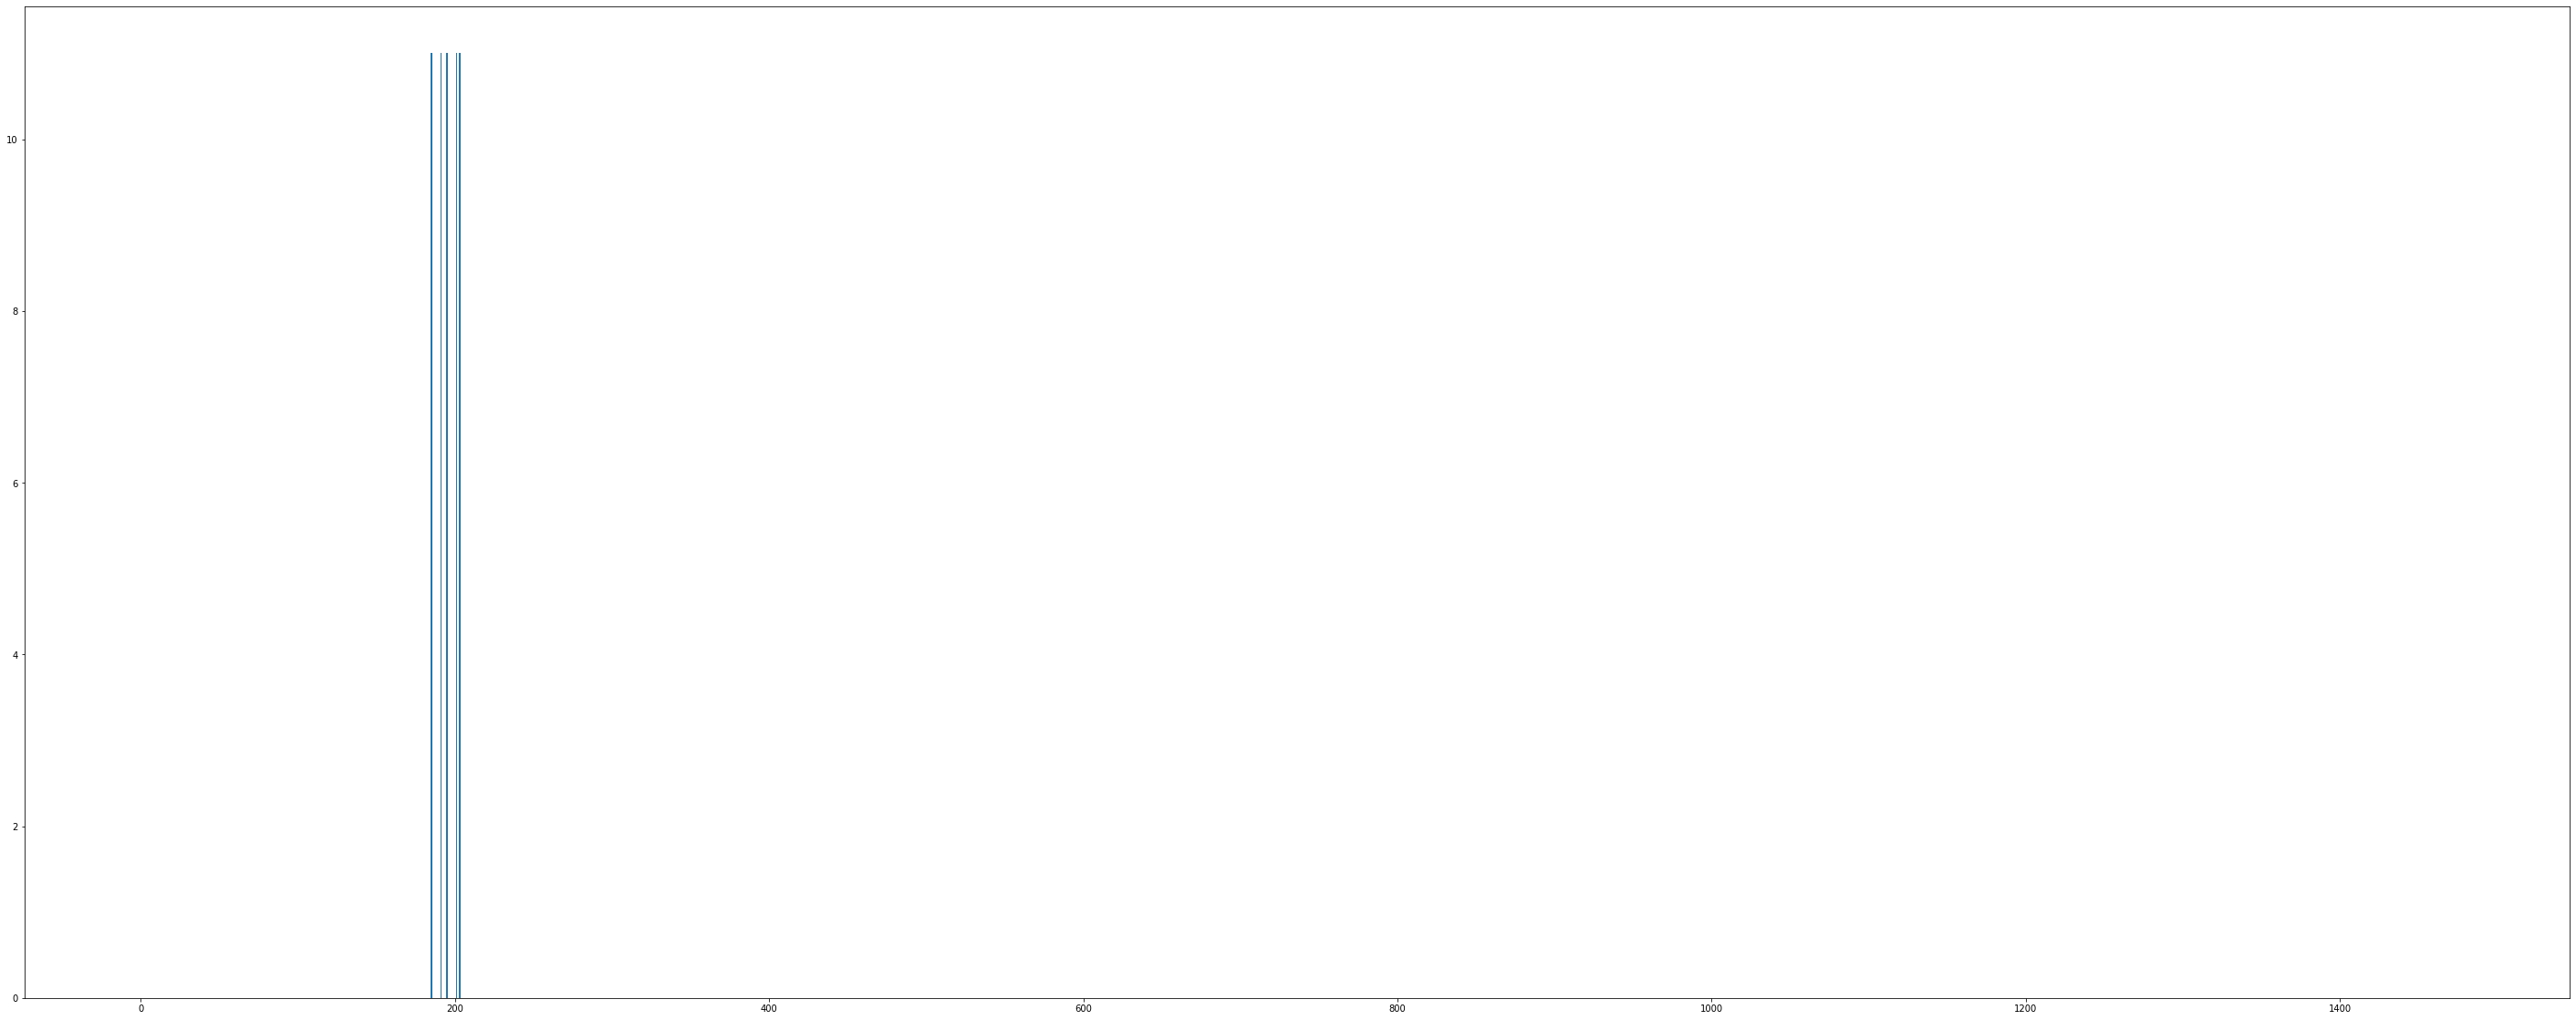

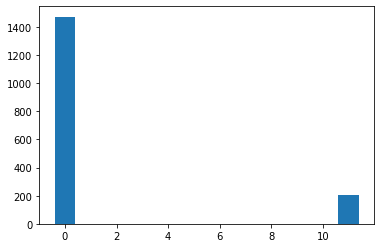

In [ ]:
l=[] #declare temporary list before sorting
for row in range(df.shape[0]): #iterate over all rows
  l.append((df.iloc()[row].isnull().sum(),row)) #add number of null values and row number to temporary list
l.sort(key=lambda x: x[0]) #sort this wrt number of occurences
x_coord=[i[1] for i in l] #using list comprehension to get datapoints in required format
y_coord=[i[0] for i in l] #using list comprehension to get datapoints in required format
fig=pyplot.figure() #resize the plot
fig.set_figwidth(50)
fig.set_figheight(20)
pyplot.bar(x_coord,y_coord) #plot the bar graph
pyplot.show() #show the figure
pyplot.bar(y_coord,x_coord)
pyplot.show()

5 rows has 11 entries missing , combinig this information with the previous cell's result we have that for 5 rows no data in columns I to S is present

In [ ]:

df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['Houses having grass or thatch or bamboo etc. as material of wall'] = pd.to_numeric(df.replace({'Houses having grass or thatch or bamboo etc. as material of wall' : {'zero':0}})['Houses having grass or thatch or bamboo etc. as material of wall']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['Houses having plastic or polythene as material of wall'] = pd.to_numeric(df.replace({'Houses having plastic or polythene as material of wall' : {'zero':0}})['Houses having plastic or polythene as material of wall']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['District lgd code']=df['District lgd code'].replace(999999,np.nan) # one district is named unknown with code 999999
df.dropna(inplace=True)
df.round() # rounding float values
for i in df.columns.values:
  if df[i].dtype=='float64':
    df[i]=df[i].astype(np.int64)
display(df)
print(df.dtypes) #display the changes in dtypes

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

      Number of census houses  \
0                      109465   
1                       33522   
2                       85561   
3                       13136   
4                      120312   
...                       ...   
1468                    42352   
1469                     5410   
1470                     5279   
1471                    35408   
1472                    37655   

      Houses having grass or thatch or bamboo etc. as material of wall  \
0                                                   270                  
1                                                    69                  
2                                                   134                  
3                                                    49                  
4                                                   410                  
...                                                 ...                  
1468                                                202                  
1469                                                  6                  
1470                                                 11                  
1471                                              16428                  
1472                                               2156                  

      Houses having plastic or polythene as material of wall  \
0                                                  1331        
1                                                   121        
2                                                   168        
3                                                    27        
4                                                   173        
...                                                 .

Rowid                                                                                         int64
Country                                                                                      object
State lgd code                                                                                int64
State                                                                                        object
District lgd code                                                                             int64
District                                                                                     object
Year                                                                                          int64
Type of residence namely rural or urban                                                      object
Number of census houses                                                                       int64
Houses having grass or thatch or bamboo etc. as material of wall                              int64


There were 3 columns that had dtype as objects but should have been numerical , in converting to numerical there were errors in all 3 as zero as a string was written. So 'zero' was replaced by 0. There is also a district with name unknown and code 999999.
Float values are converted to int64. Rows containing NaN values are dropped as well

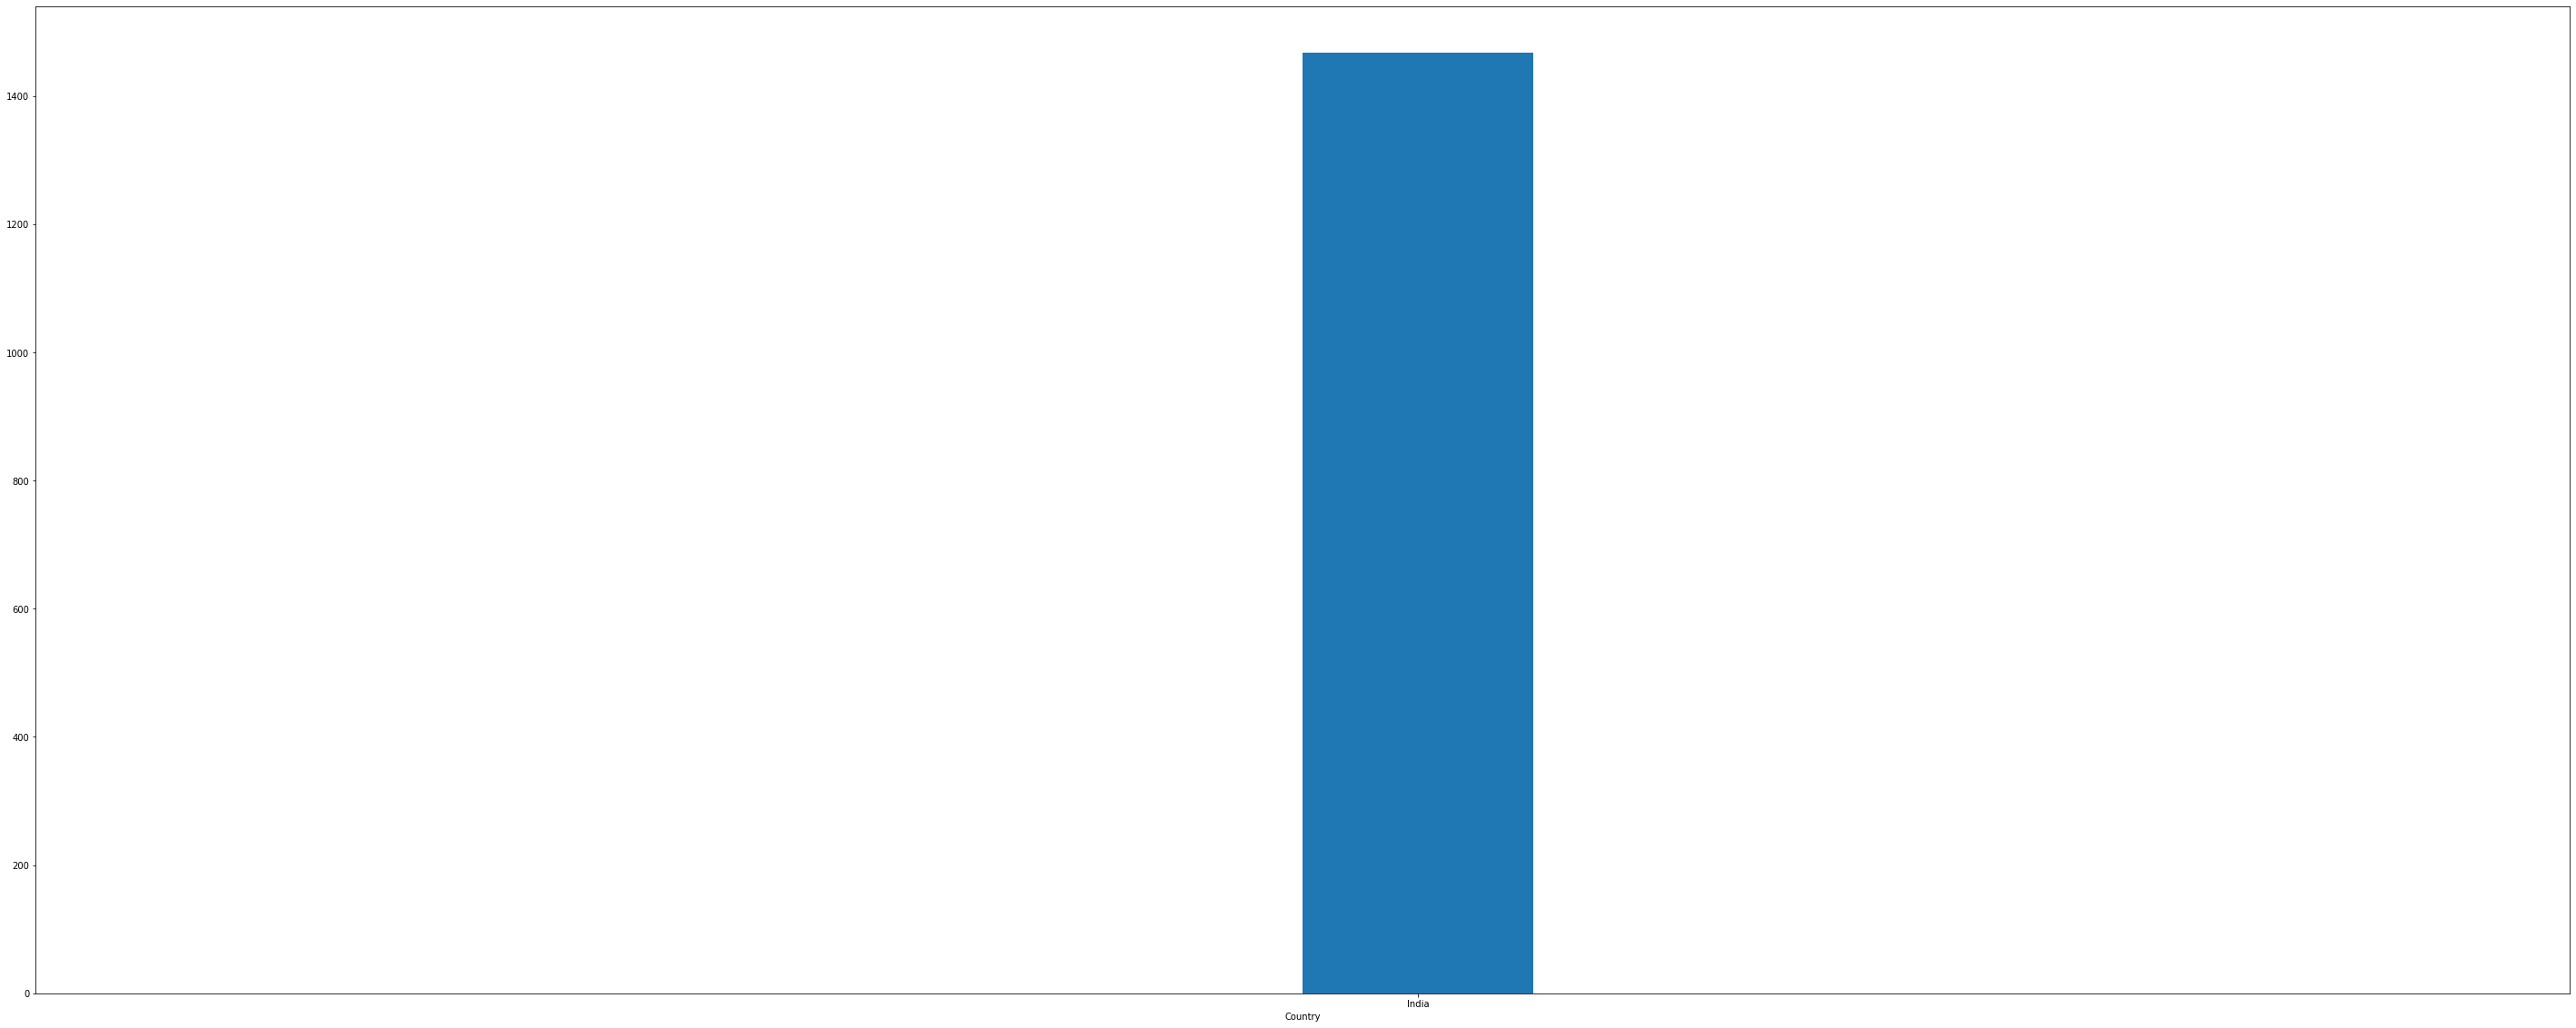

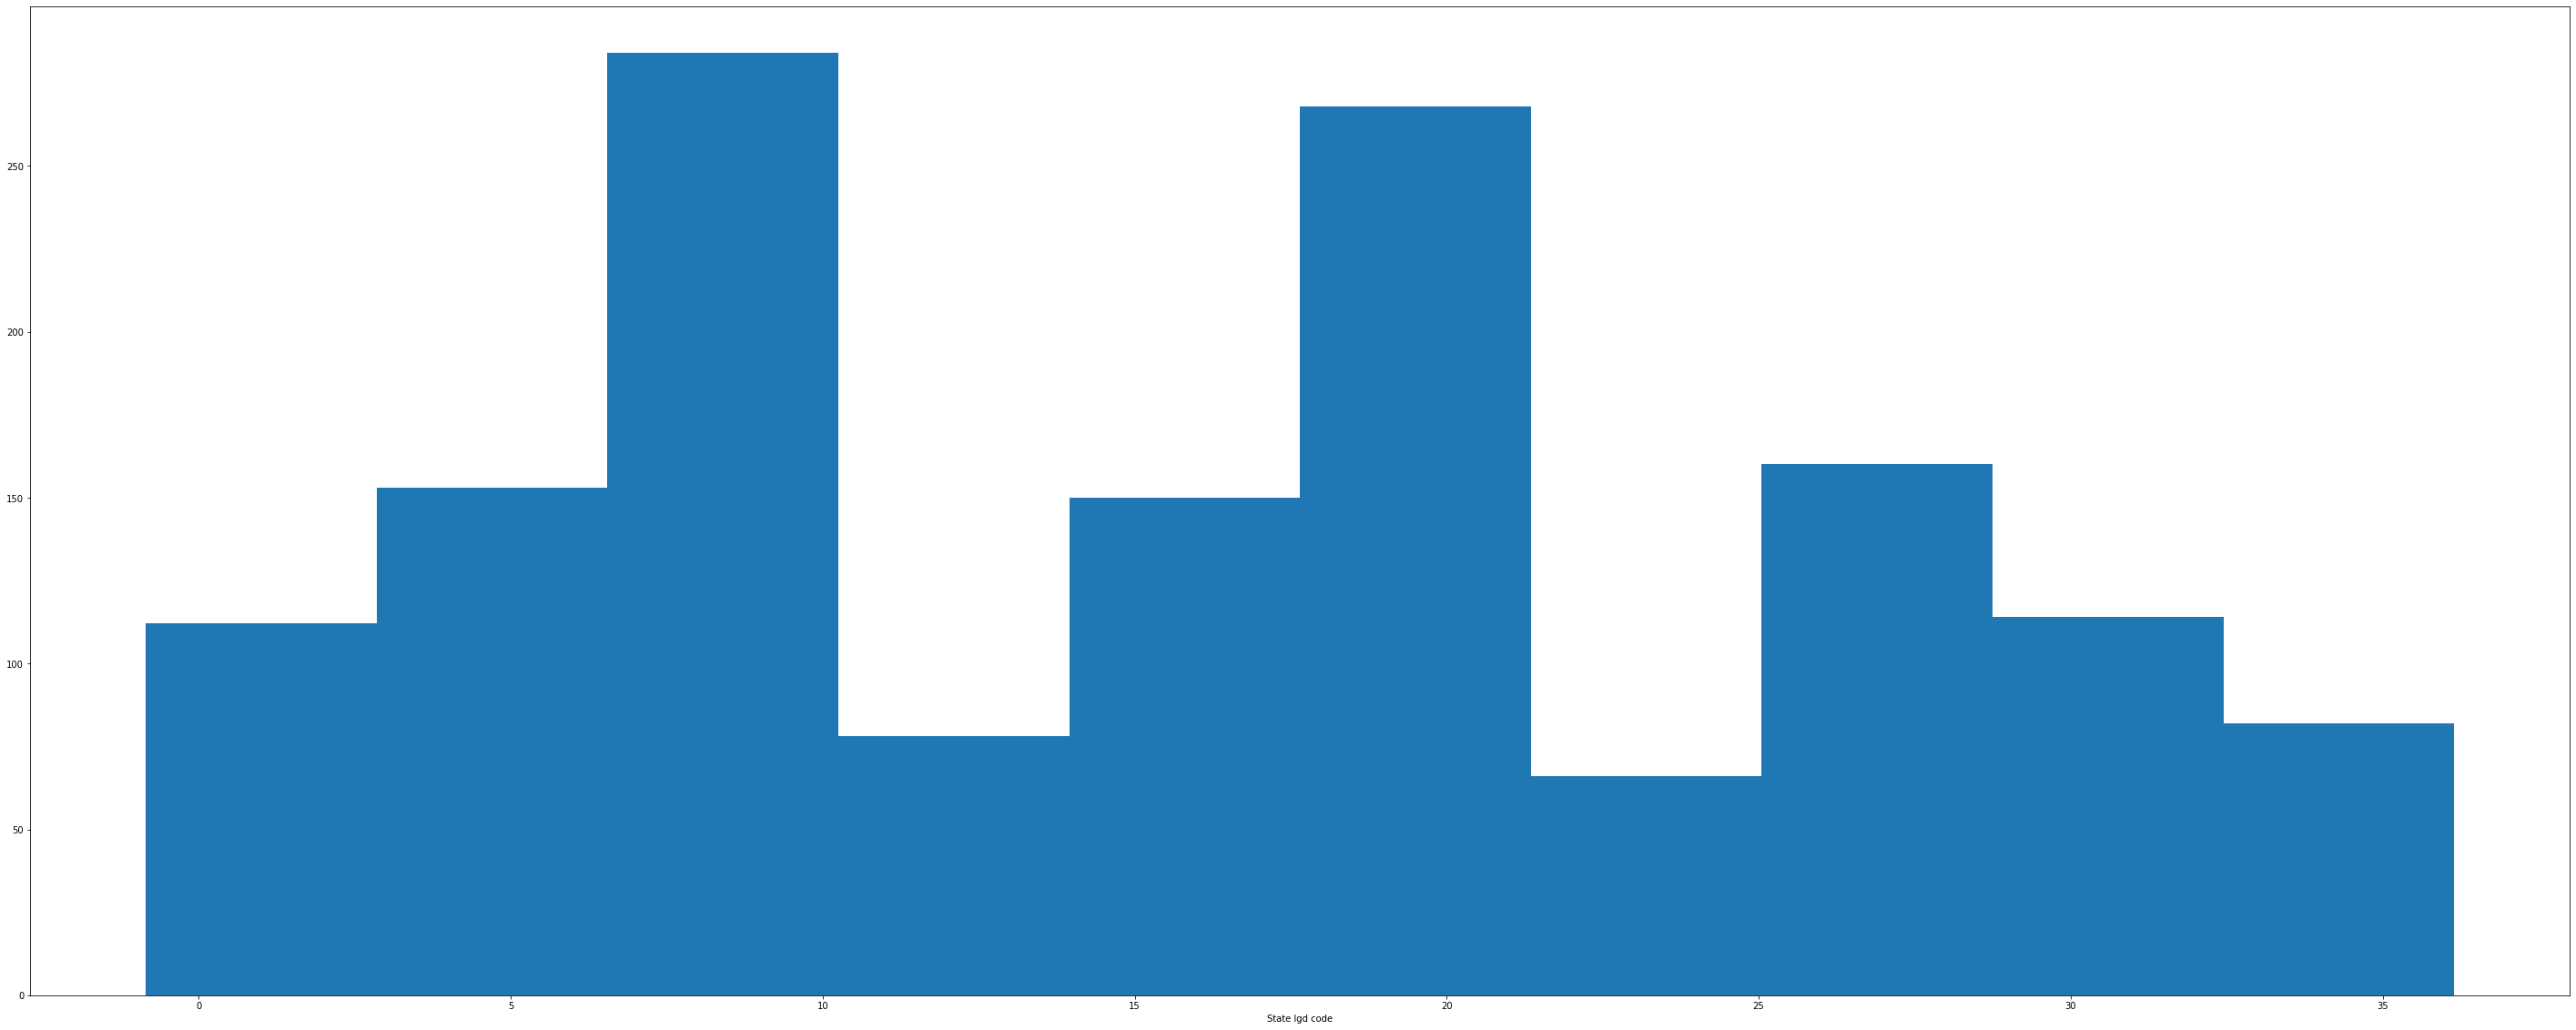

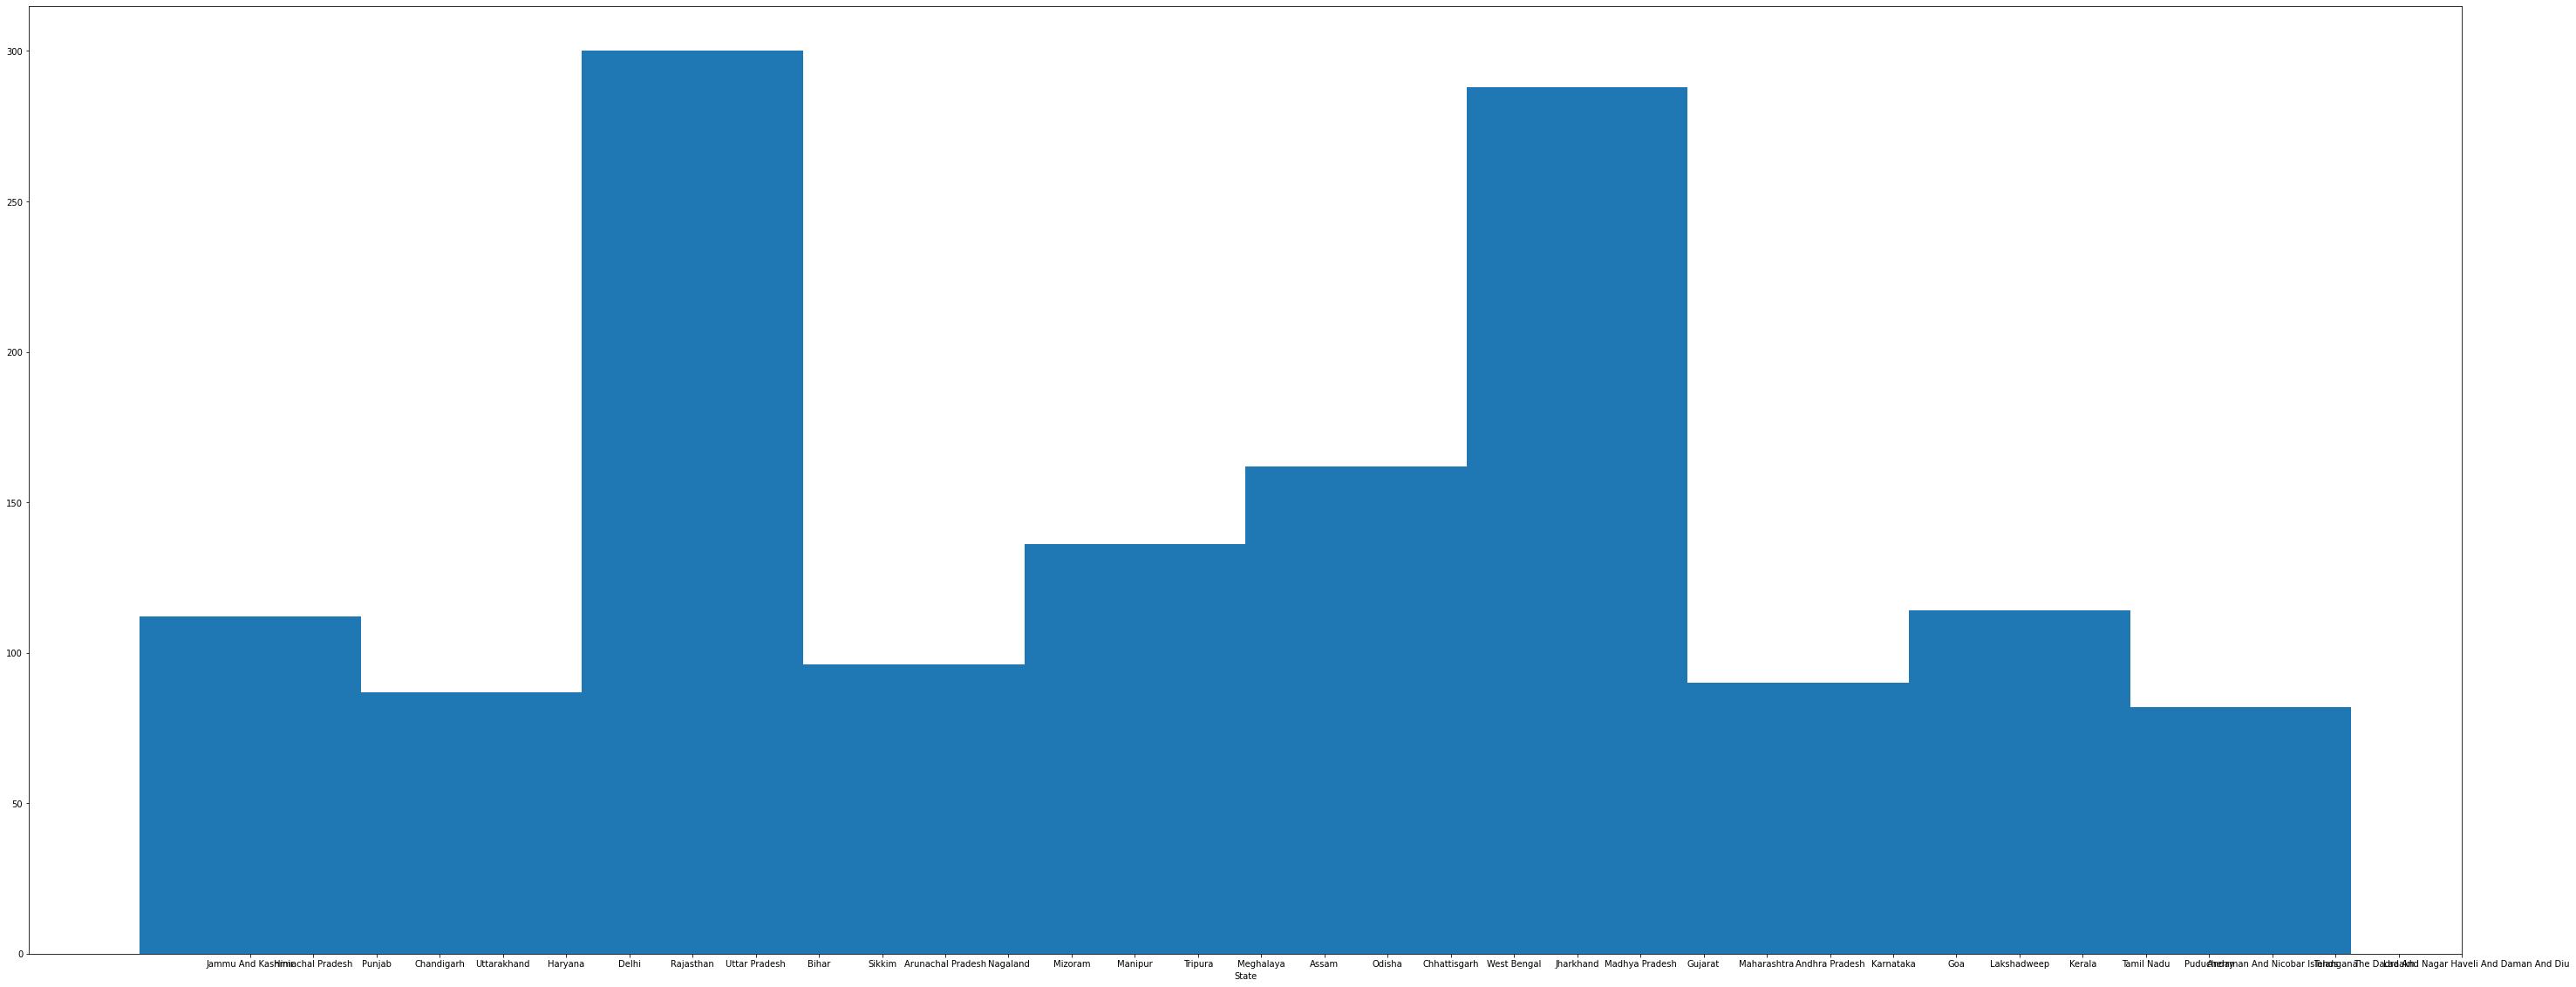

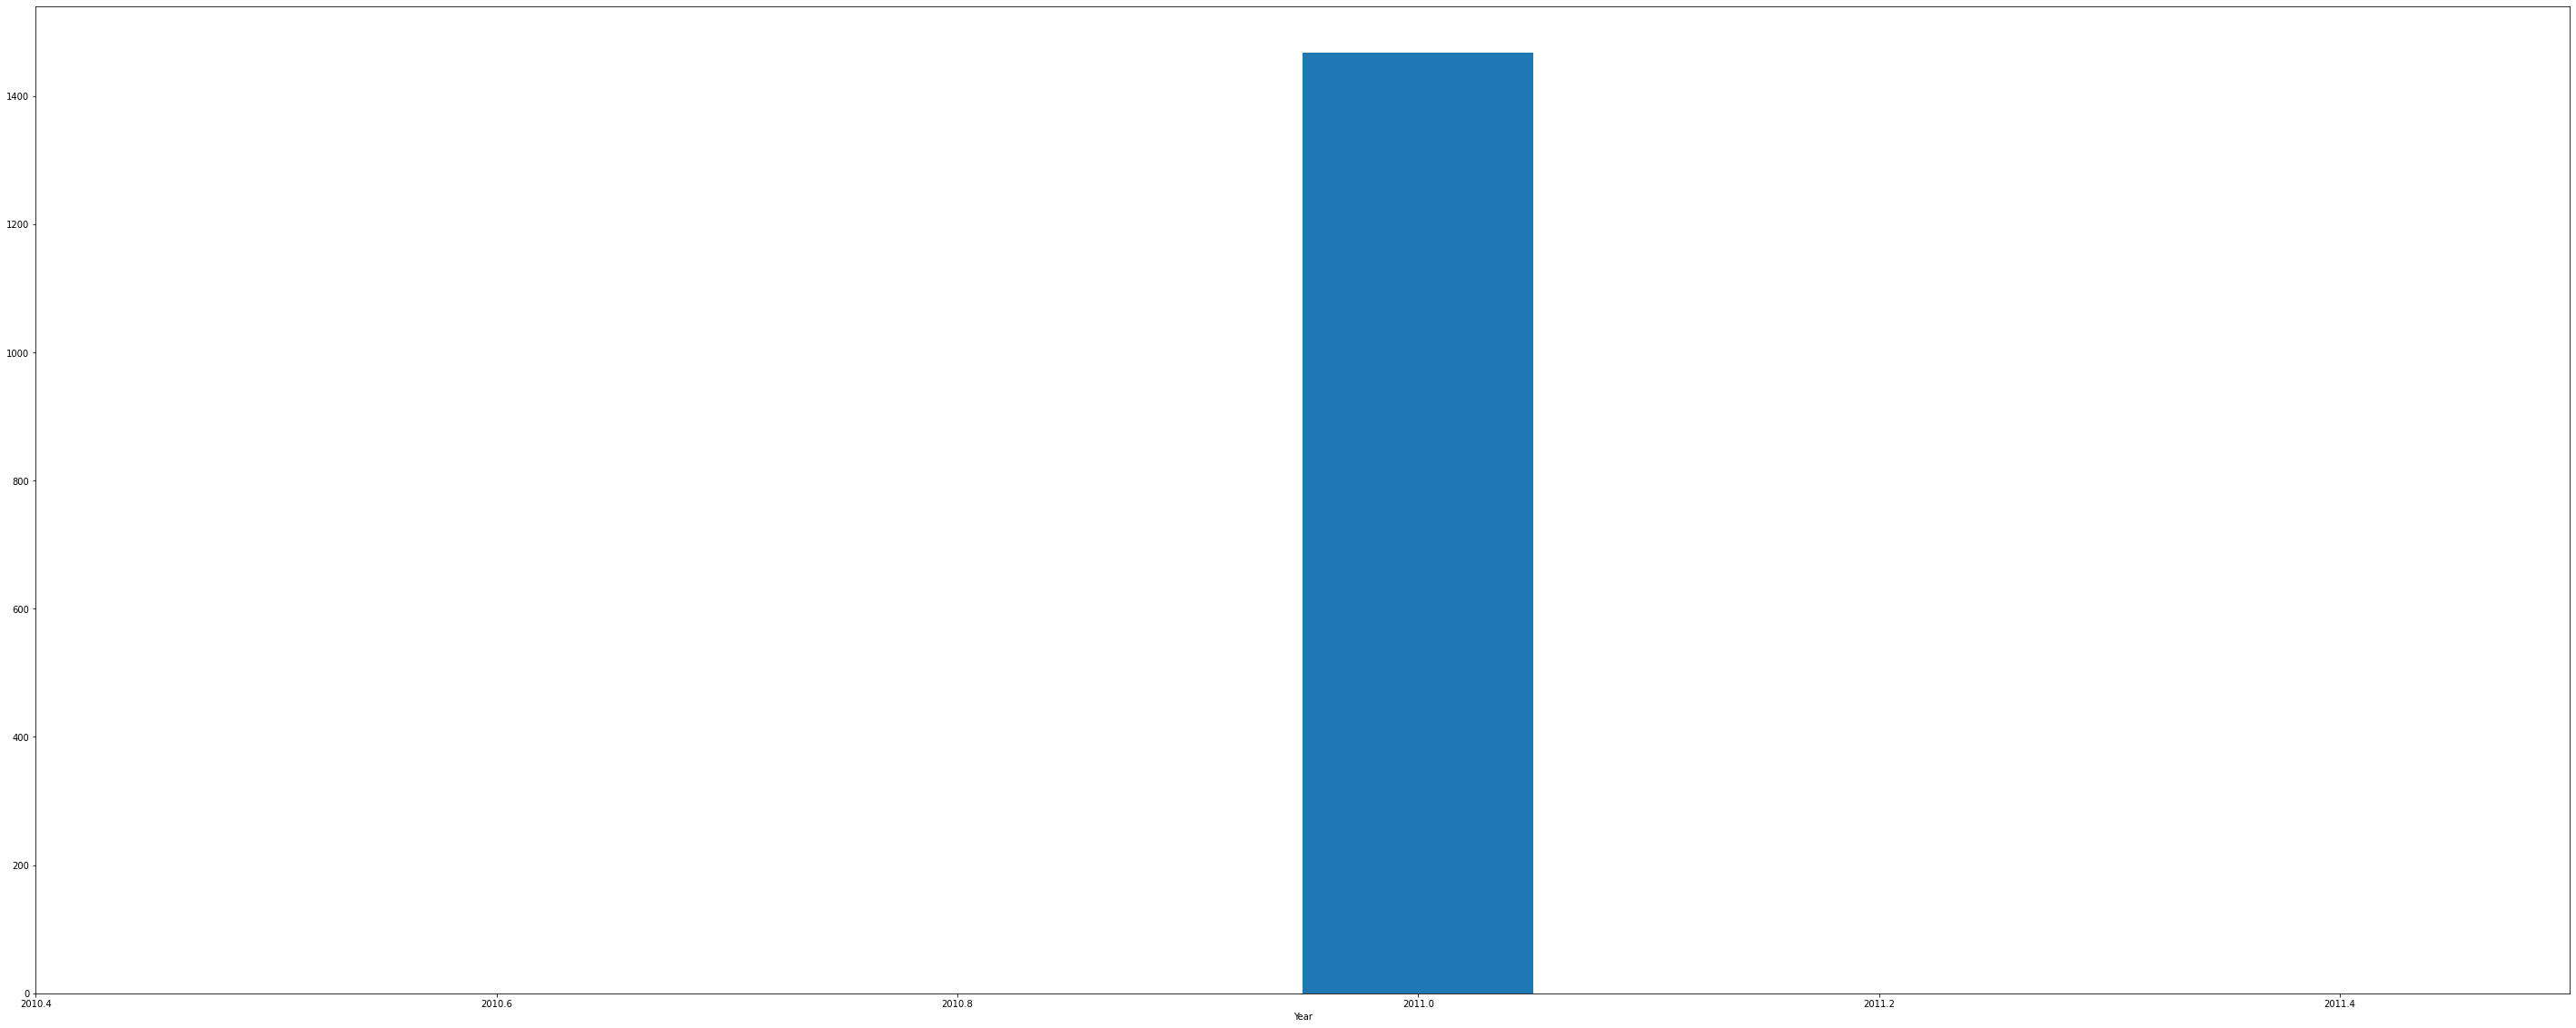

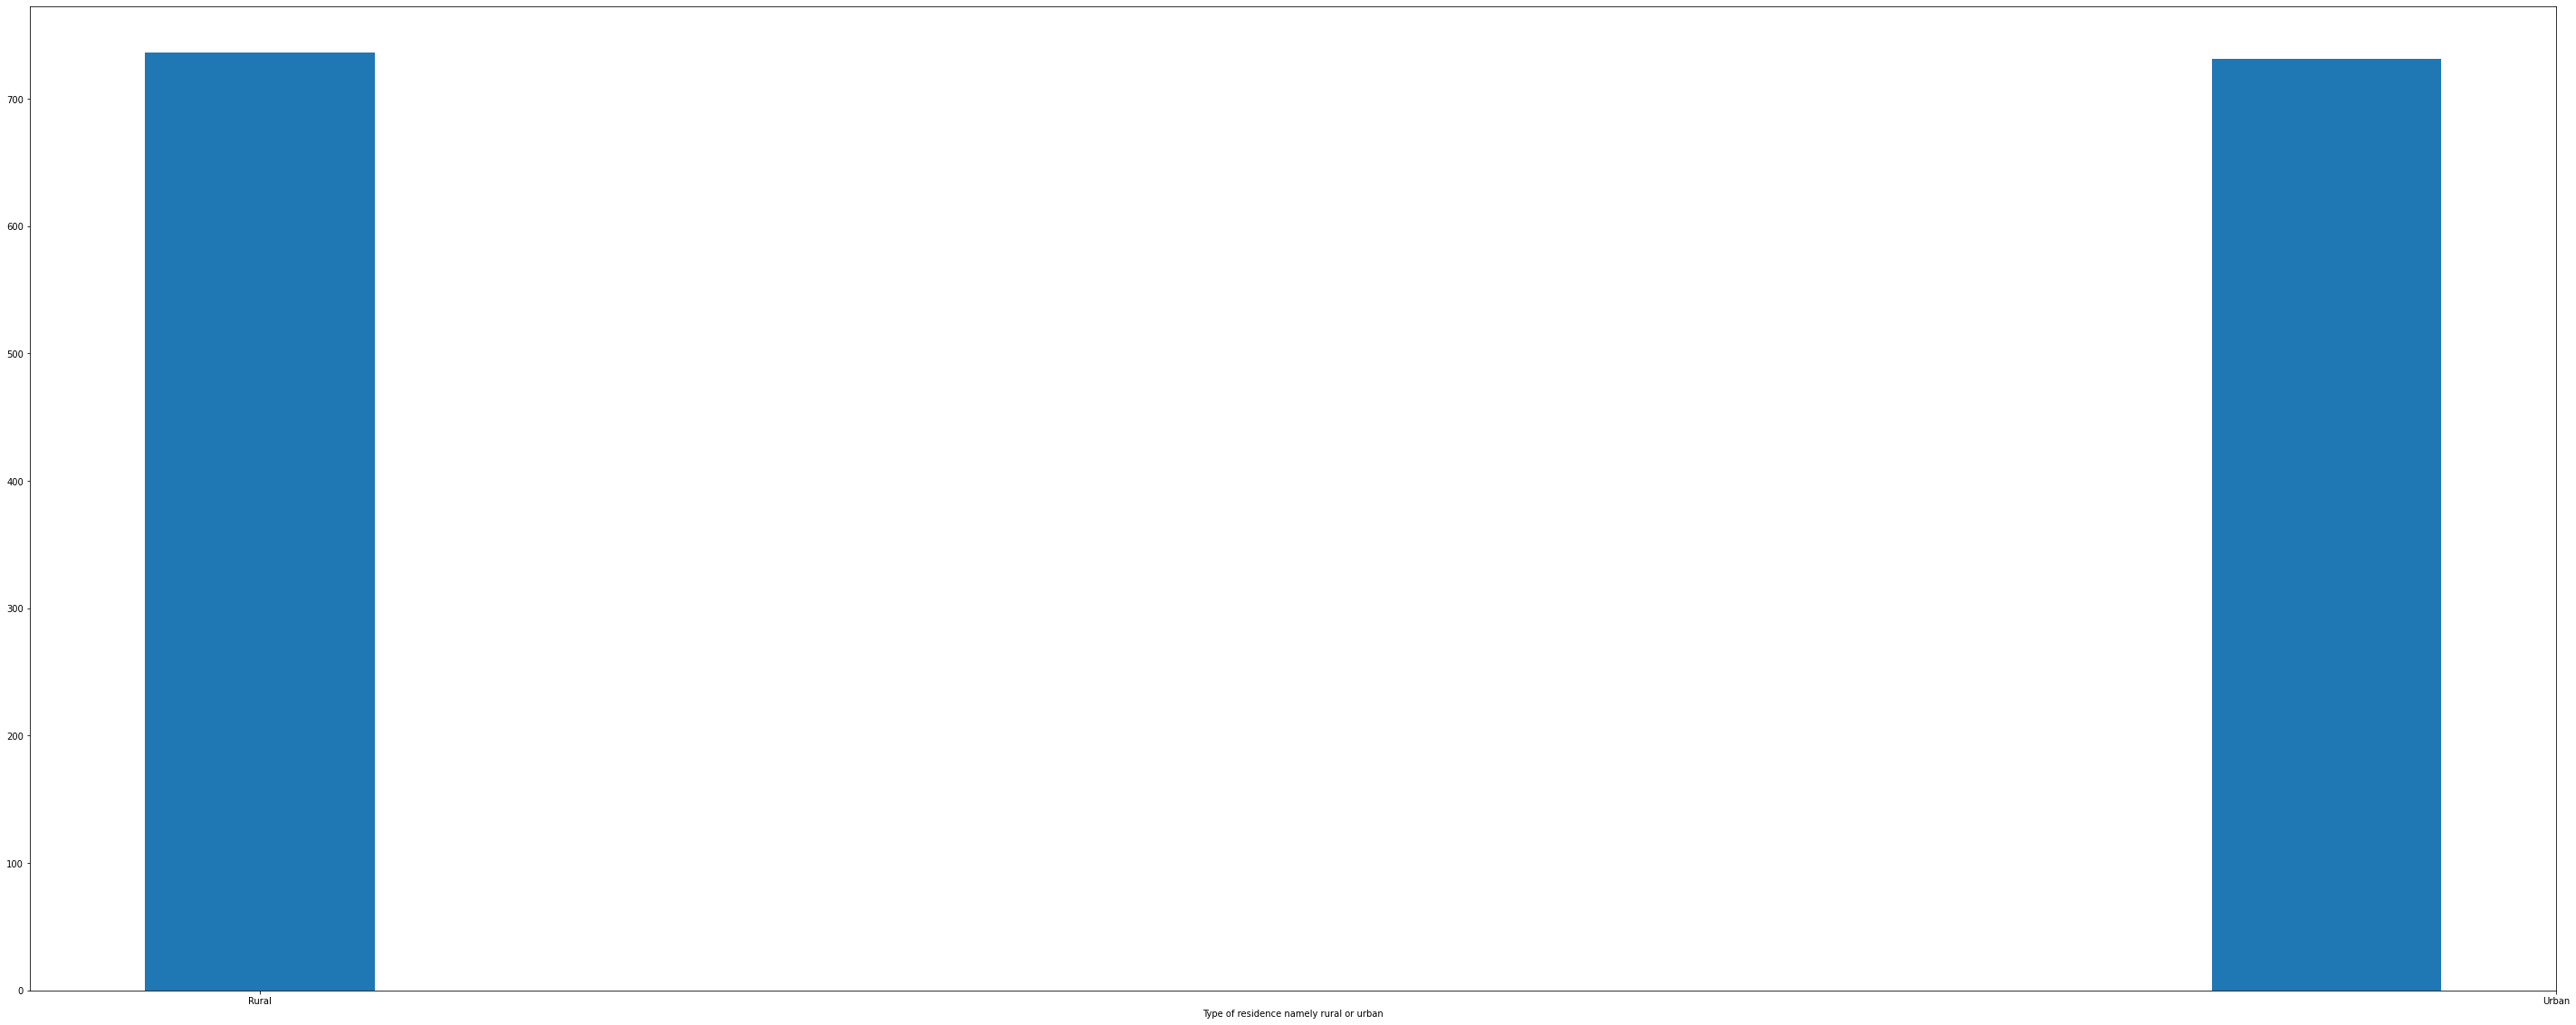

In [ ]:
for col in df.columns[:8]: #iterate over columns
  if col!='Rowid' and col[:8]!='District': #most of discrete variables except rowid,district names , district code are if dtype int64 or object
    fig=pyplot.figure()
    fig.set_figwidth(50) #resize the plot
    fig.set_figheight(20)
    pyplot.hist(df[col],align='left') #plot the histogram
    pyplot.xlabel(col) #label the figure
    pyplot.show() #show the figure

State Name and Code are correlated so we don't need to plot both of them. We can observe that data is for India from the year 2011. Data is not uniformly taken from the states. No. of samples per state vary from ~90 to ~300. The sample size may seem proportional to population from large value for Rajasthan and Uttar Pradesh and low values of north-eastern states with low population. However this is not the case as states like Maharashtra , Tamil Nadu , Andhra Pradesh with significant population also have less number of samples

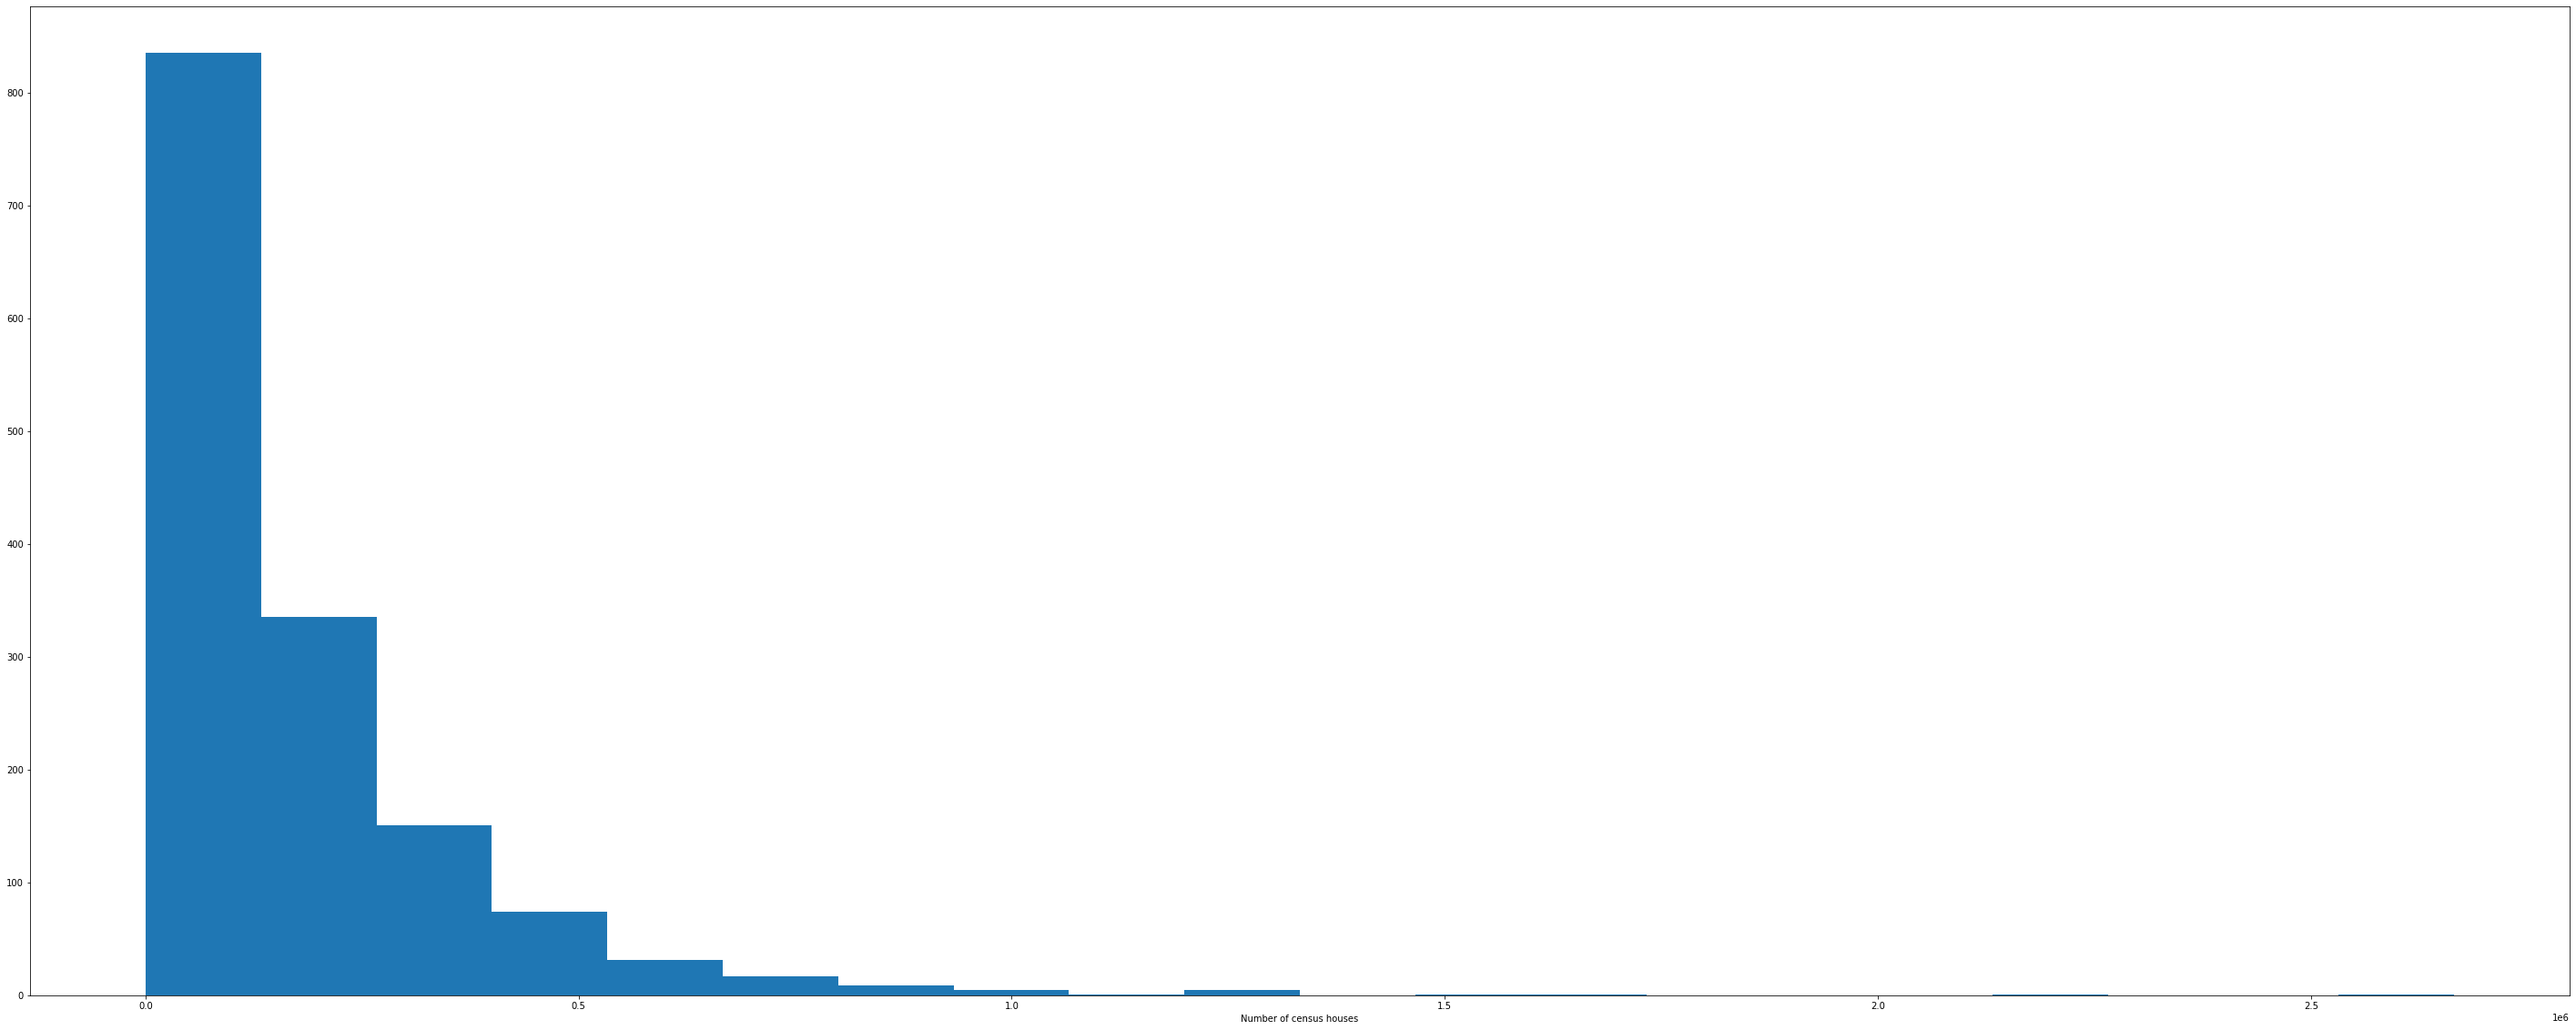

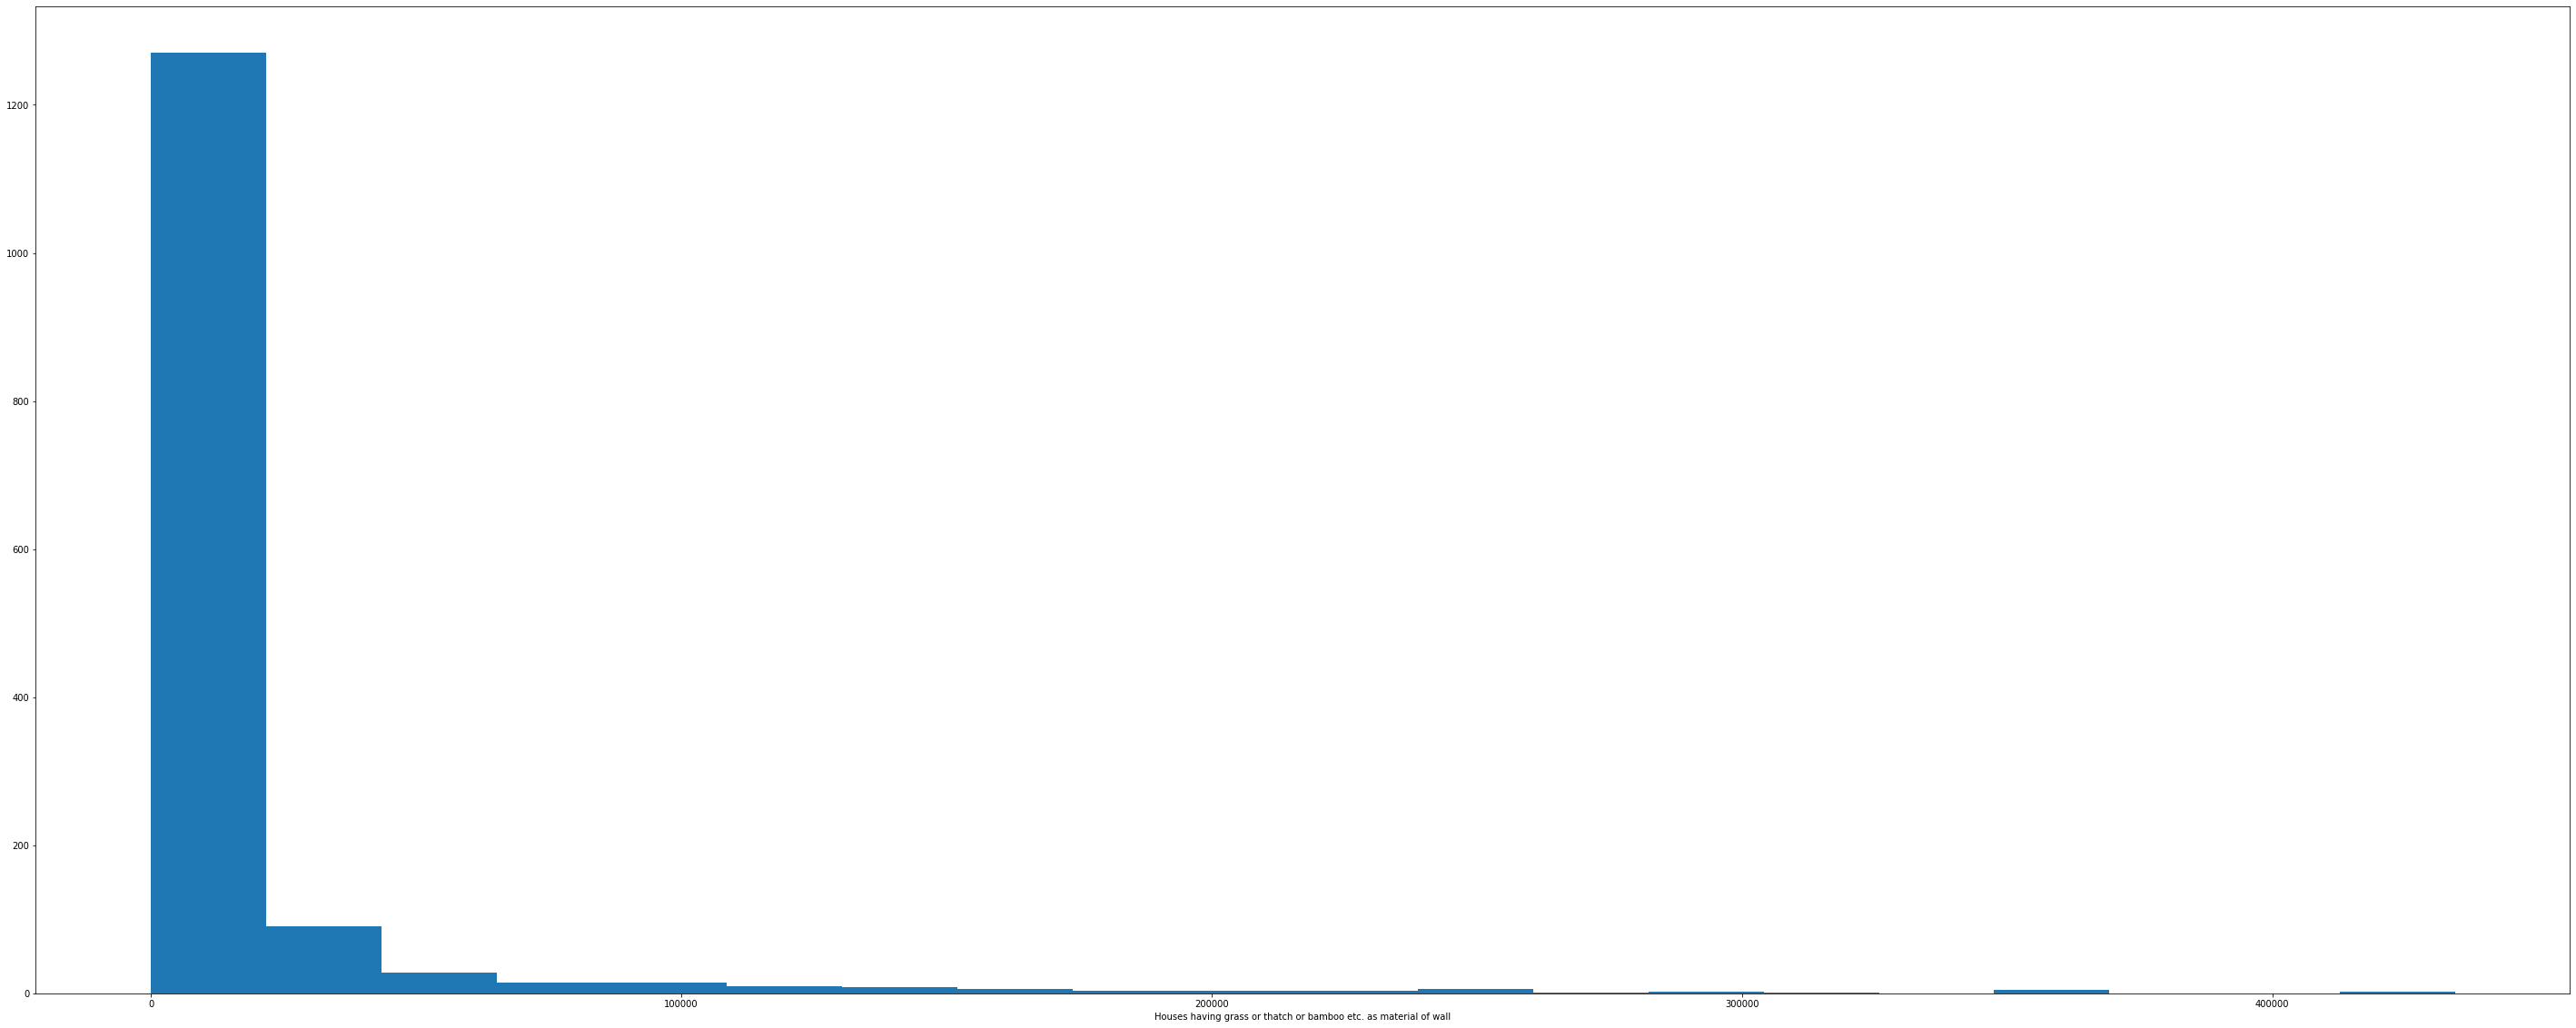

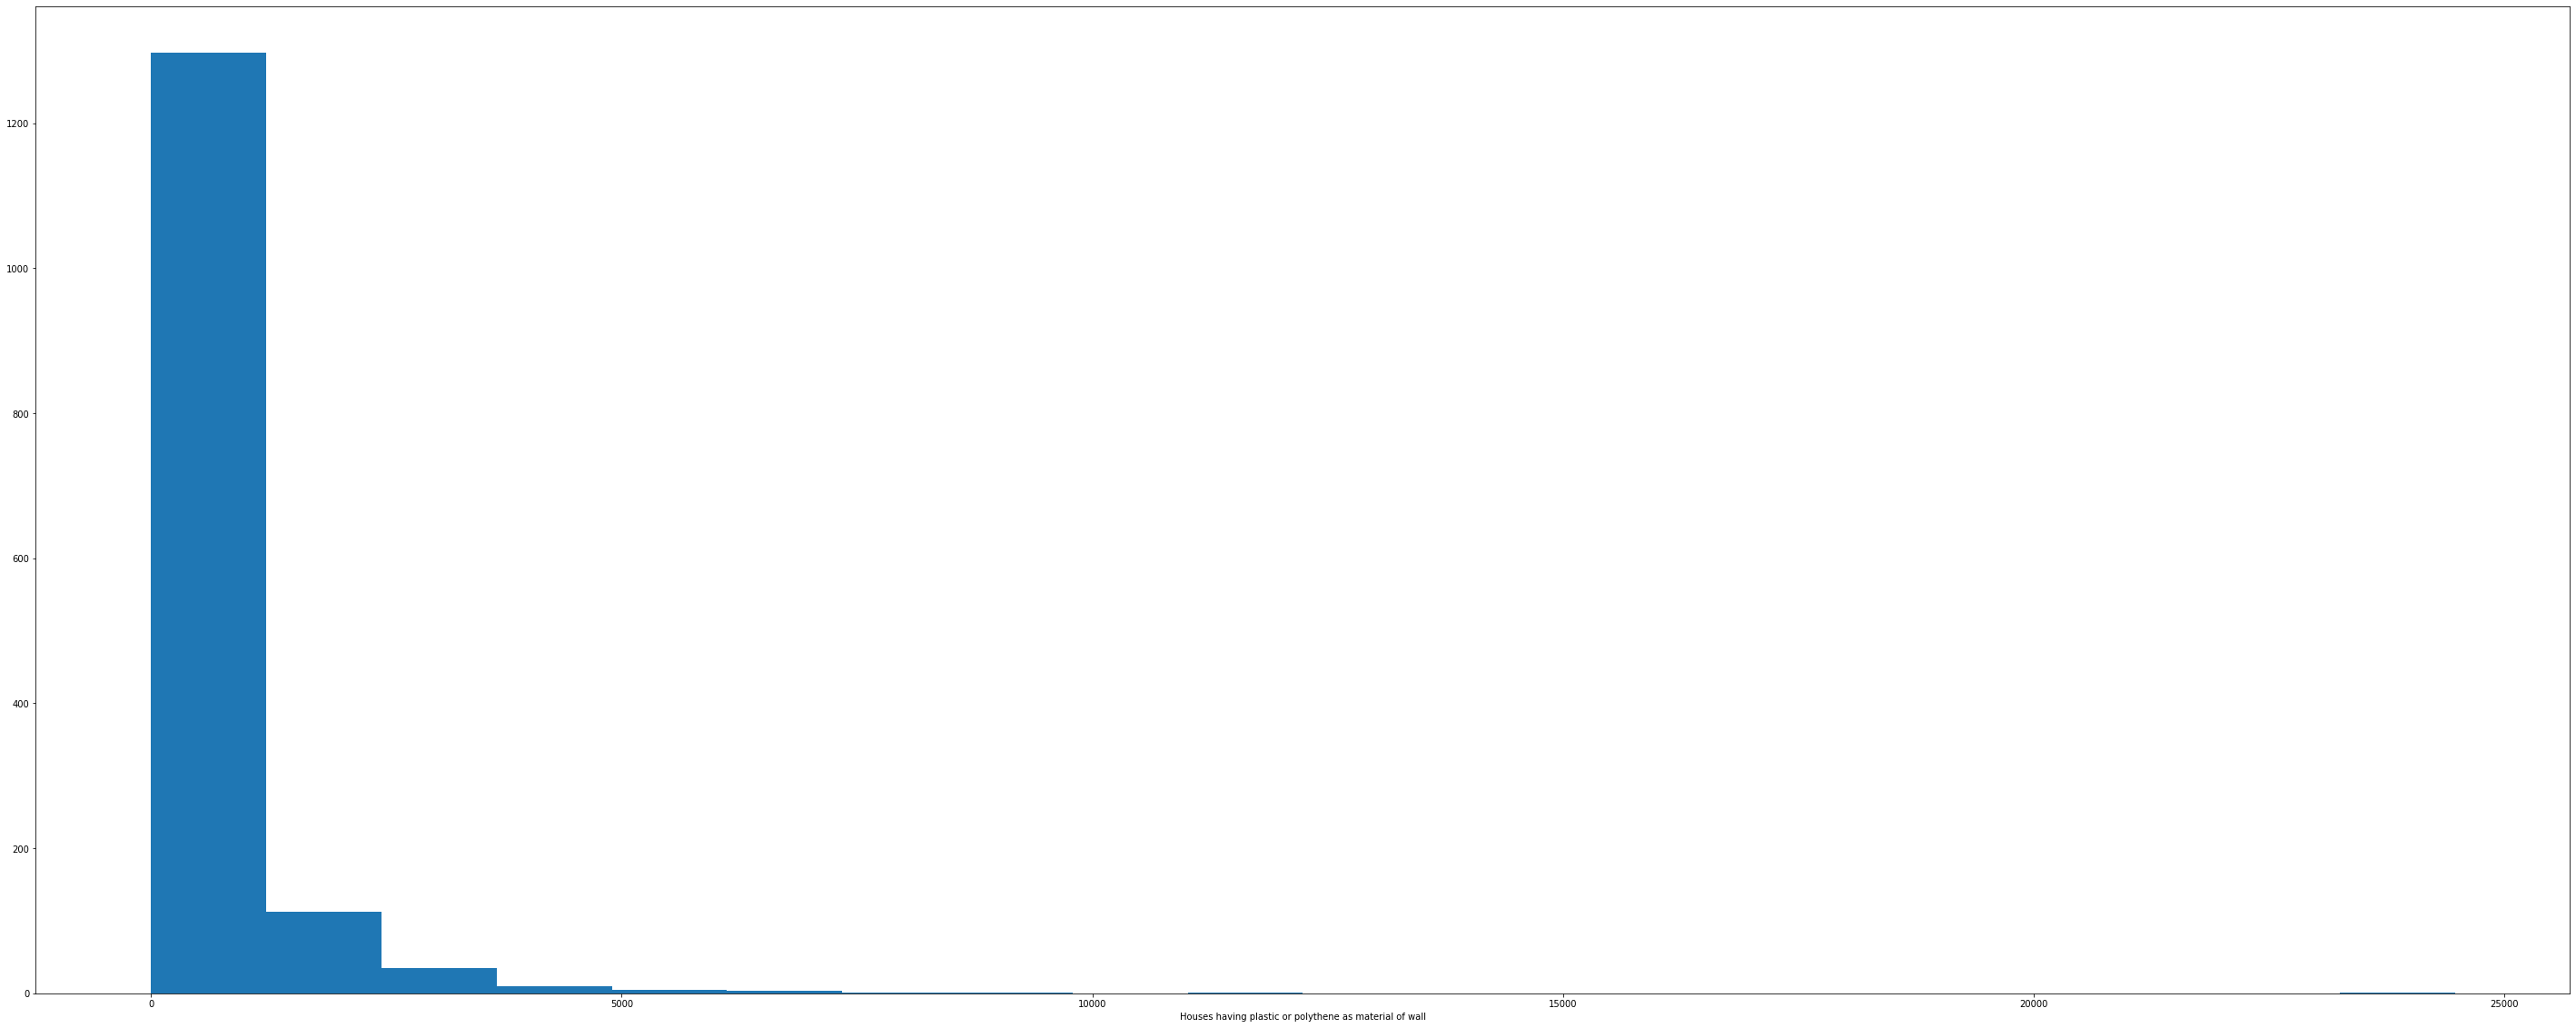

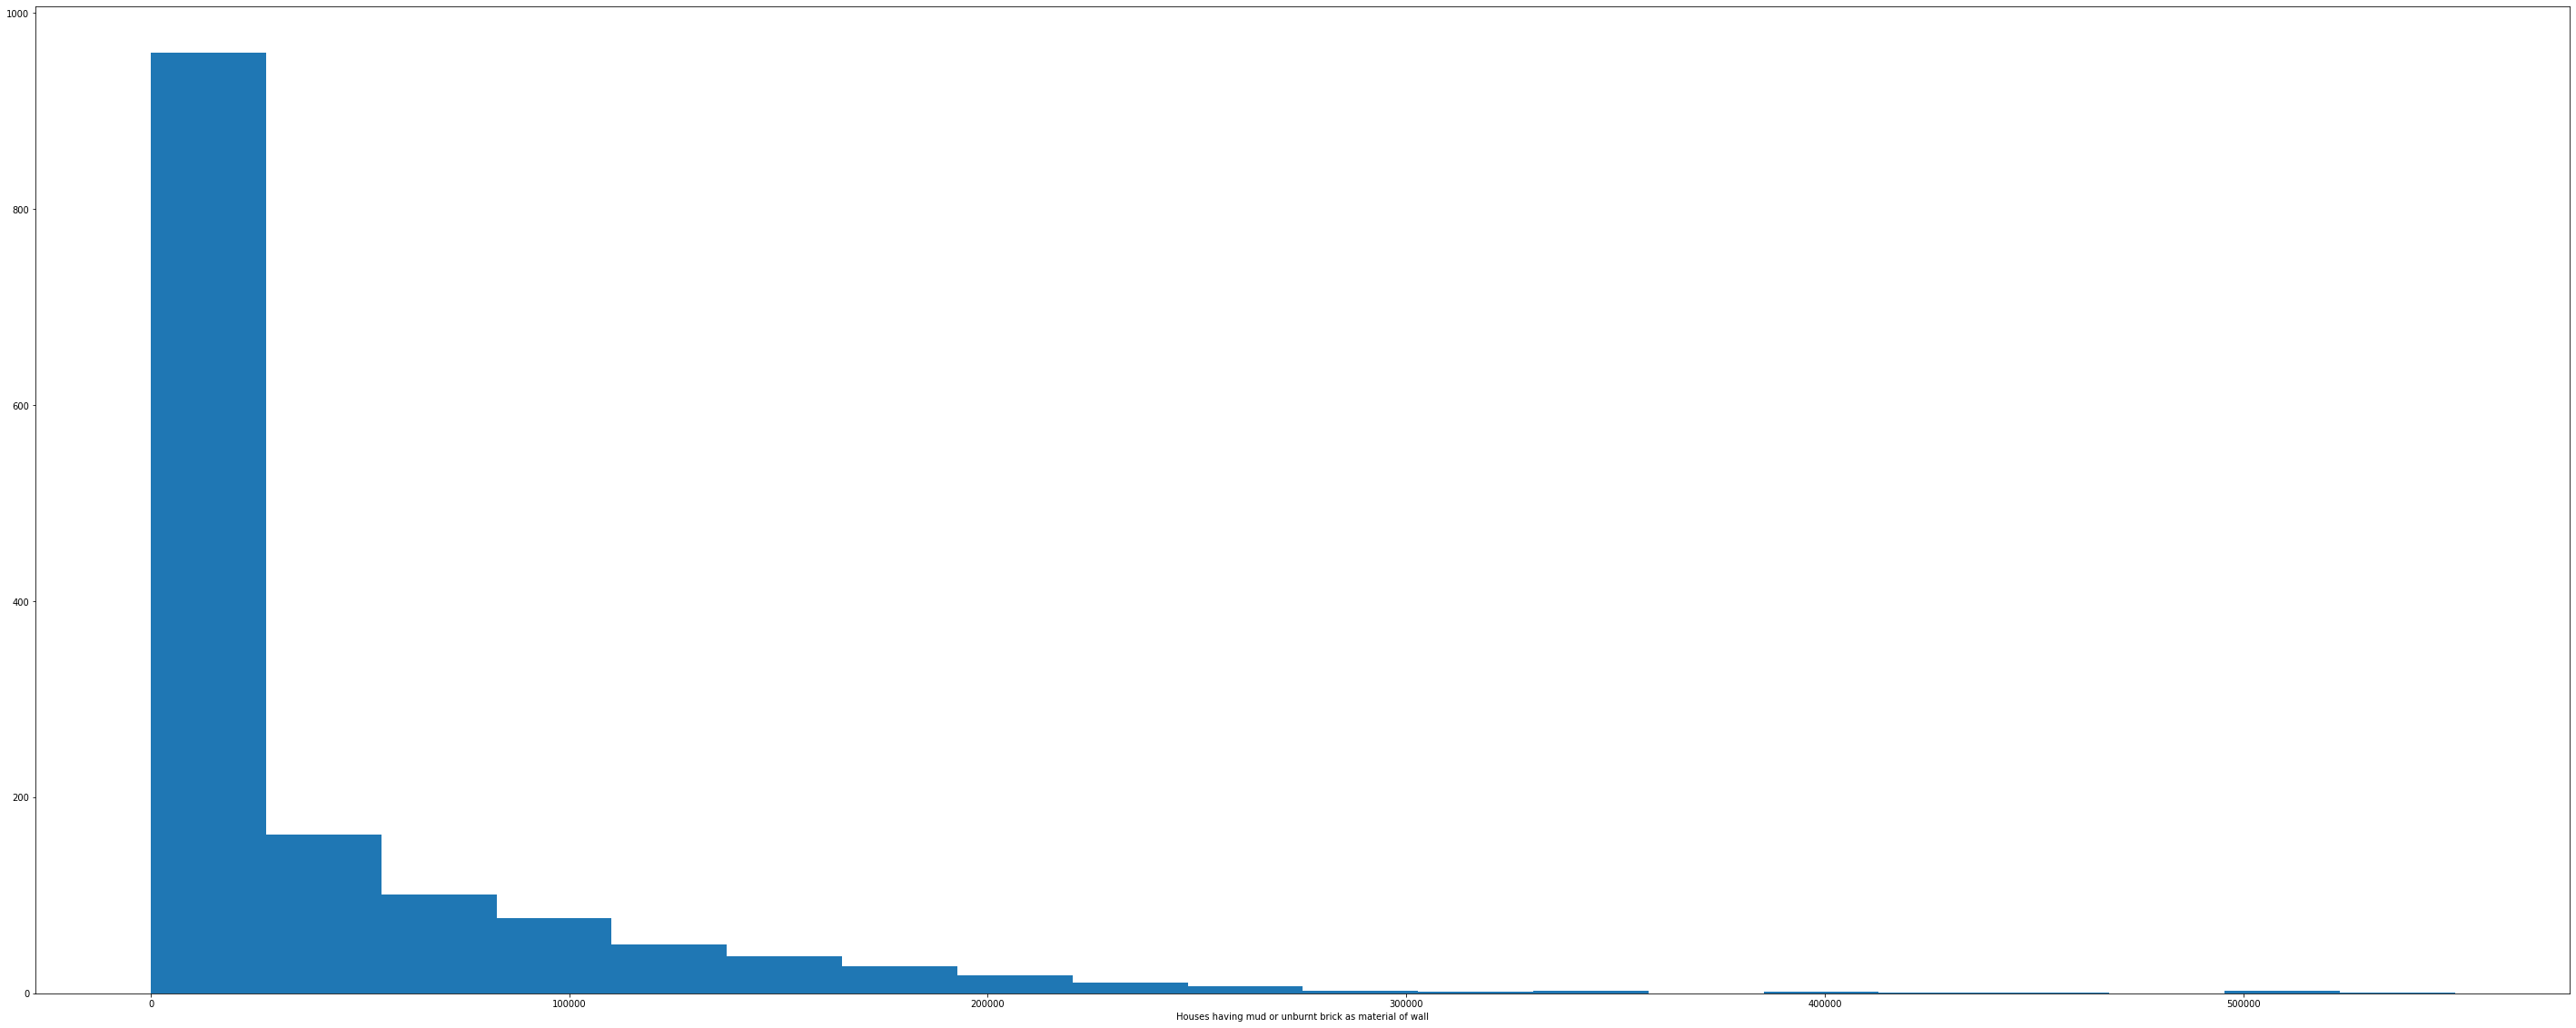

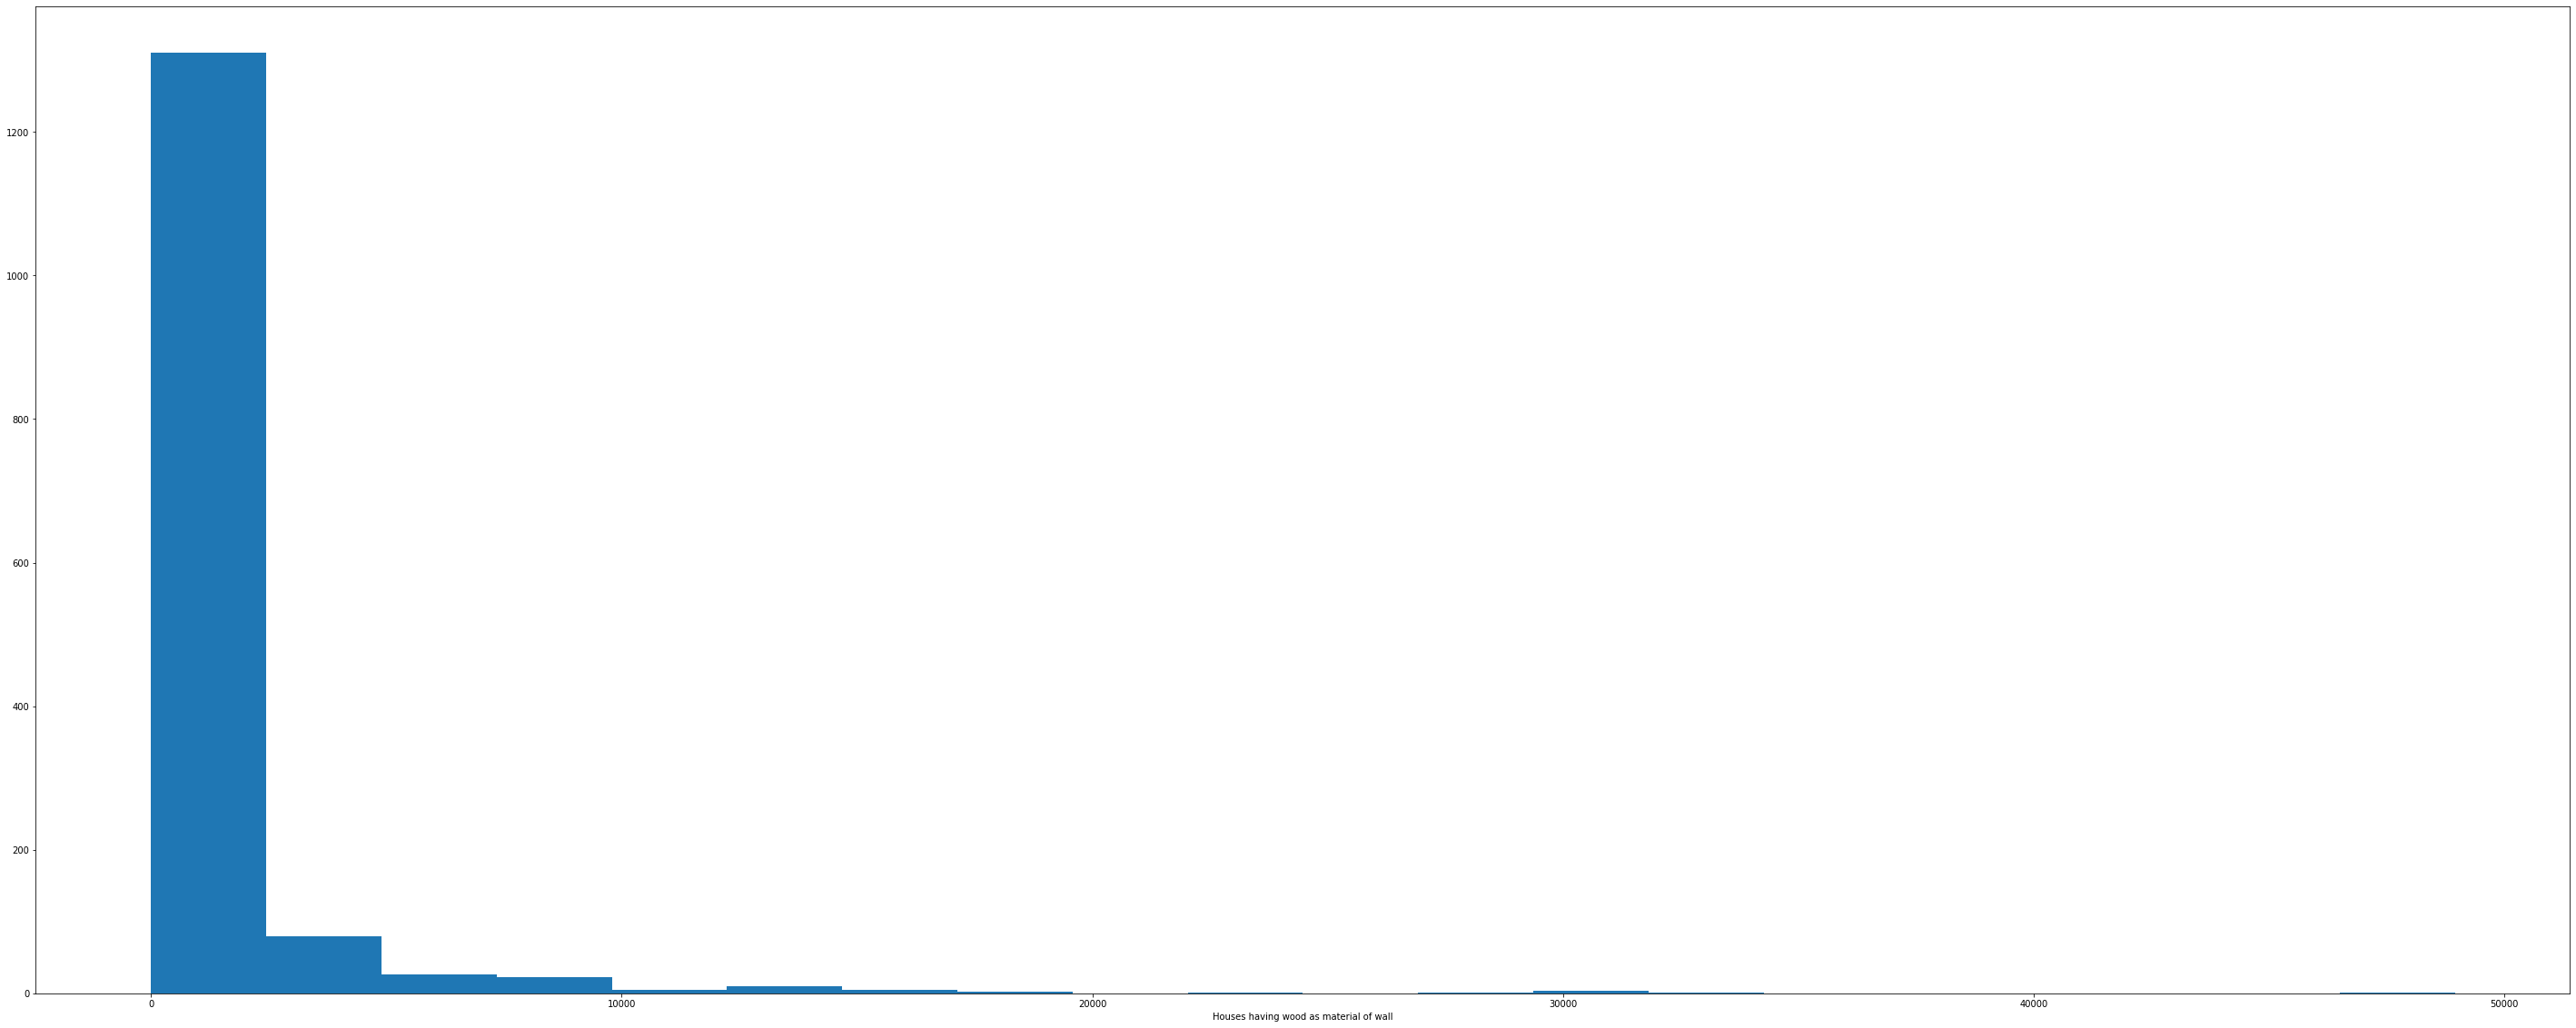

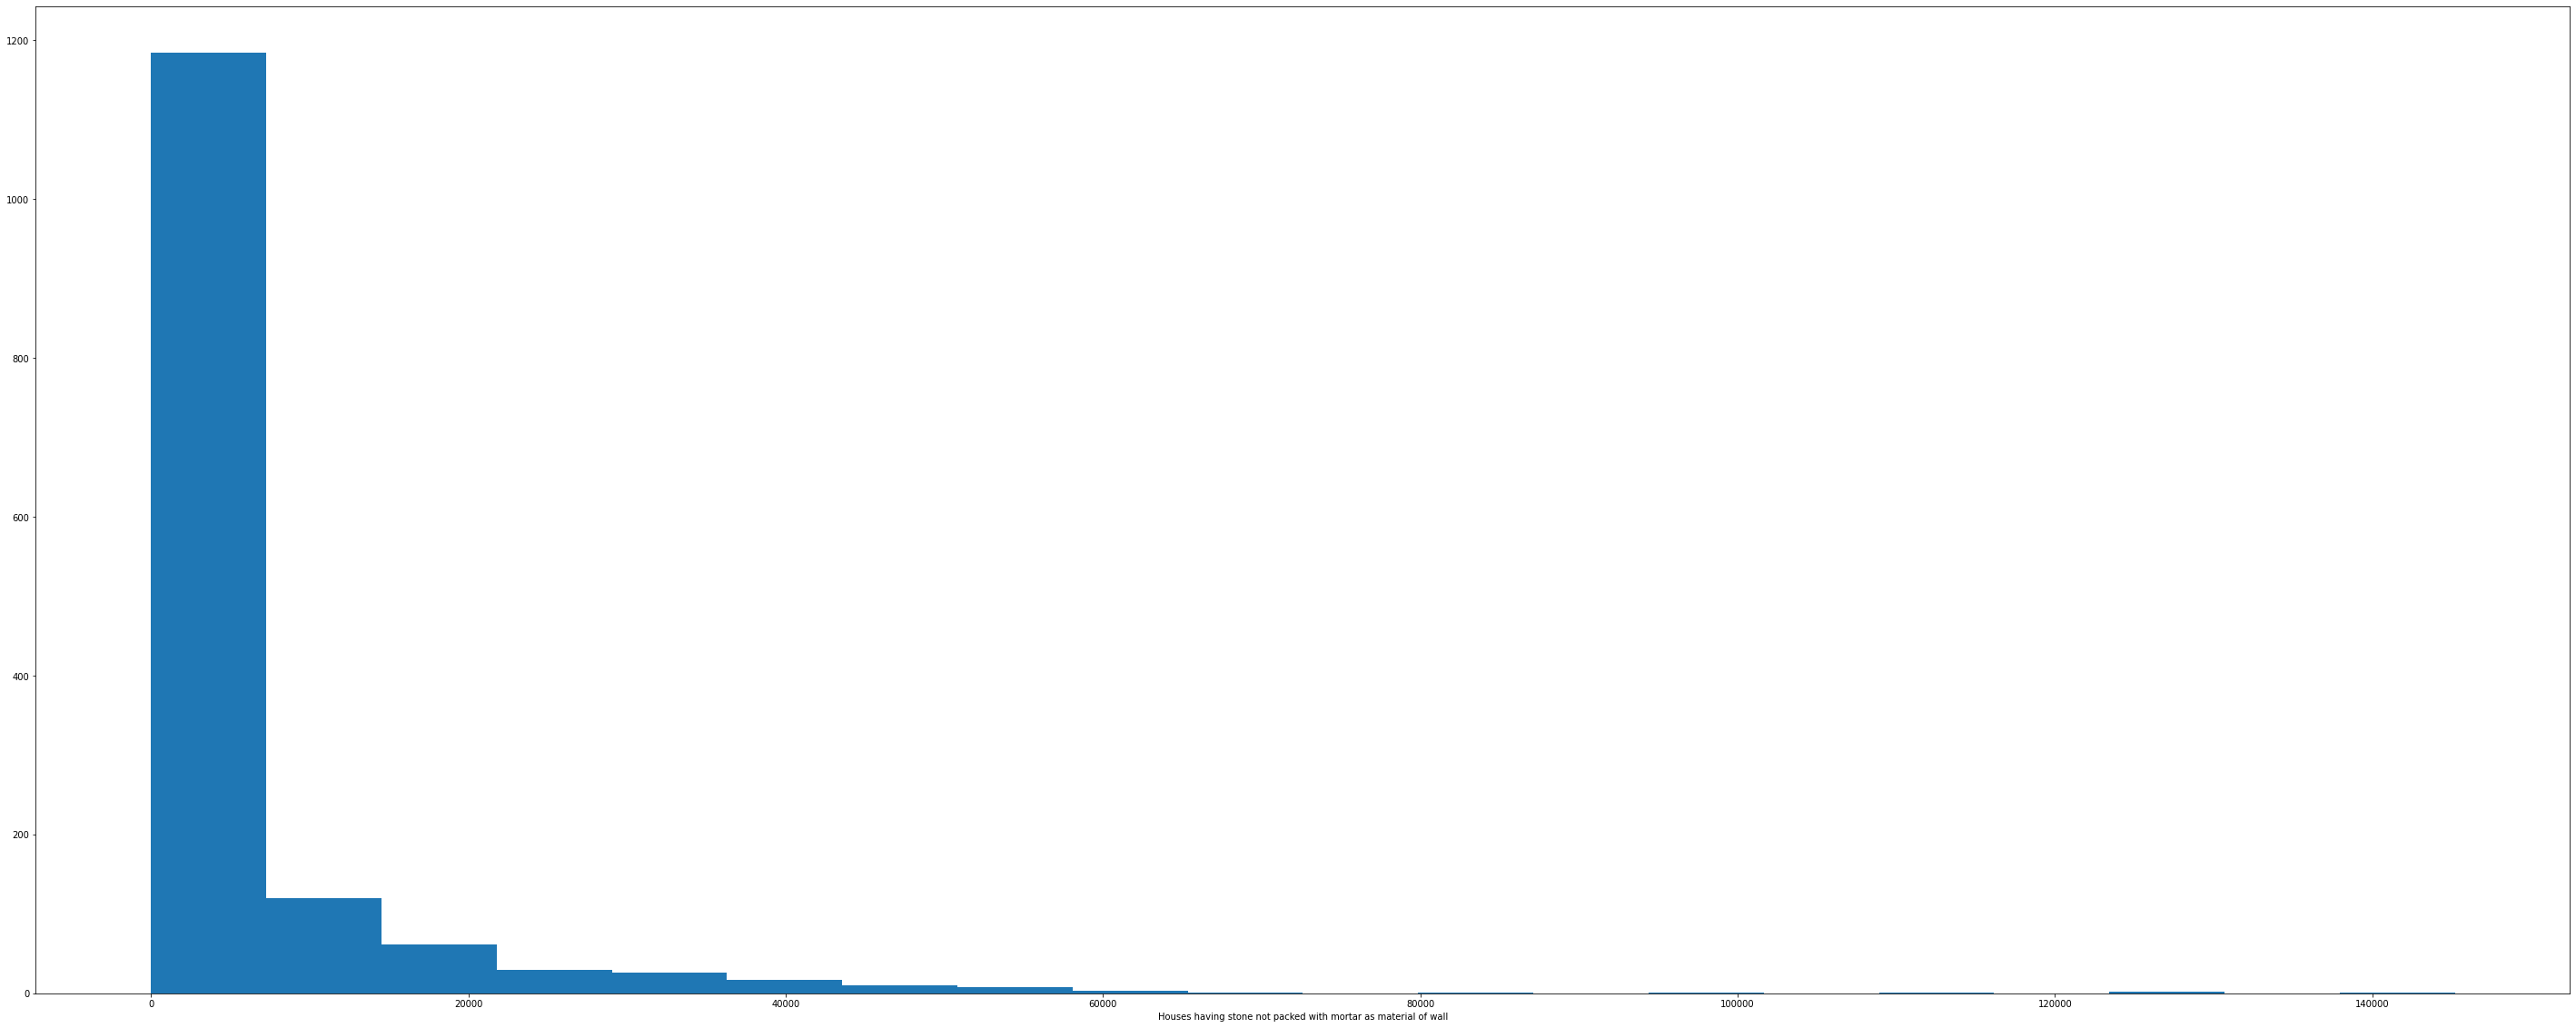

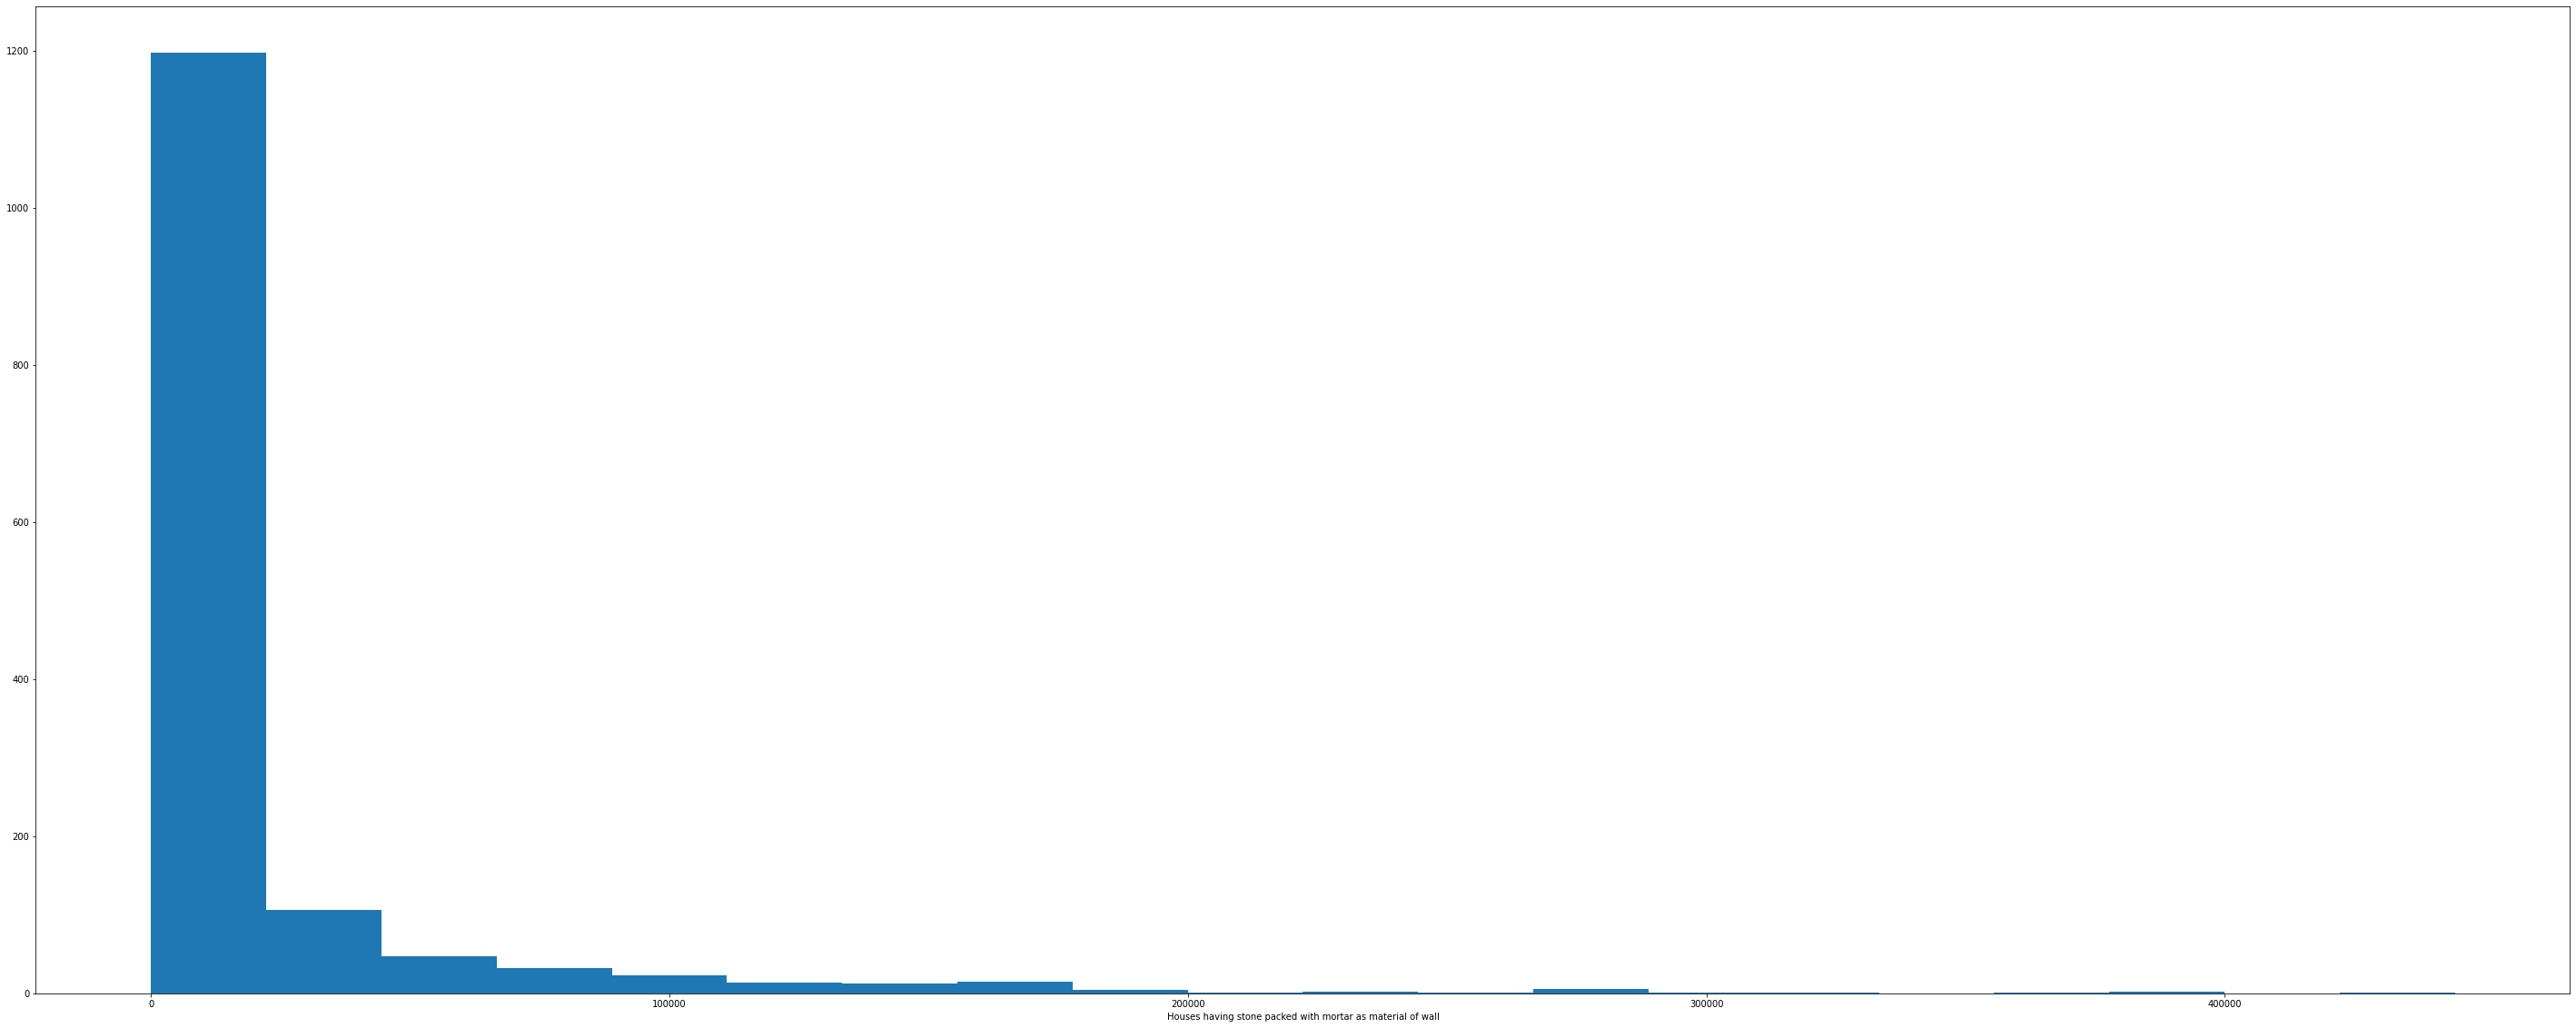

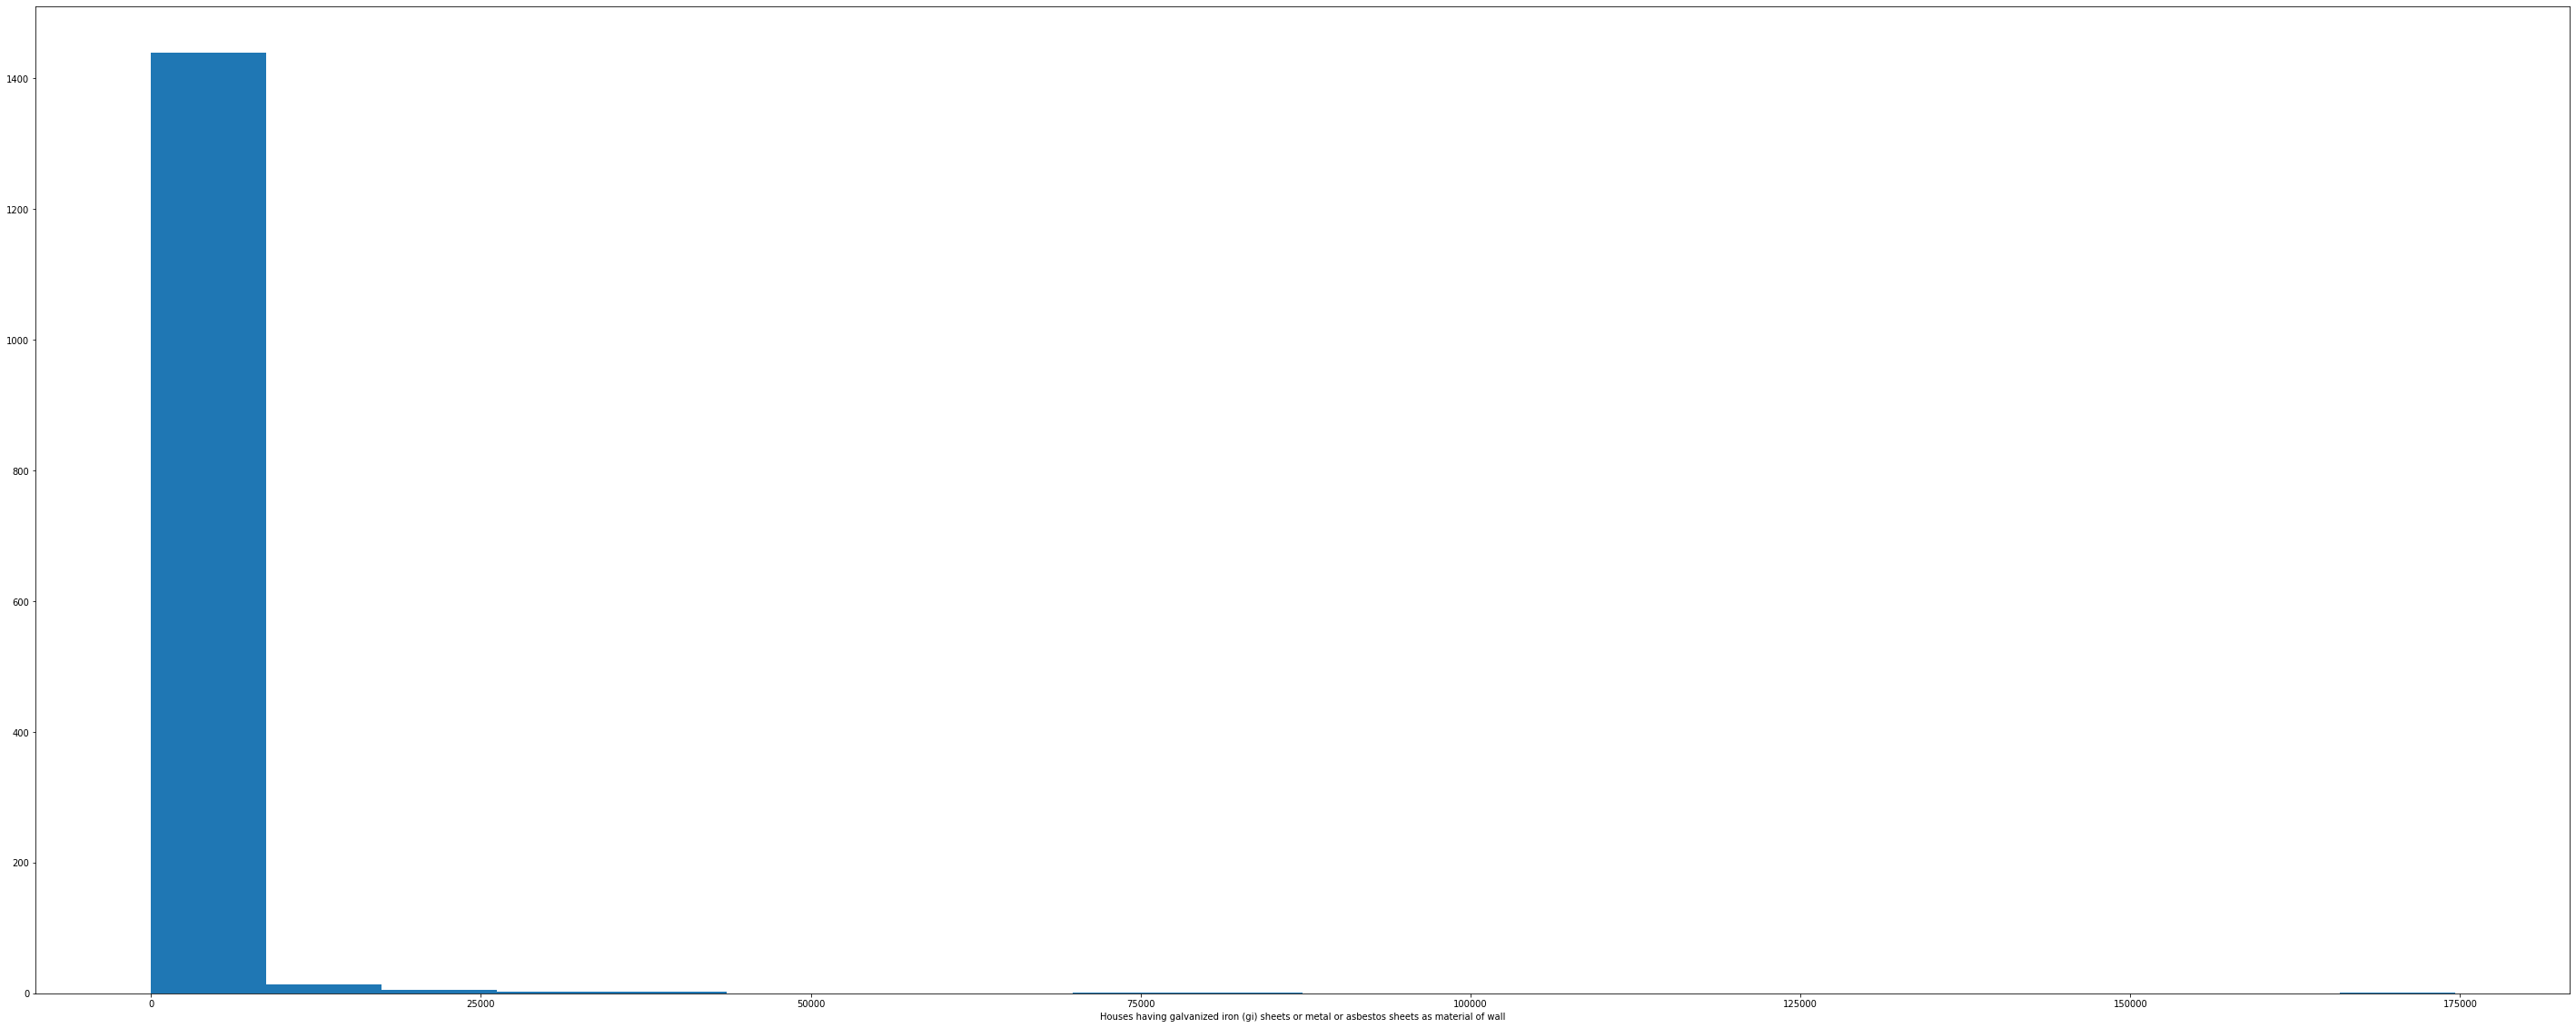

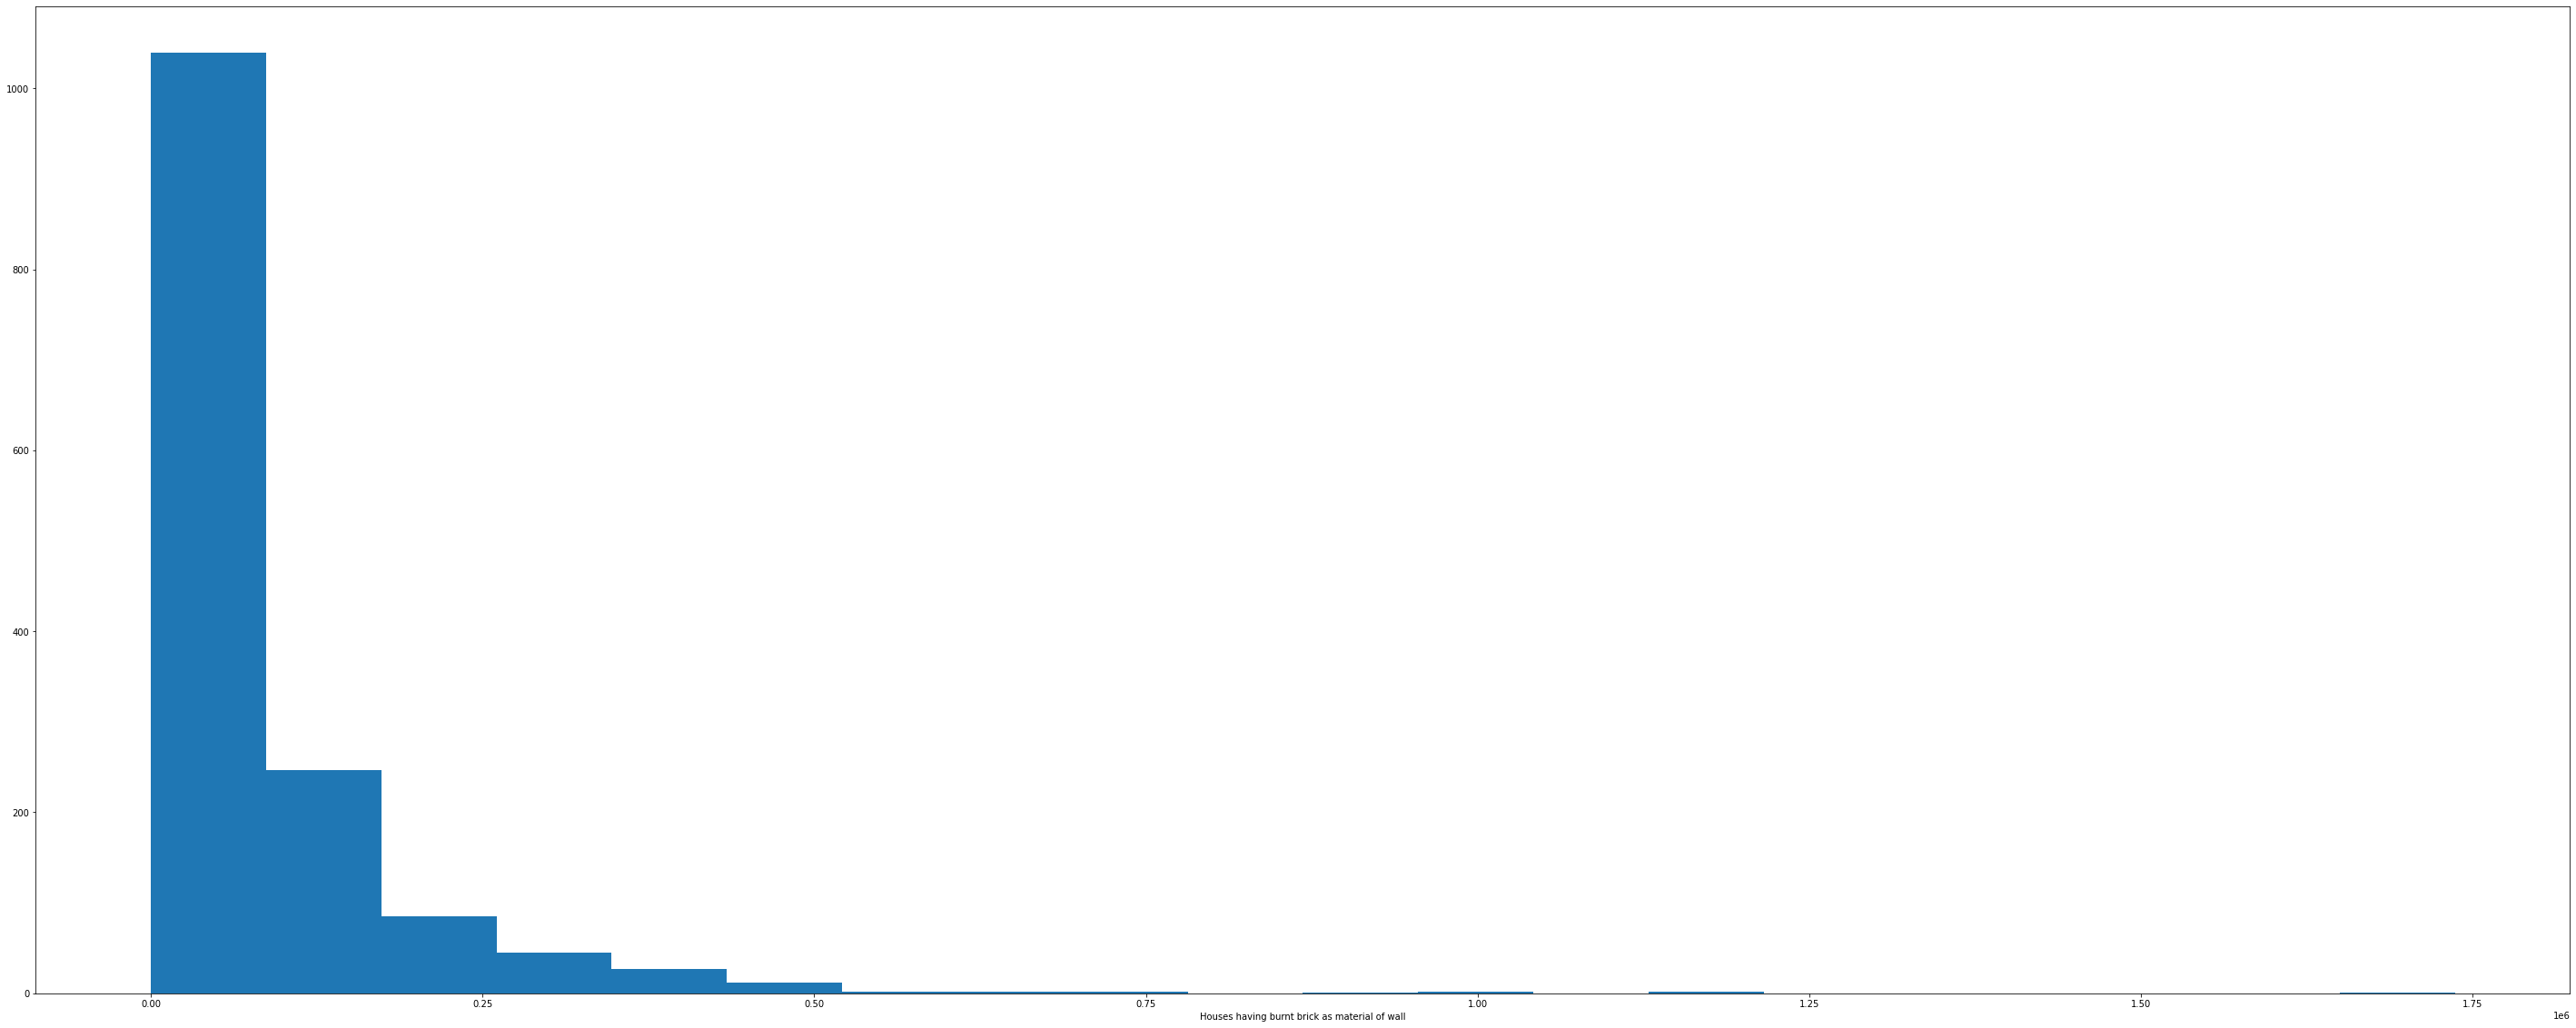

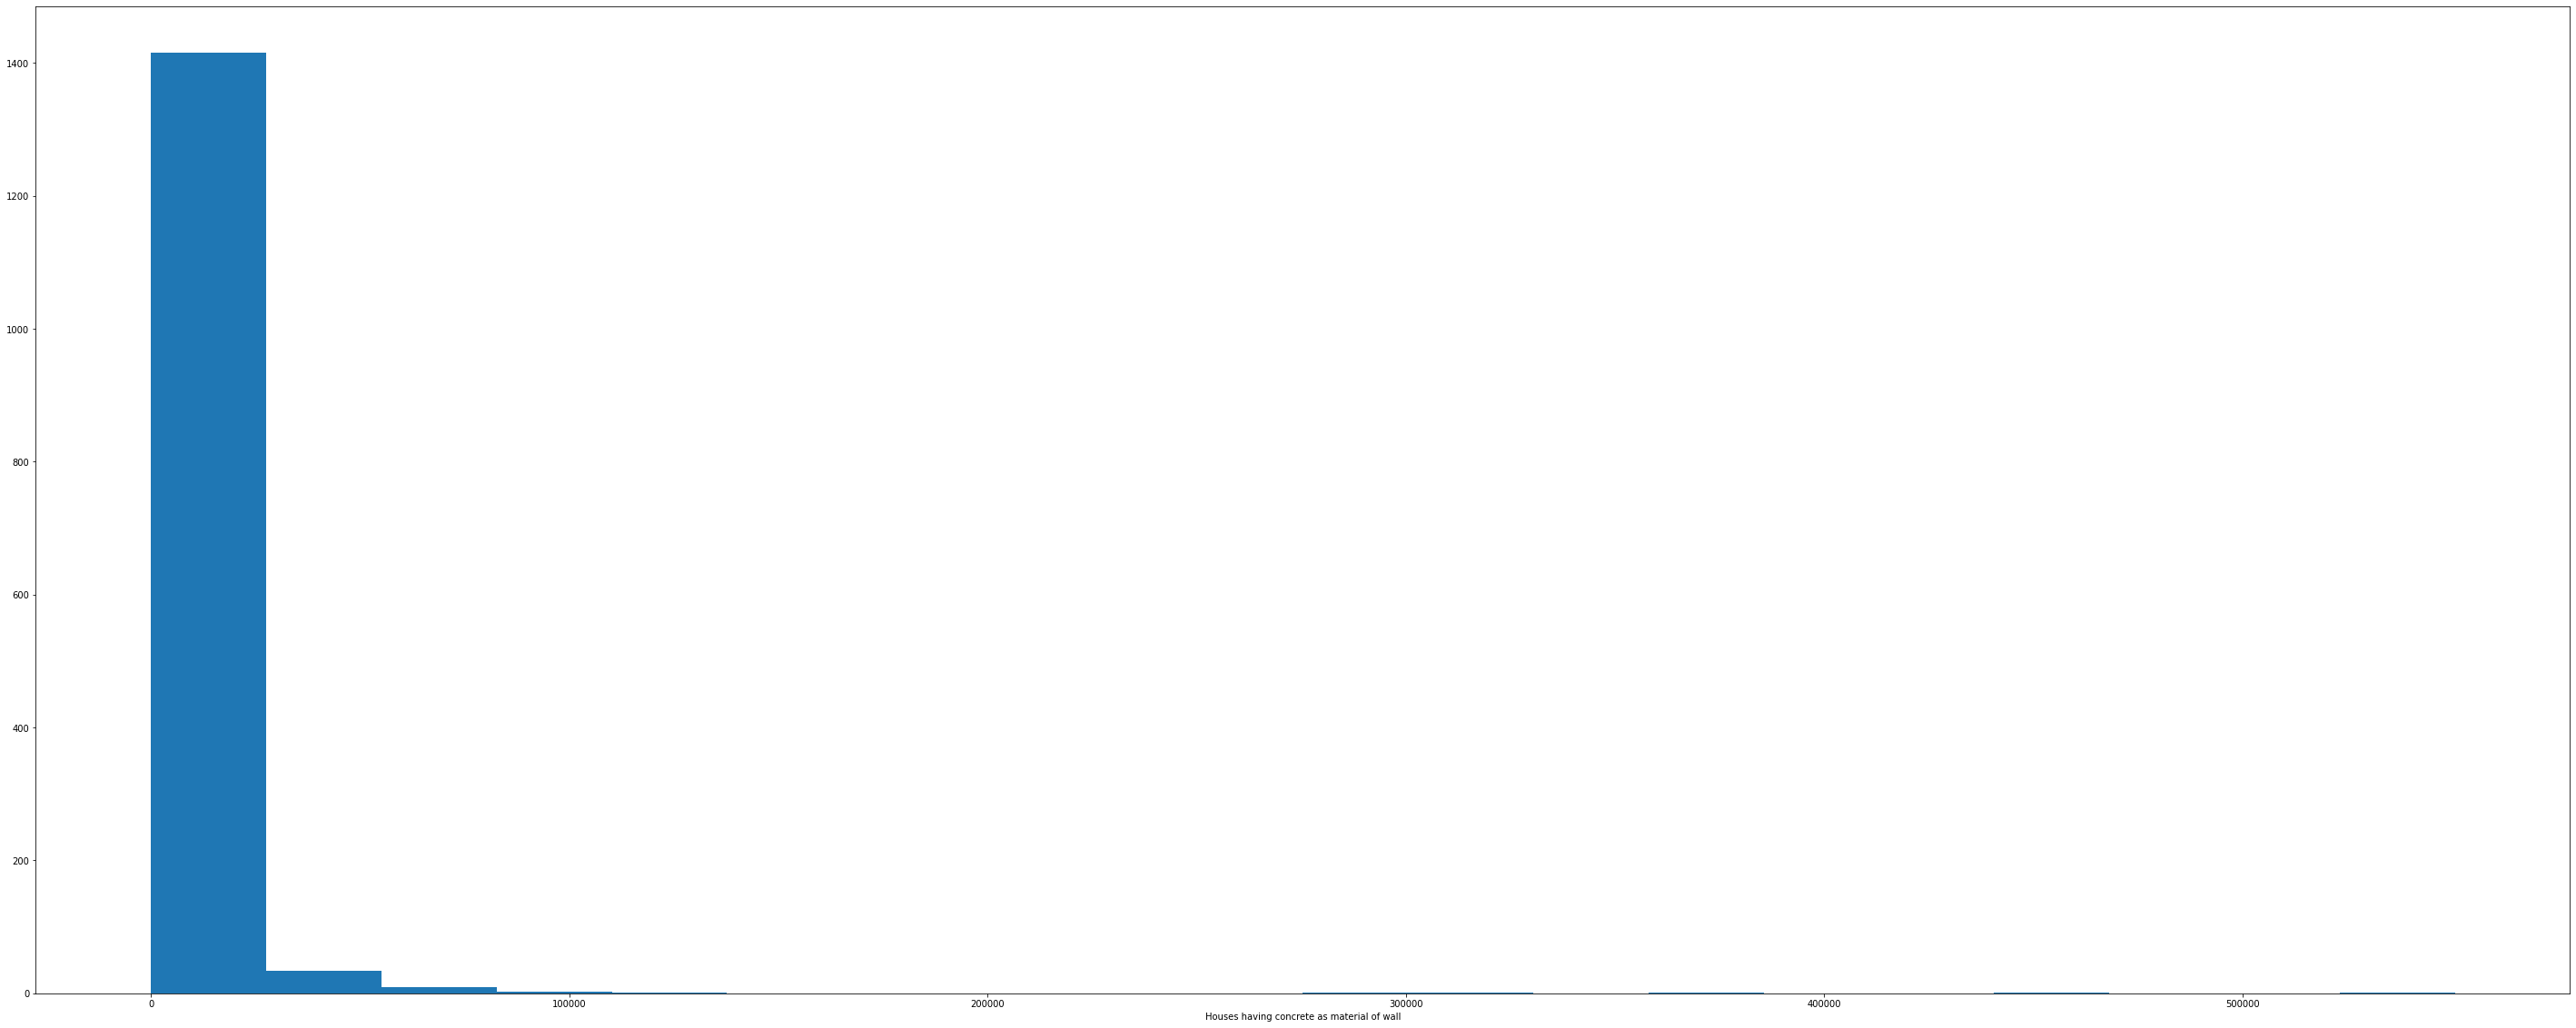

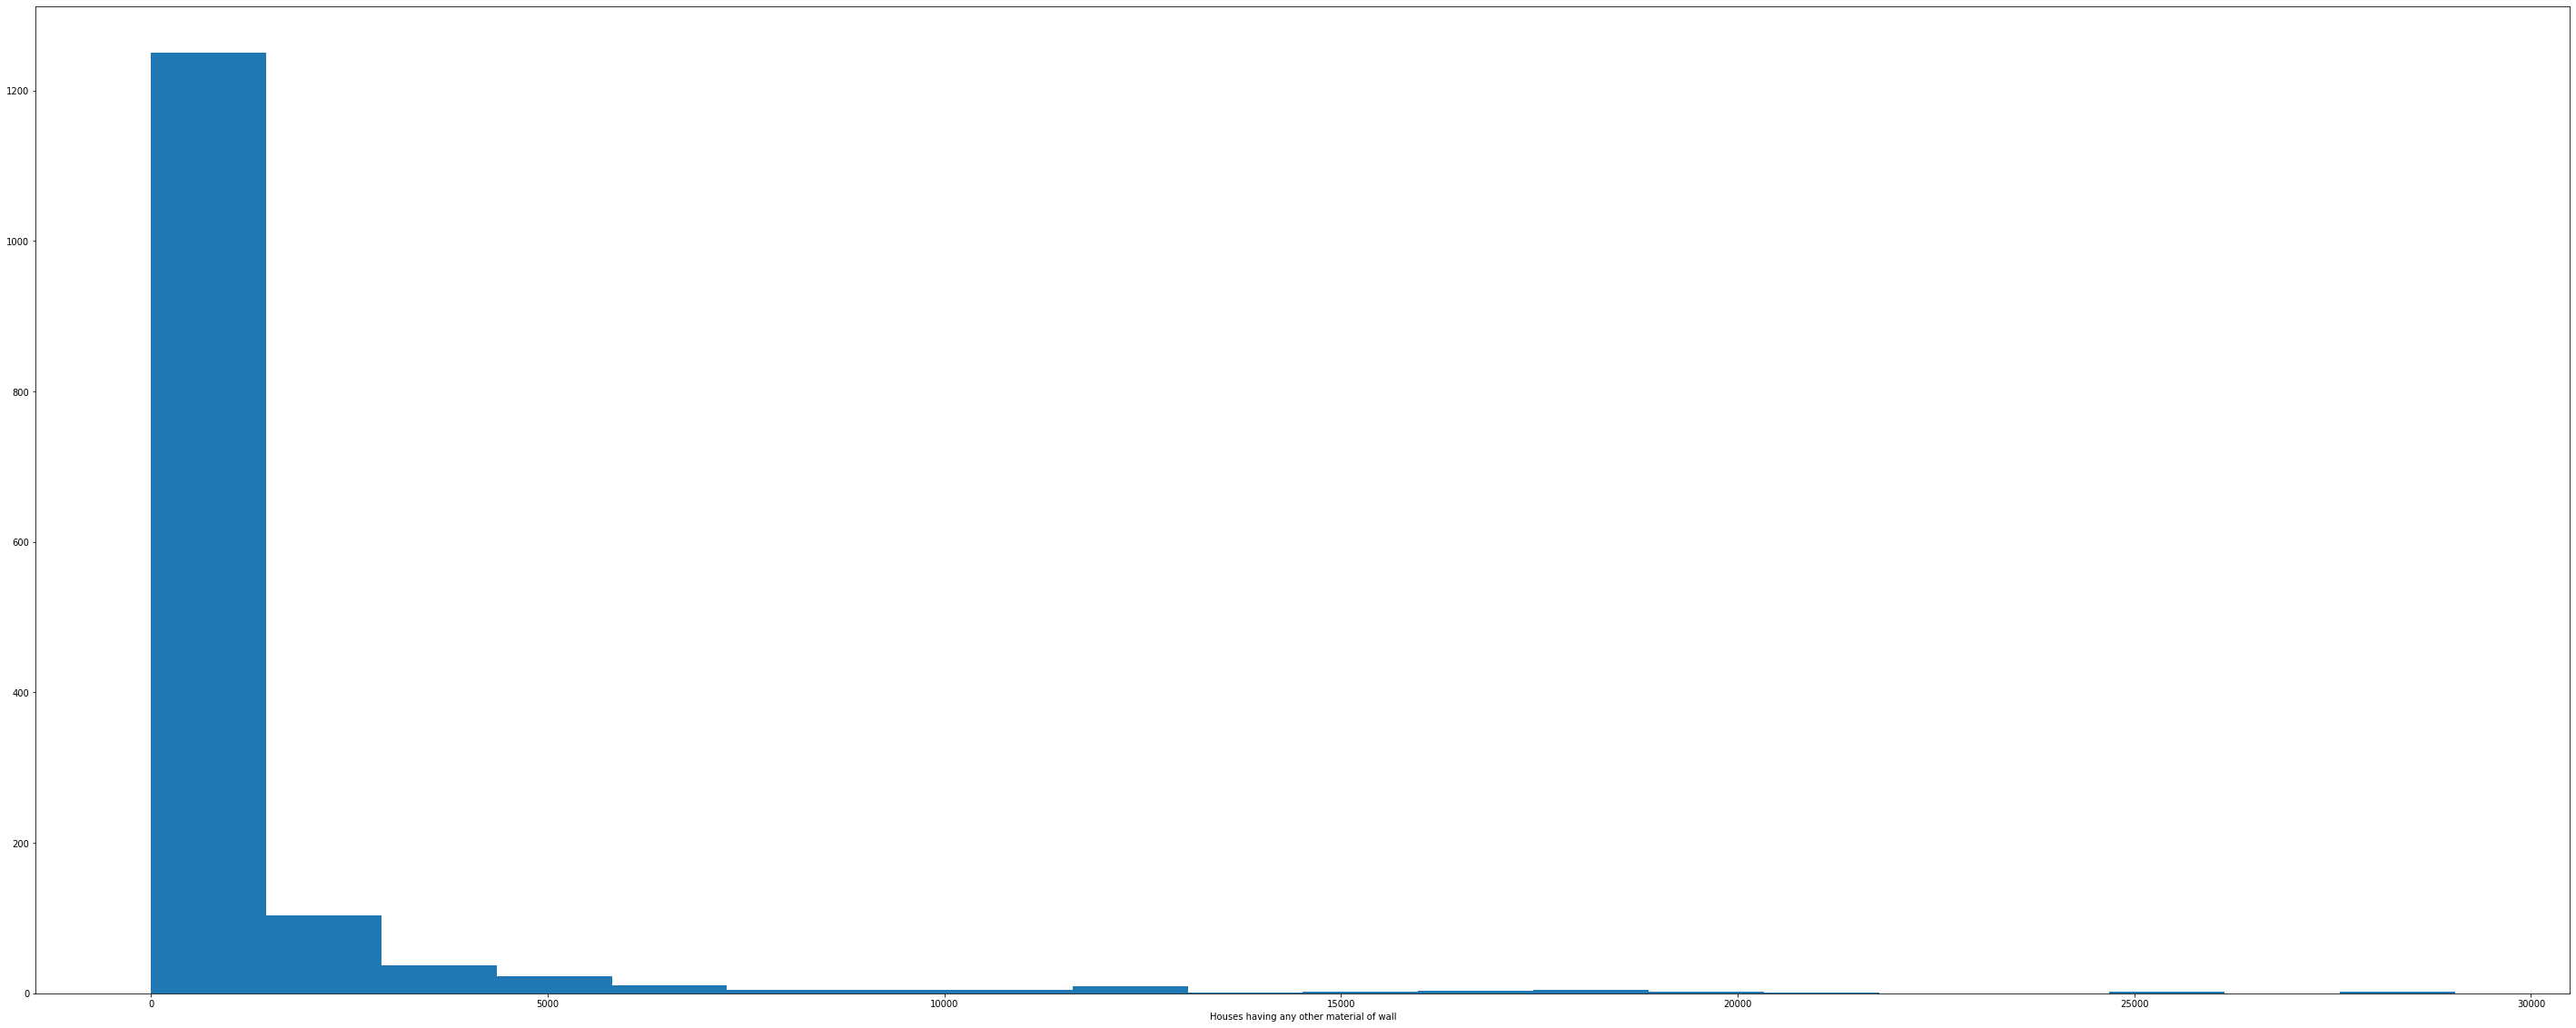

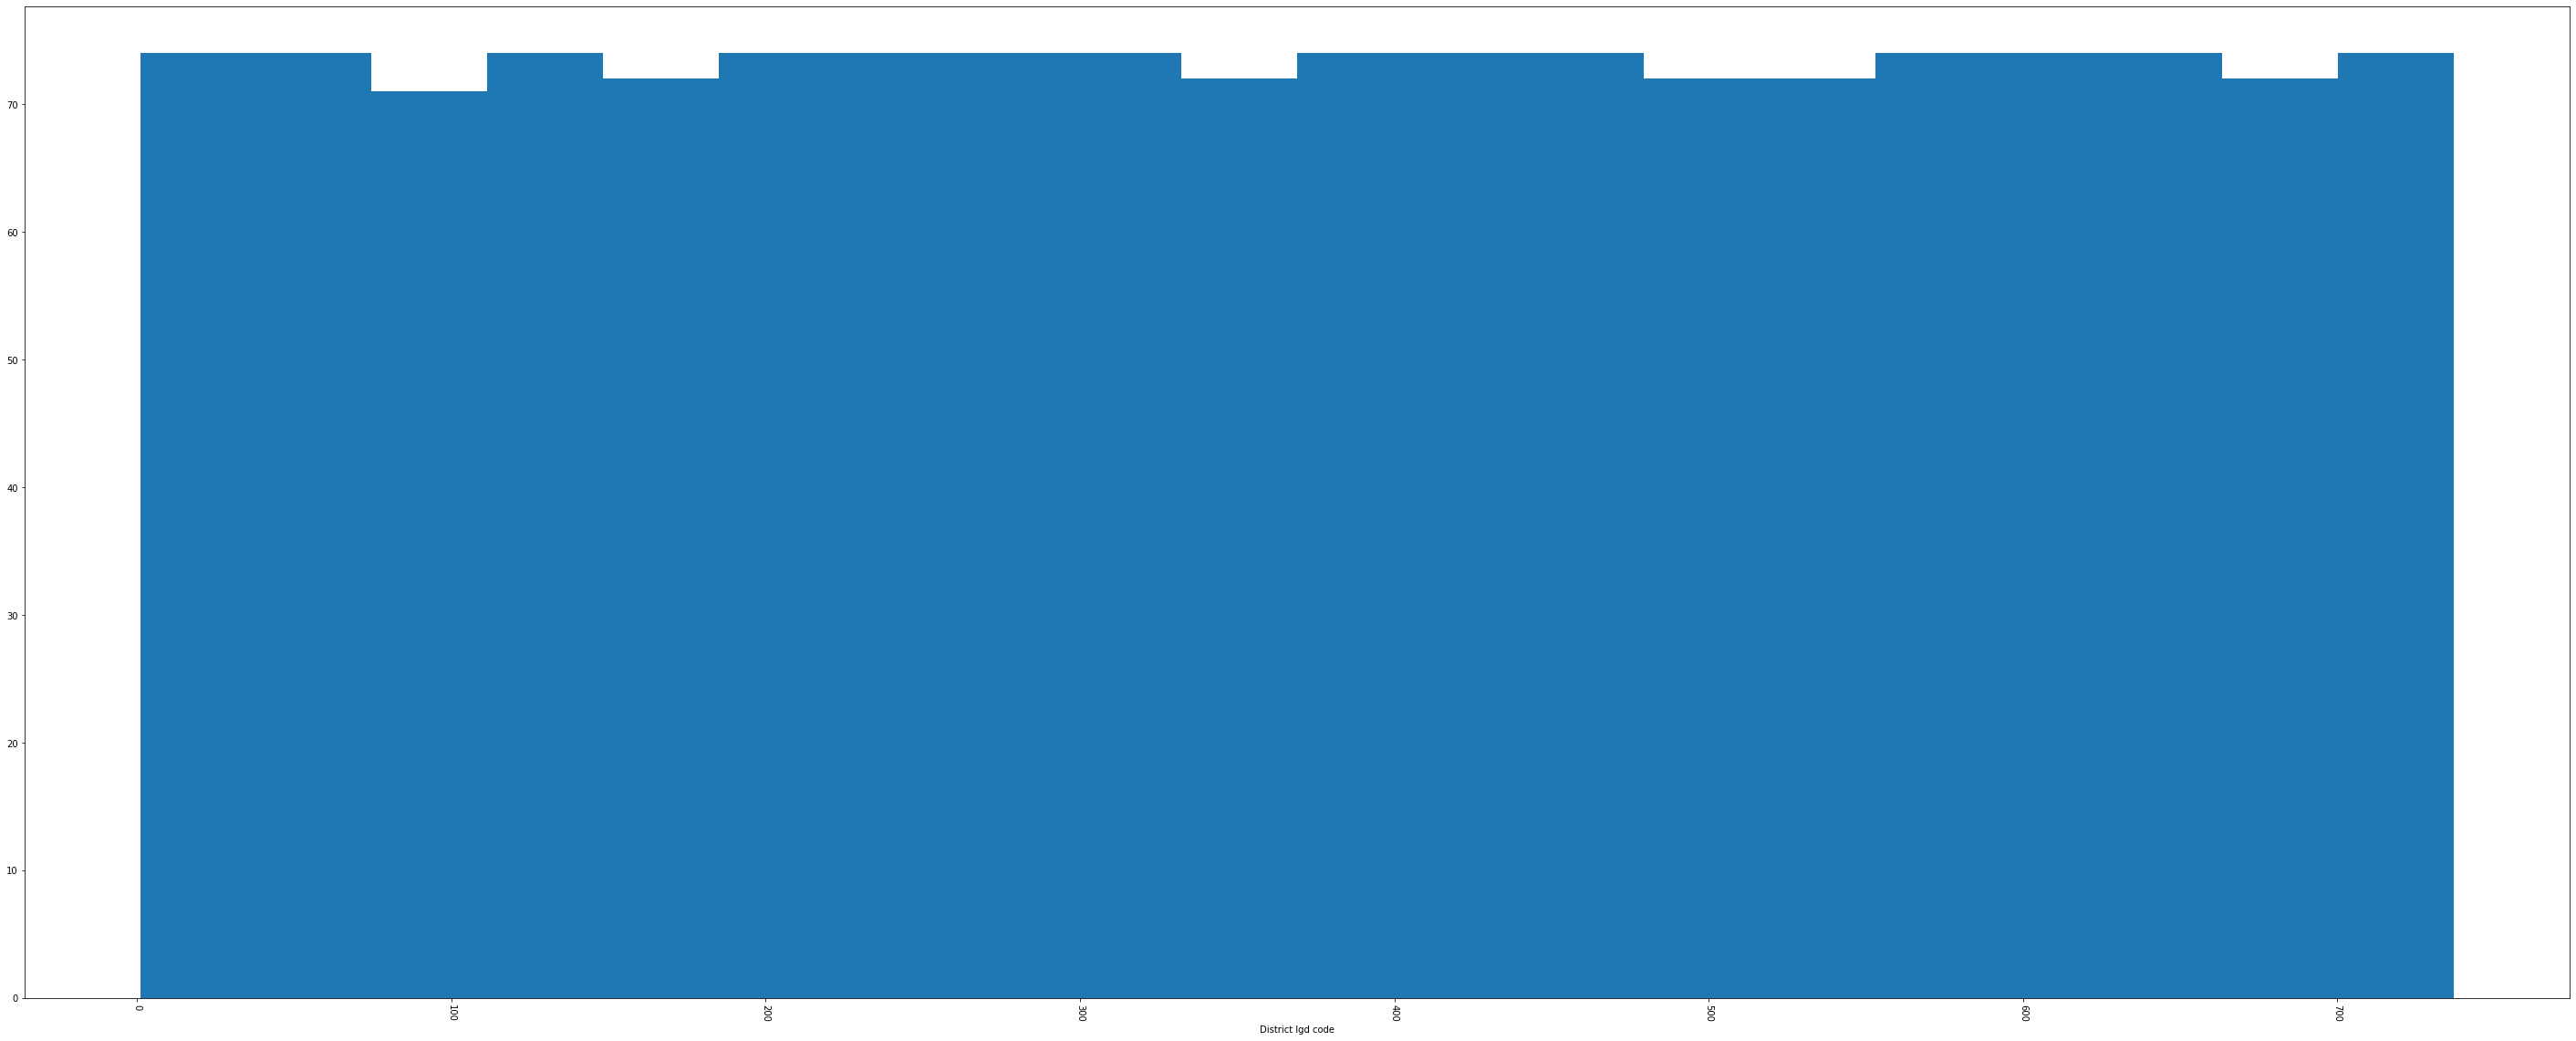

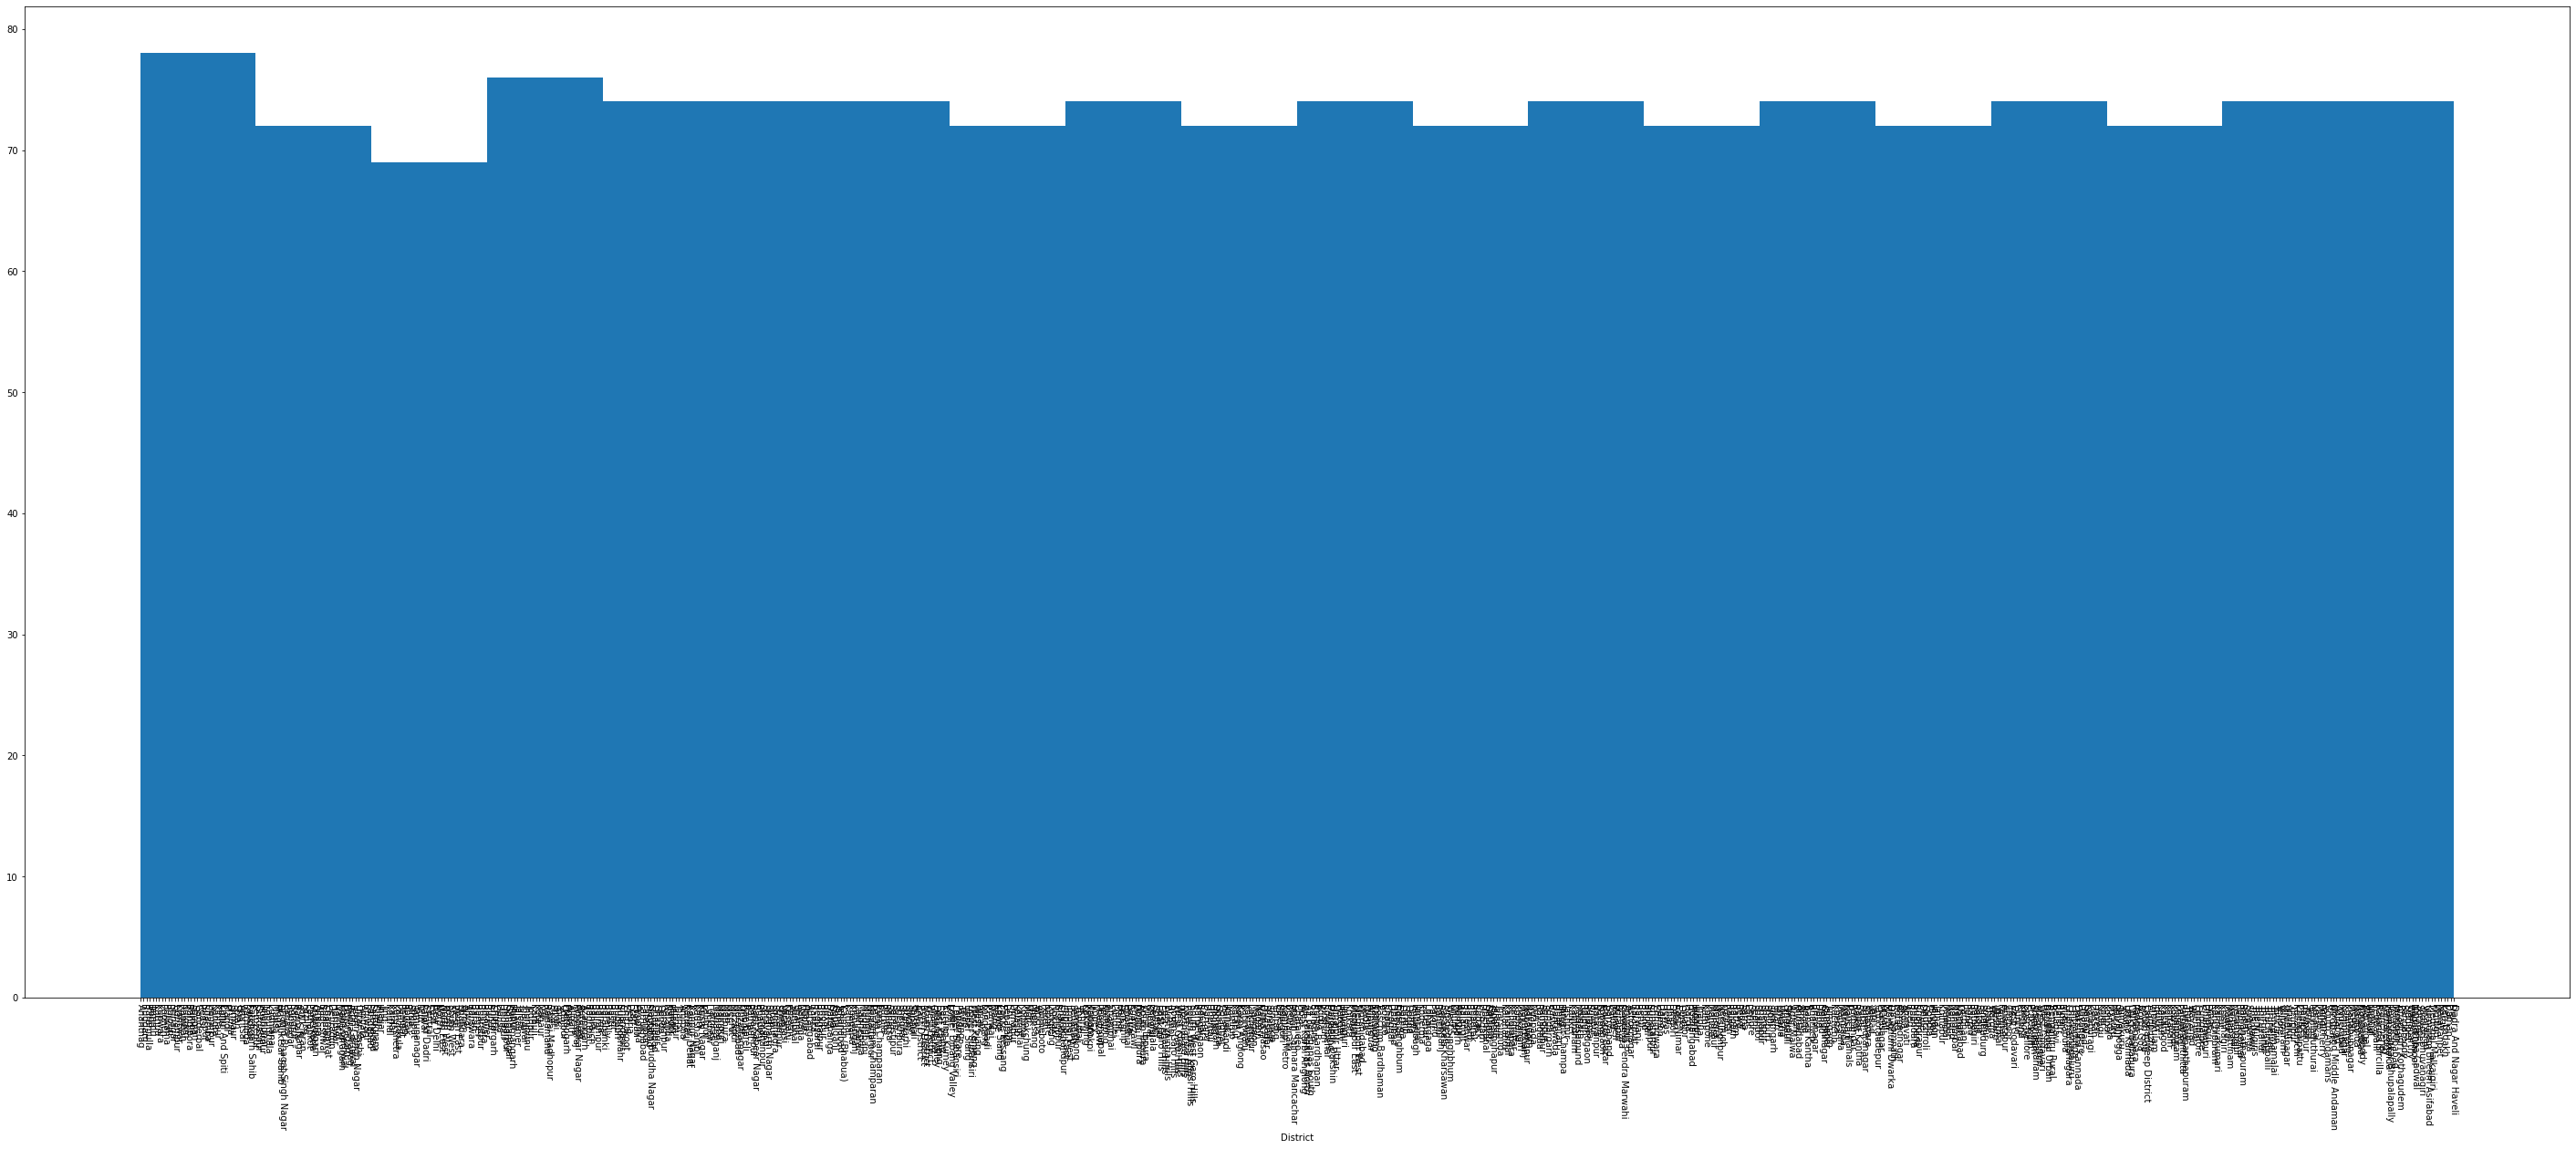

In [ ]:
for col in df.columns[8:]: #iterate over columns 
  fig=pyplot.figure()
  fig.set_figwidth(50) #resize the plot
  fig.set_figheight(20)
  pyplot.hist(df[col],20) #plot the histogram
  pyplot.xlabel(col) #label the figure
  pyplot.show() #show the figure
for col in df.columns[4:6]: #iterate over columns having district details
  fig=pyplot.figure()
  fig.set_figwidth(50) #resize the plot
  fig.set_figheight(20)
  pyplot.hist(df[col],20) #plot the histogram
  pyplot.xlabel(col) #label the figure
  pyplot.xticks(rotation=270)
  pyplot.show() #show the figure

Number of houses in each the fields is concentrated in the lower range bin only. The bins approximate a decreasing exponential distribution.
Although district codes can be taken as continuous variable , its plot doesn't give us any useful information as almost all districts appear twice only.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


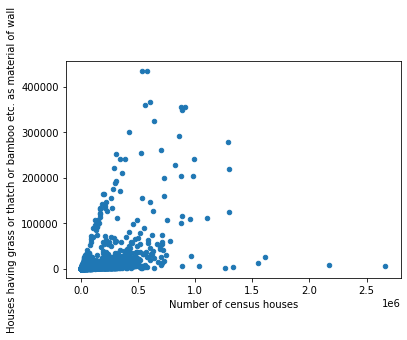

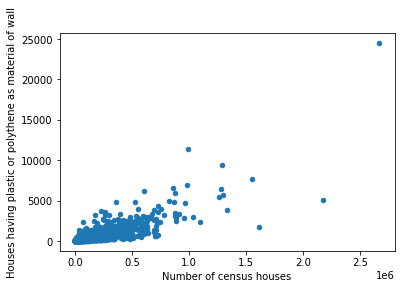

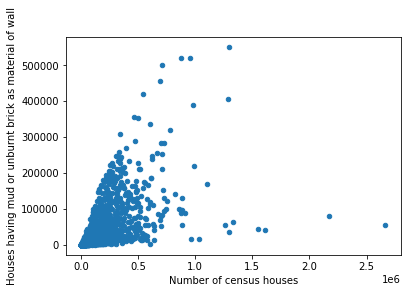

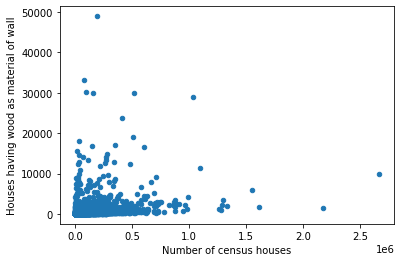

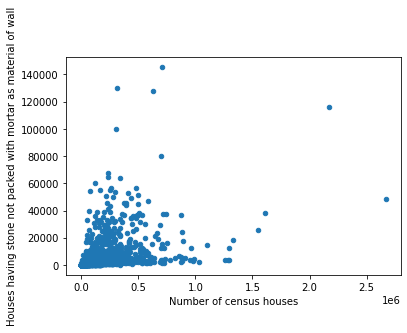

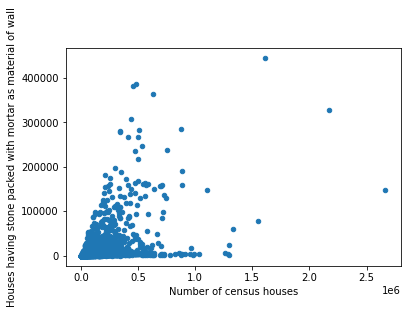

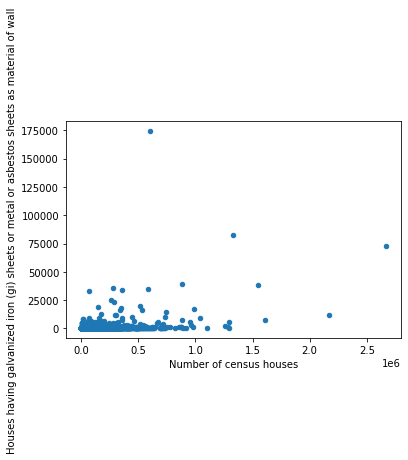

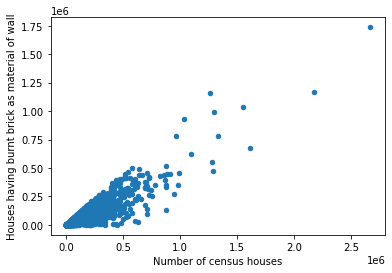

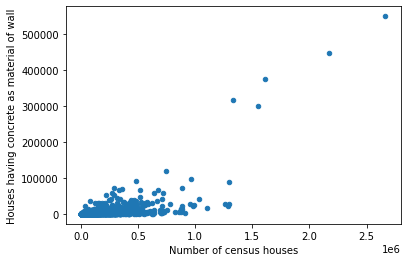

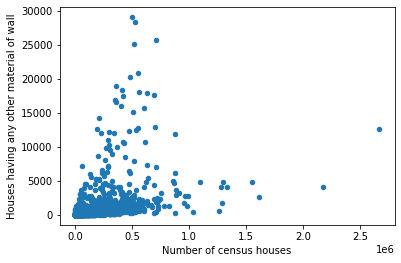

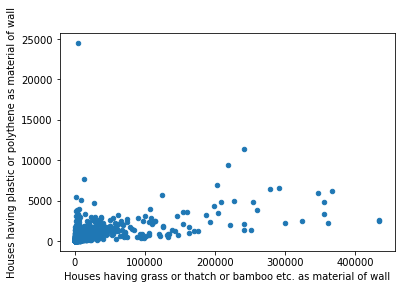

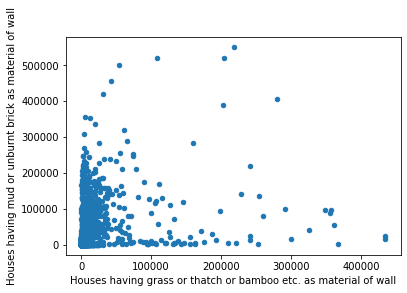

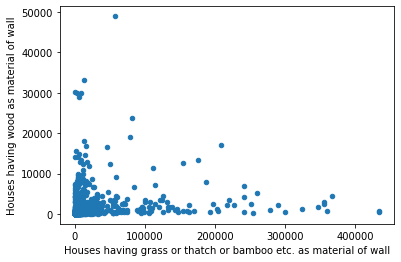

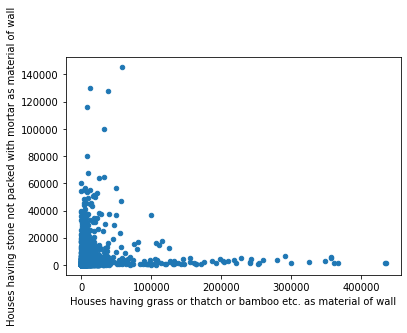

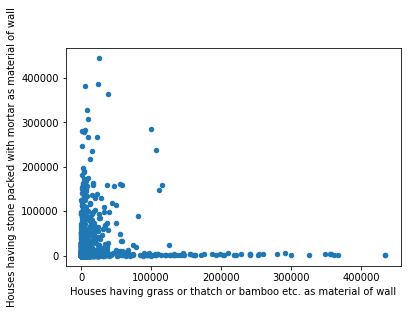

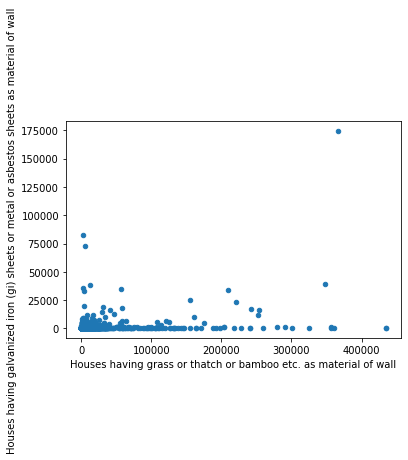

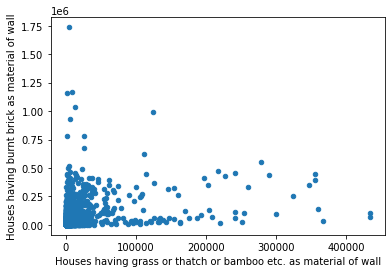

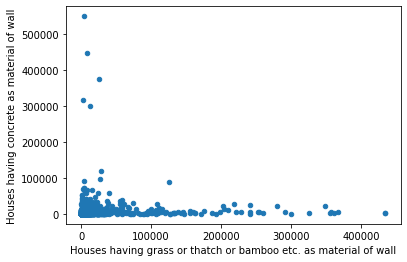

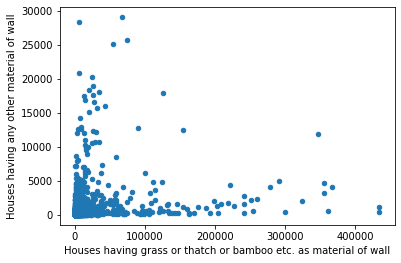

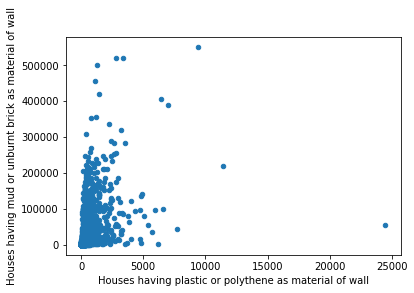

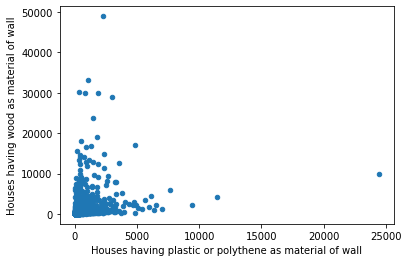

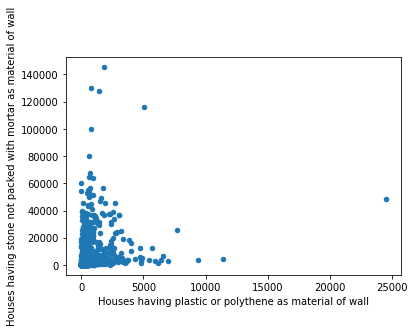

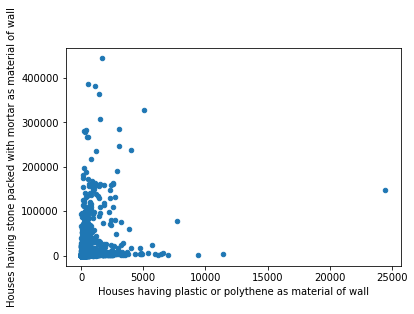

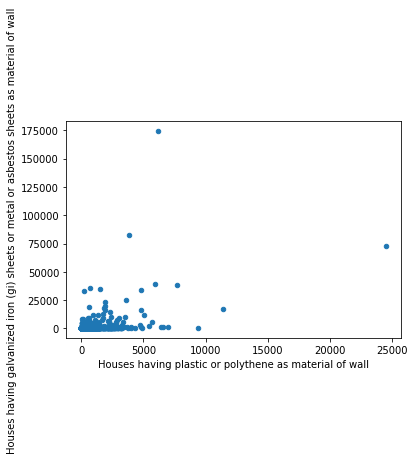

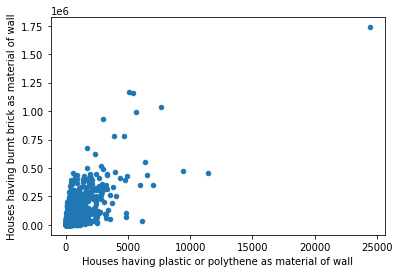

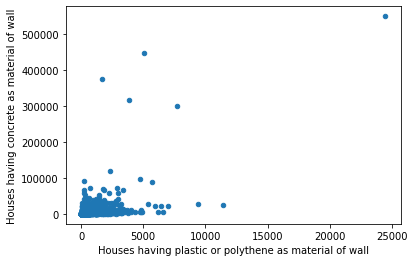

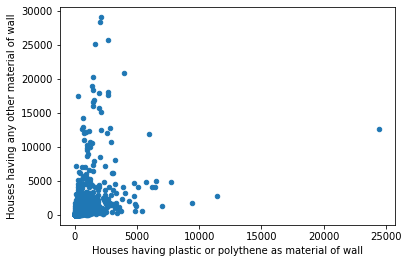

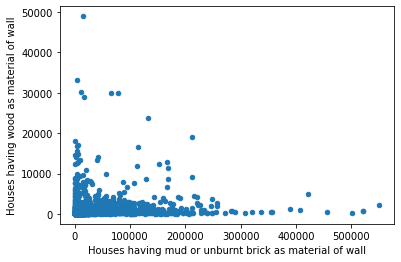

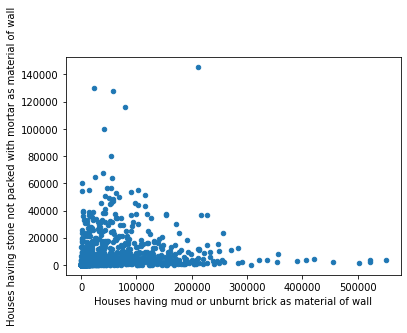

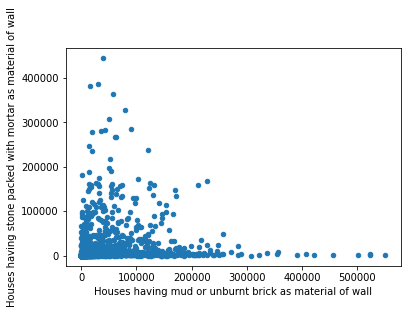

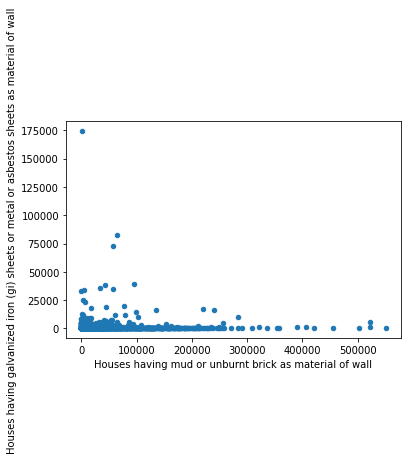

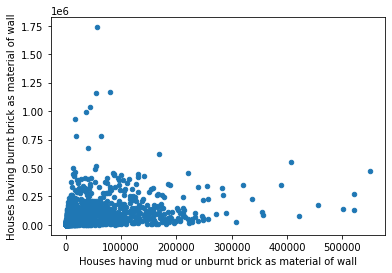

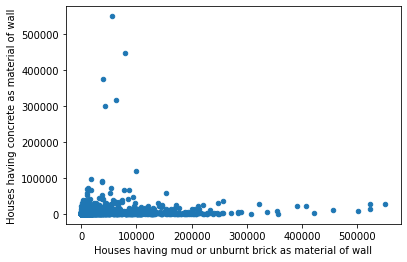

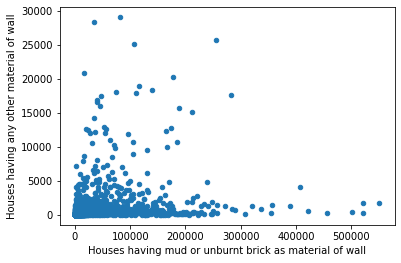

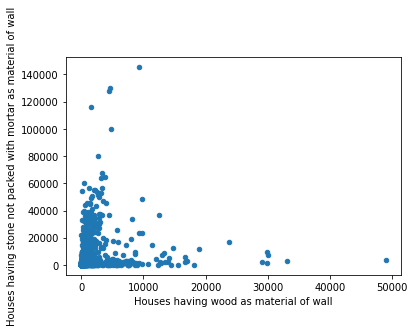

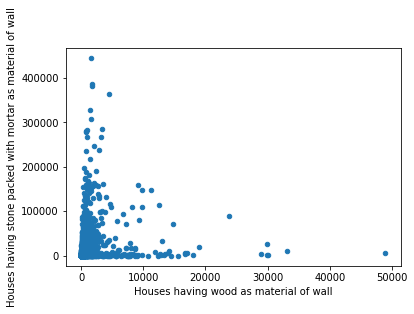

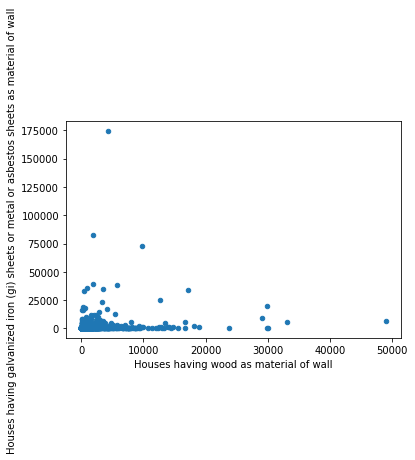

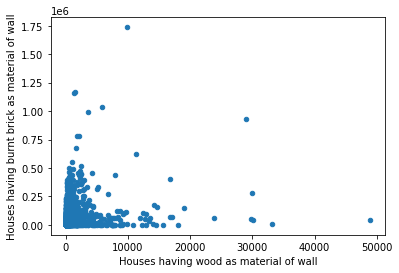

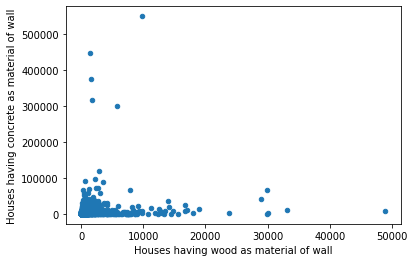

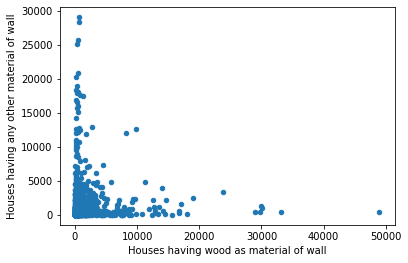

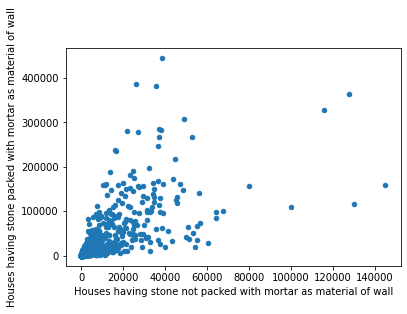

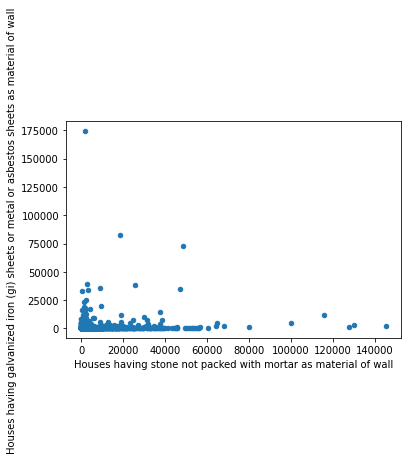

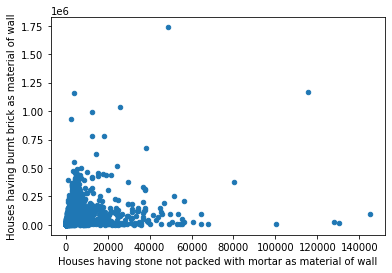

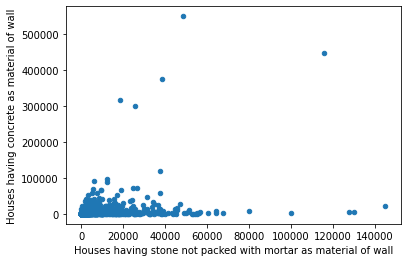

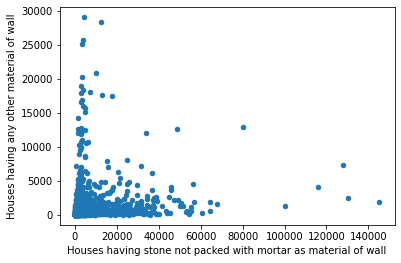

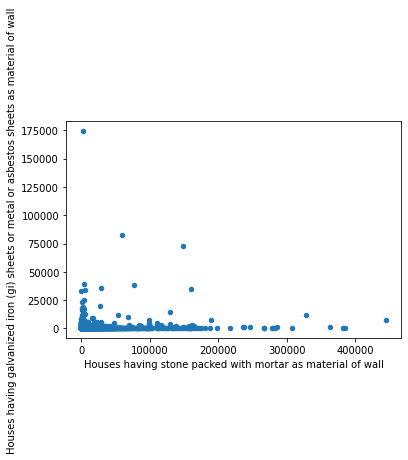

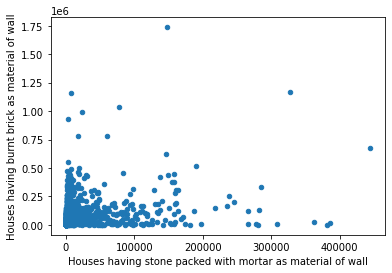

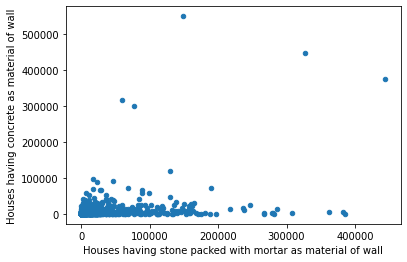

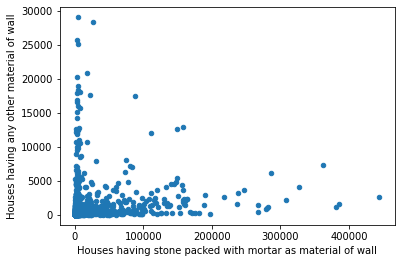

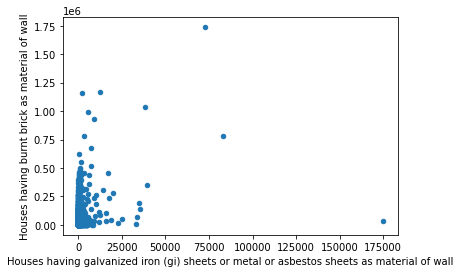

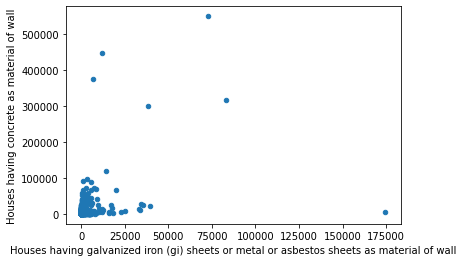

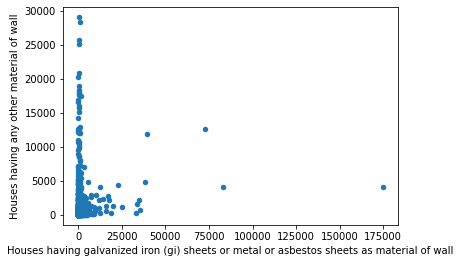

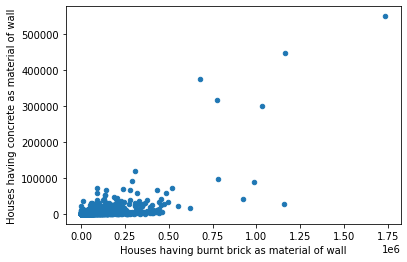

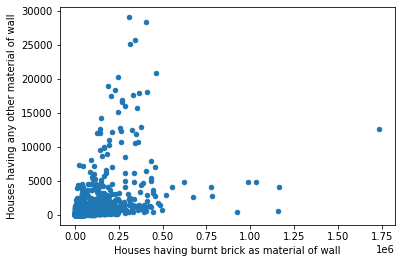

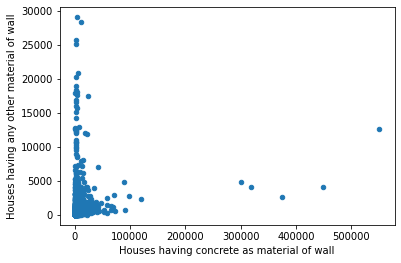

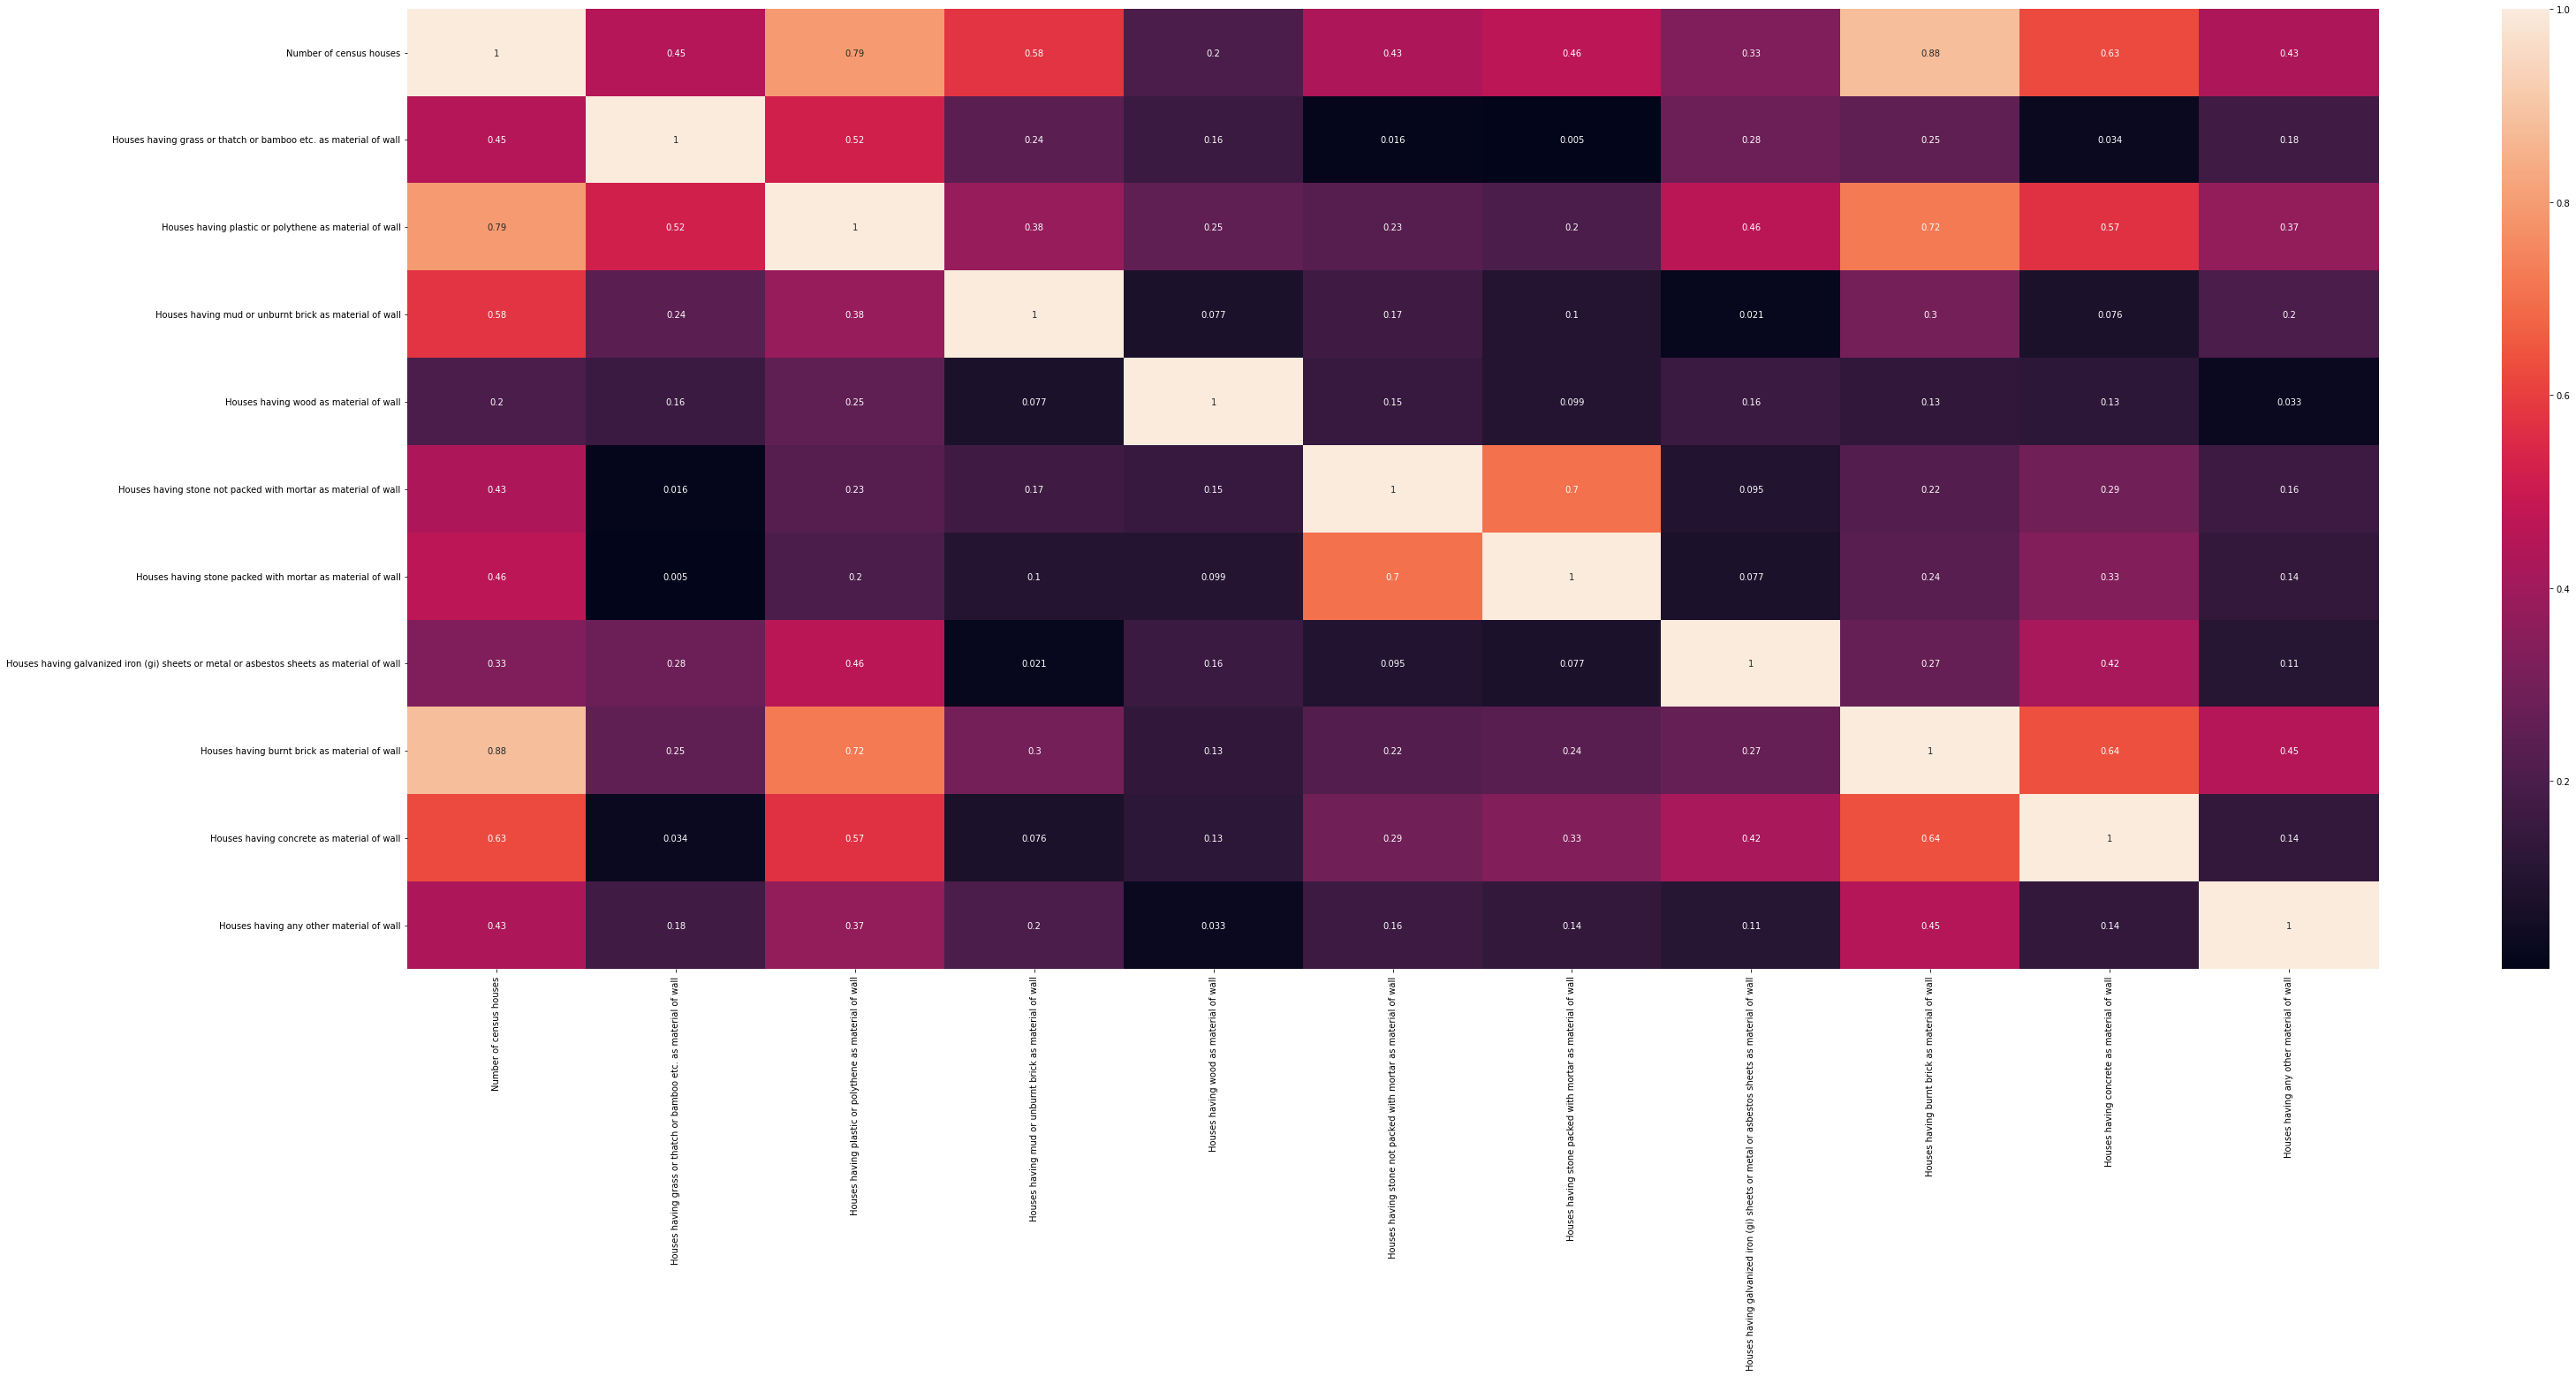

In [ ]:
col_name=df.columns.values
indices=[8,9,10,11,12,13,14,15,16,17,18] #list of column indices we want to iterate over
temp_df=pd.DataFrame() # take a temporary data frame that will have only the continuous variables
for i in range(len(indices)): #nested loop to consider pairs of columns without any duplicacy
  temp_df[col_name[indices[i]]]=df[col_name[indices[i]]] # add column to the temporary df
  for j in range(i+1,len(indices)):
    df.plot.scatter(indices[i],indices[j]) # scatter plot the columns with indices given are elements of the list indices
fig=pyplot.figure()
fig.set_figwidth(50) #resize the plot
fig.set_figheight(20)
heatmap=sb.heatmap(temp_df.corr(),annot=True) #plotting the colour coded correlation matrix


Outliers are less in most of the plots. Points are concentrated mostly around the bottom left corner only. Some of the fields are strongly correlated

In [ ]:
temp=df[df.columns[9]].copy(deep=True) #create a temporary column of the dataframe , we wanr it to be a deep copy so adding to it wont change the column it derives from
for i in df.columns[10:]: #iterate over columns K to S
  temp+=(df[i]) #add the column to the sum
counter=0 #counter for number of unequal values
for row in range(temp.shape[0]): #iterate over all rows
  if temp.iloc()[row]!=df['Number of census houses'].iloc()[row]: #compare the values in the two dataframes row wise
    counter+=1 #increment in the counter
    #print(temp.iloc()[row],df['Number of census houses'].iloc()[row])

print(counter,'number of rows have mismatch')
print('Max deviation is',(temp-df[df.columns[8]]).abs().max())

451 number of rows have mismatch
Max deviation is 9


Most (all?) of the differences are due to fact that data was given as float and thier conversion to int is bound to give some errors. Data is quite consistent as the max deviation is just 9 which is not of much significance. Even in their float values as well the only difference is due to how float64 is stored. 

In [ ]:
for col in df.columns[9:]: #iterate over the required columns
  df[col+'_pc']=df[col]/df[df.columns[8]]*100 #add the new column named in the format 'old column name + pc' , to this column put the value of df[col] divided by column I multiplied by 100
display(df) #display the changed df

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

      Number of census houses  \
0                      109465   
1                       33522   
2                       85561   
3                       13136   
4                      120312   
...                       ...   
1468                    42352   
1469                     5410   
1470                     5279   
1471                    35408   
1472                    37655   

      Houses having grass or thatch or bamboo etc. as material of wall  ...  \
0                                                   270                 ...   
1                                                    69                 ...   
2                                                   134                 ...   
3                                                    49                 ...   
4                                                   410                 ...   
...                                                 ...                 ...   
1468                                                202                 ...   
1469                                                  6                 ...   
1470                                                 11                 ...   
1471                                              16428                 ...   
1472                                               2156                 ...   

      Houses having grass or thatch or bamboo etc. as material of wall_pc  \
0                                              0.246654                     
1                                              0.205835                     
2                                              0.156613                     
3                                              0.373021              

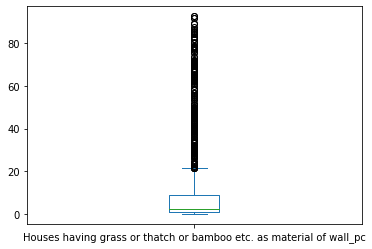

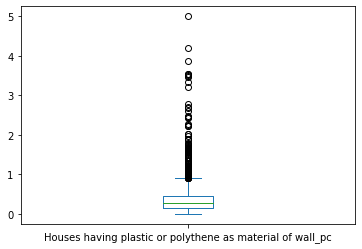

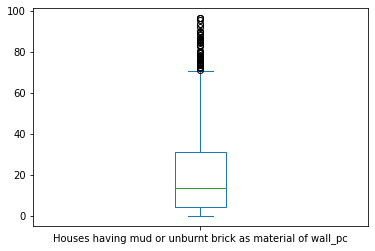

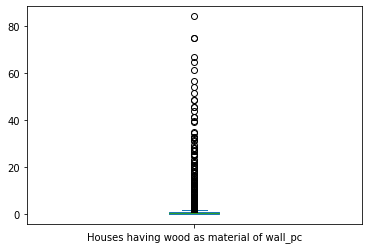

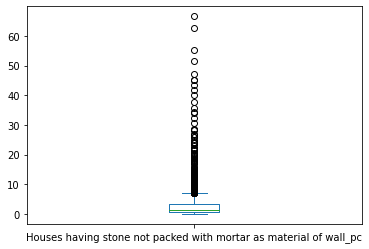

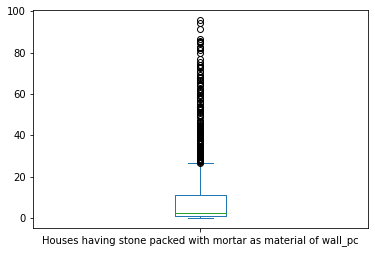

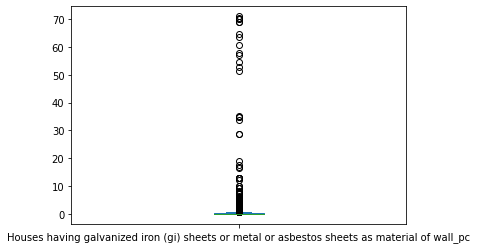

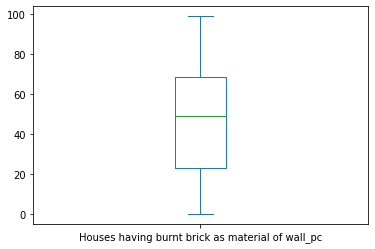

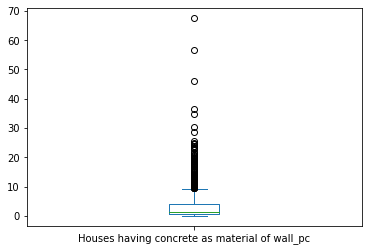

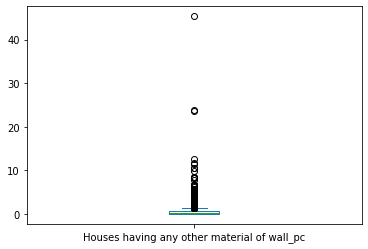

In [ ]:
for col in df.columns[19:]: #iterate over new columns
  df[col].plot.box() #draw box and whiskers plot
  pyplot.show() #show the plot

All but one field contain quite a few outliers 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


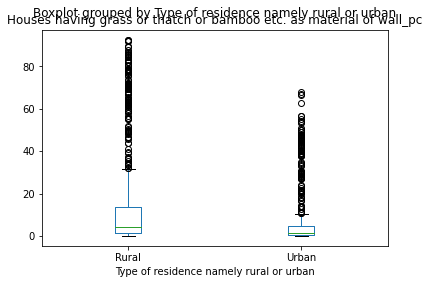

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


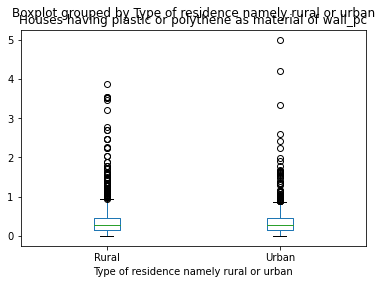

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


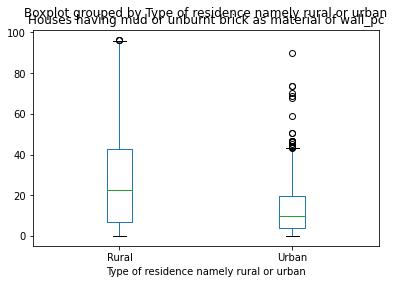

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


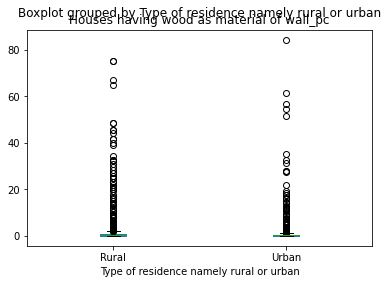

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


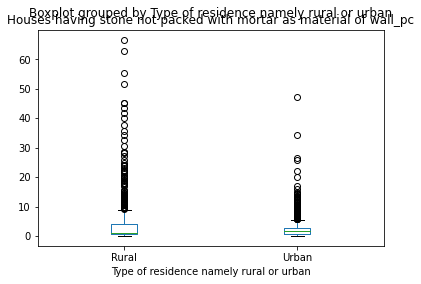

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


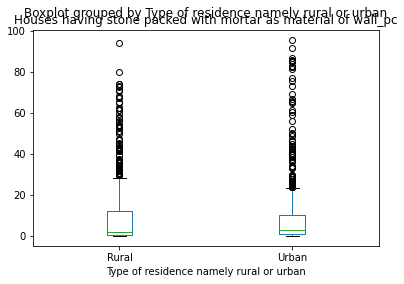

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


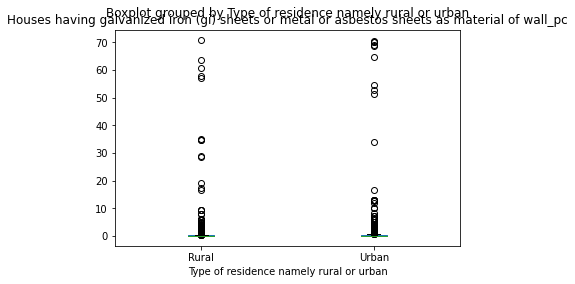

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


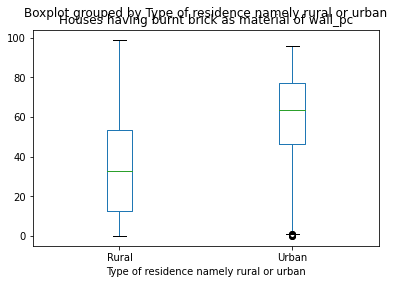

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


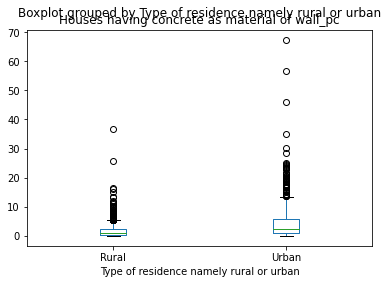

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


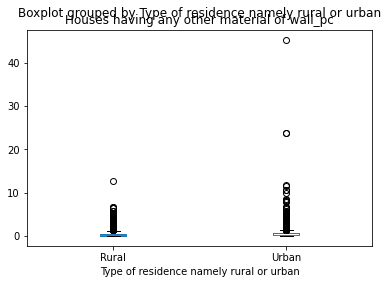

In [ ]:
for col in df.columns[19:]:  #iterate over the new columns
  df.boxplot(by='Type of residence namely rural or urban',column=col,grid=False) #plotting box and whiskers plot by grouping according to rural and urban
  pyplot.show() #show the plot

In almost all of the fields , quantiles and outliers are quite similar for both rural and urban case

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


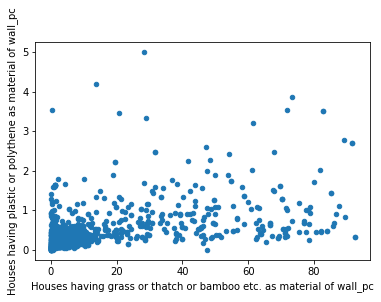

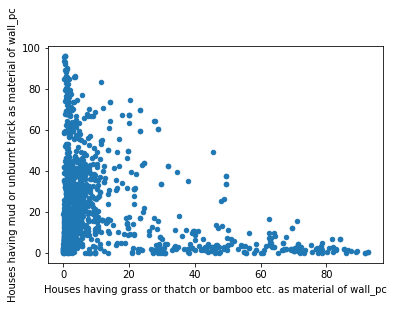

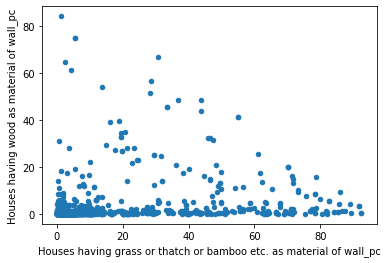

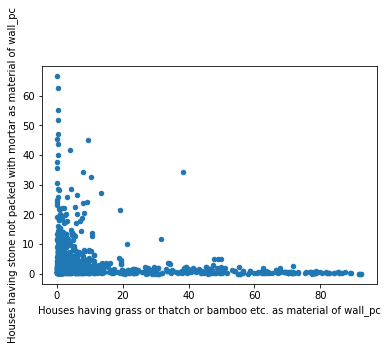

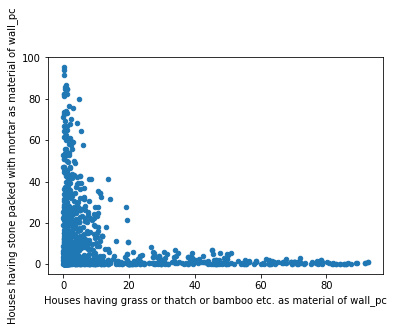

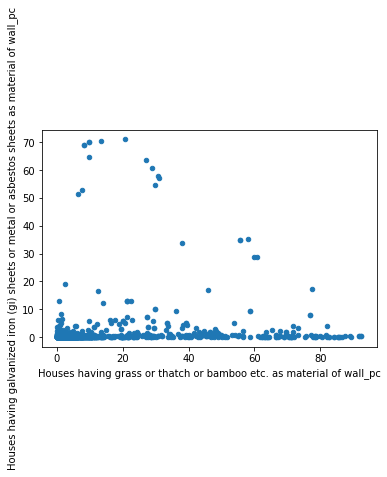

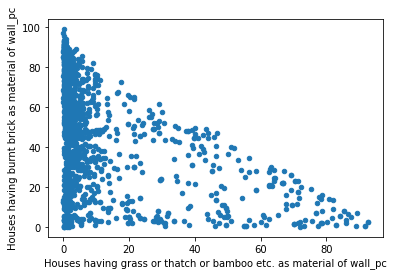

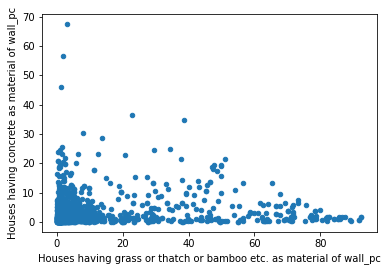

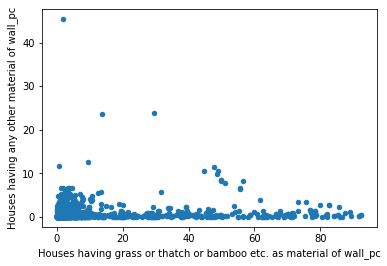

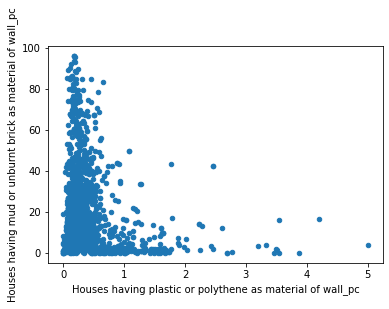

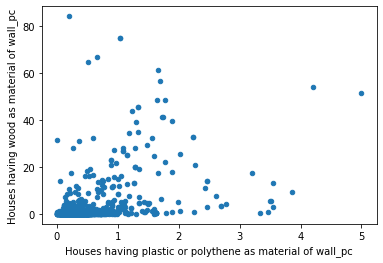

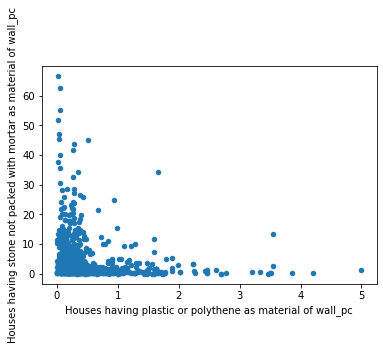

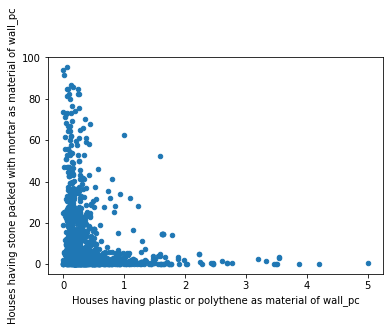

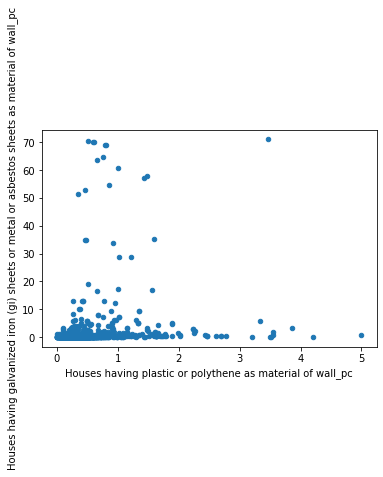

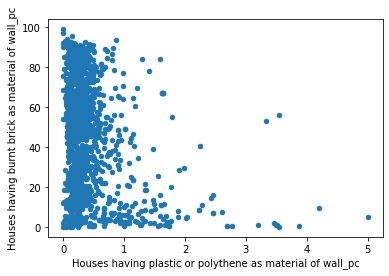

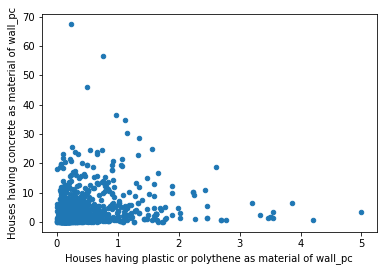

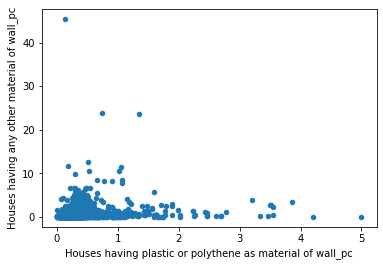

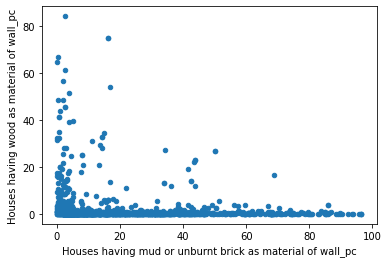

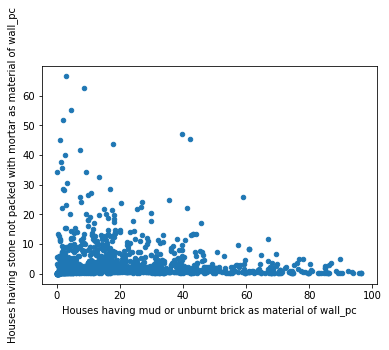

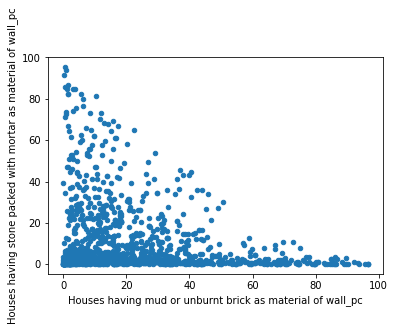

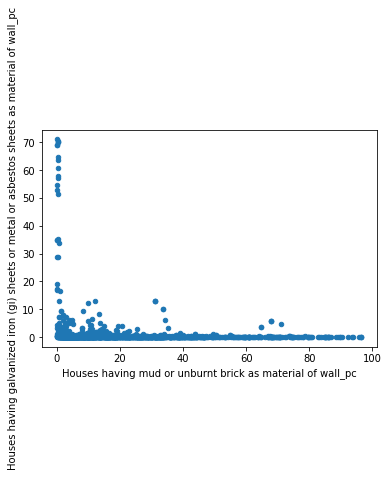

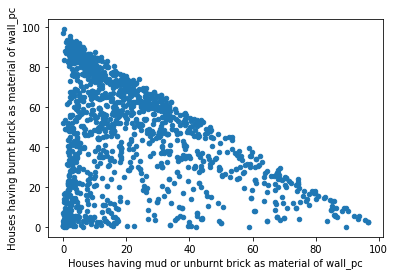

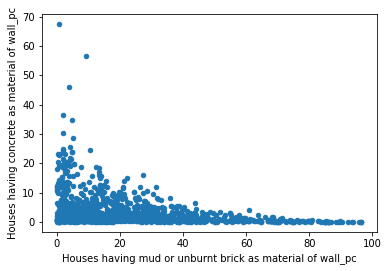

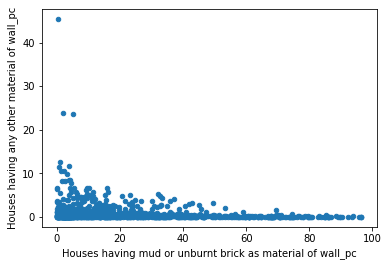

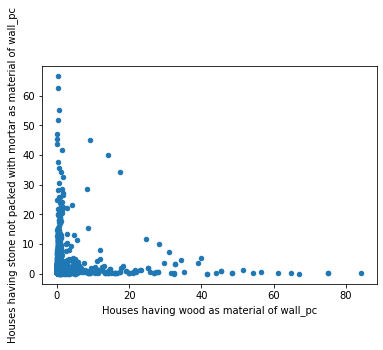

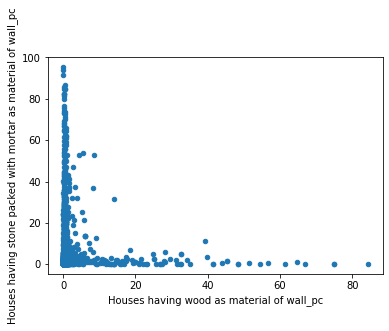

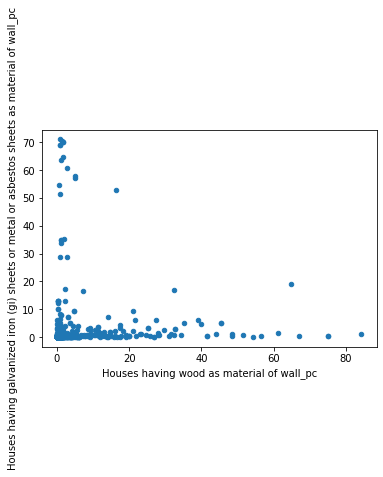

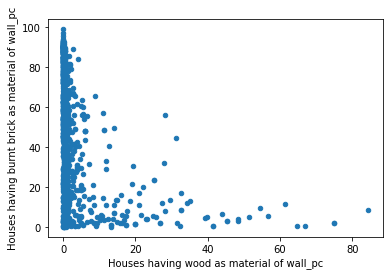

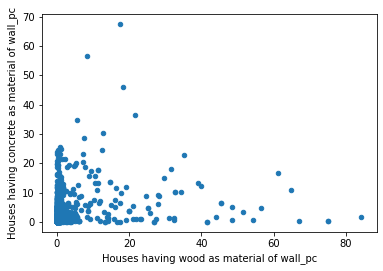

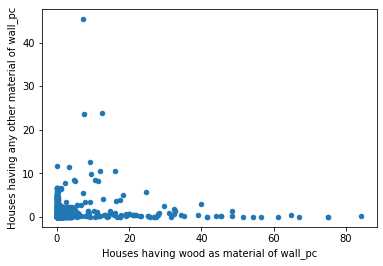

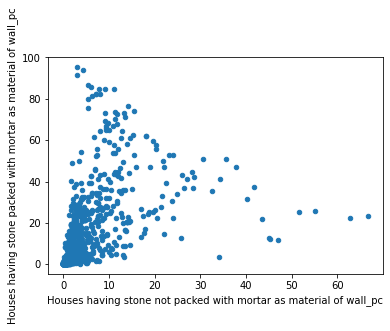

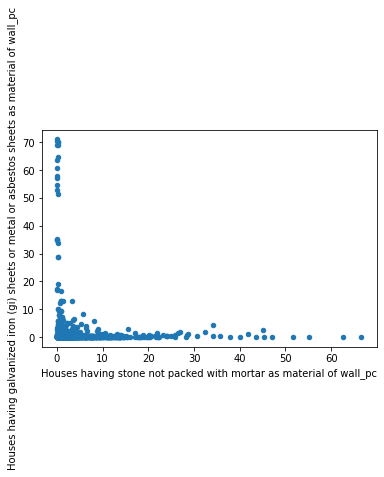

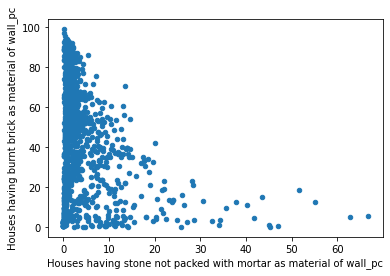

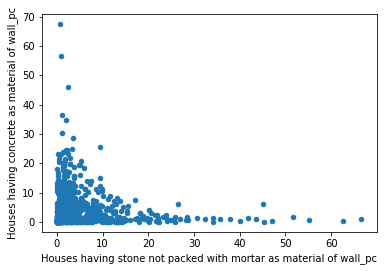

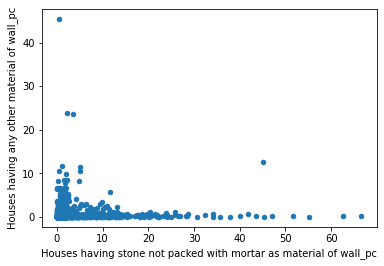

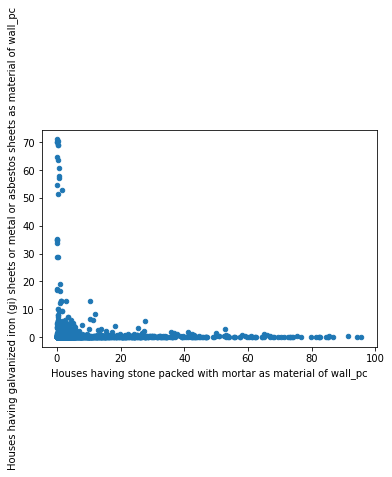

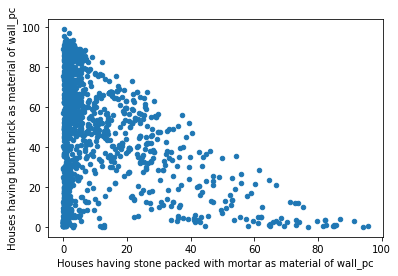

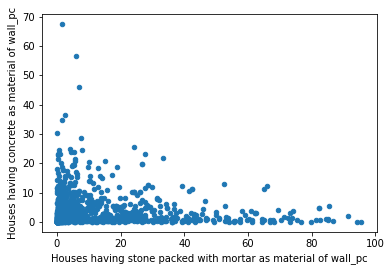

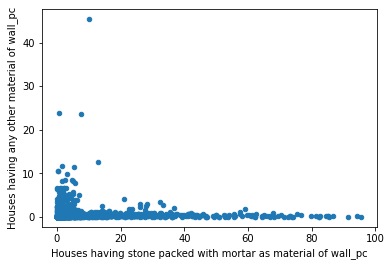

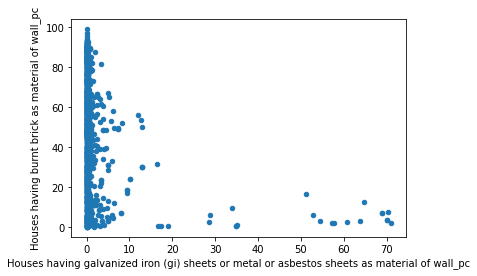

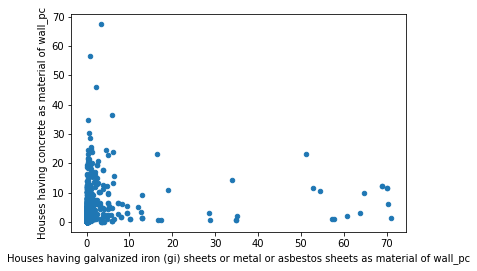

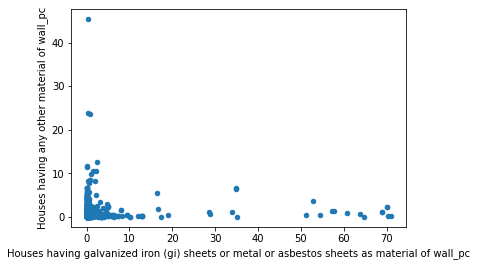

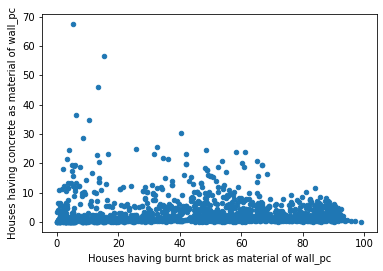

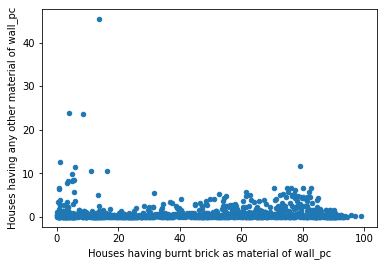

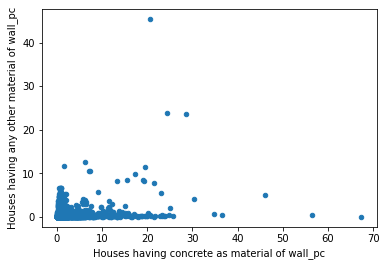

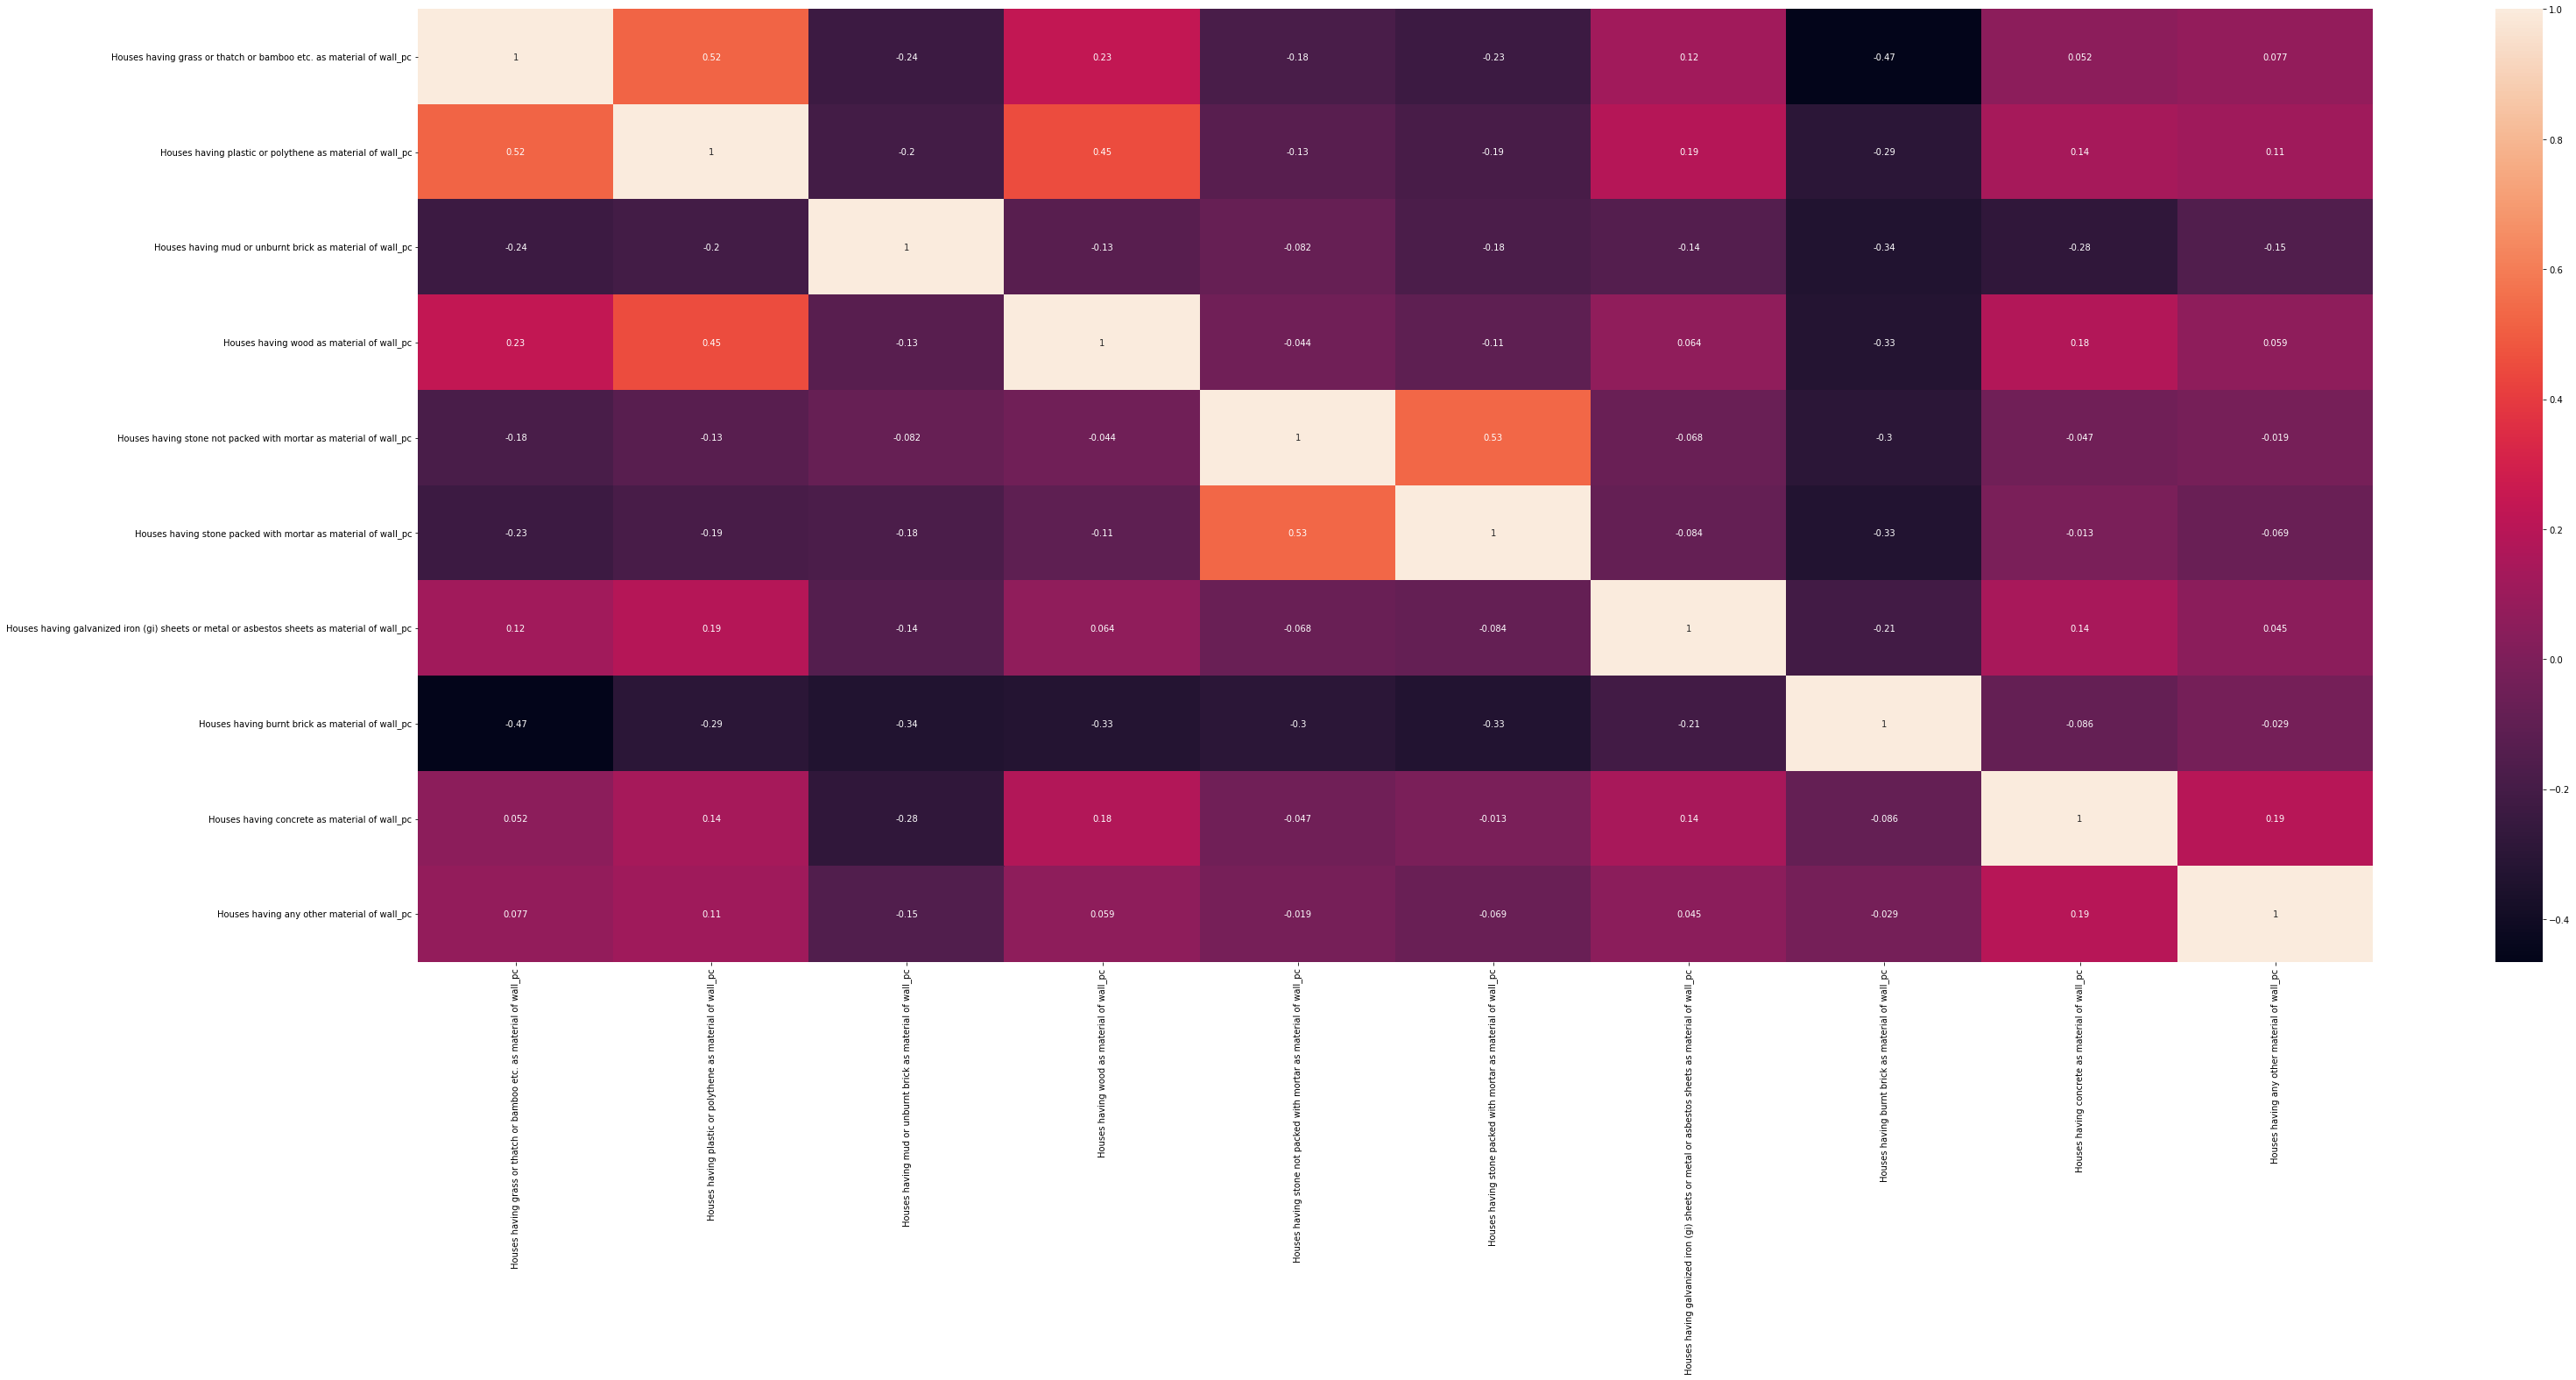

In [ ]:
col_name=df.columns.values
indices=[19, 20, 21, 22, 23, 24, 25, 26, 27, 28] #list of column indices we want to iterate over
temp_df=pd.DataFrame() # take a temporary data frame that will have only the continuous variables
for i in range(len(indices)): #nested loop to consider pairs of columns without any duplicacy
  temp_df[col_name[indices[i]]]=df[col_name[indices[i]]] # add column to the temporary df
  for j in range(i+1,len(indices)):
    df.plot.scatter(indices[i],indices[j]) # scatter plot the columns with indices given are elements of the list indices
fig=pyplot.figure()
fig.set_figwidth(50) #resize the plot
fig.set_figheight(20)
heatmap=sb.heatmap(temp_df.corr(),annot=True) #plotting the colour coded correlation matrix

The new columns which contain percentage wise data display different characteristics to the original columns owing to the fact that total number of houses sampled are not uniform for all rows

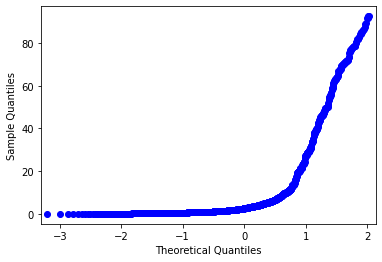

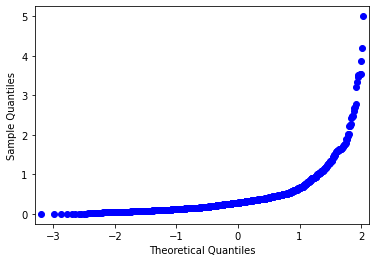

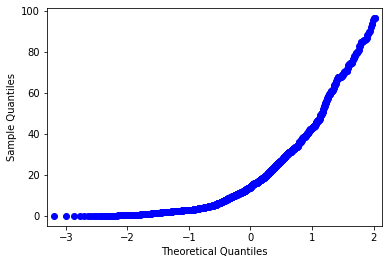

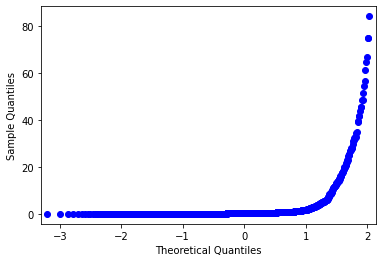

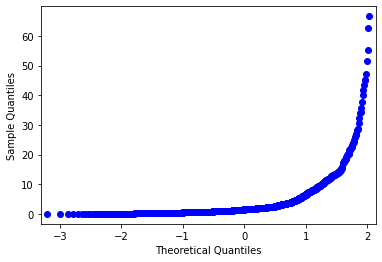

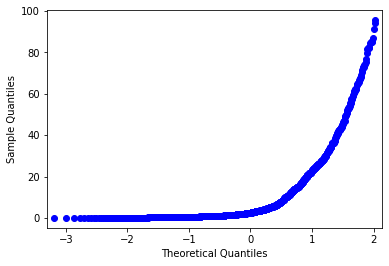

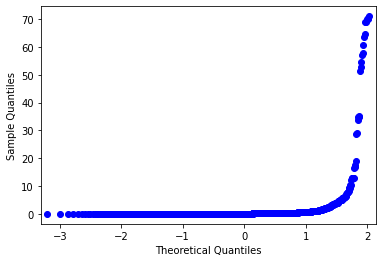

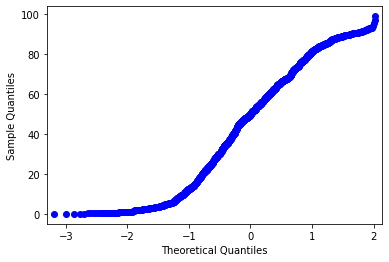

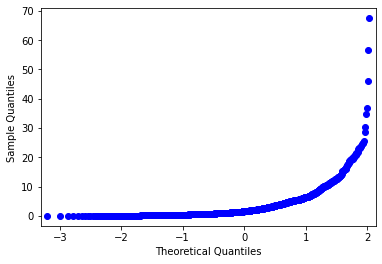

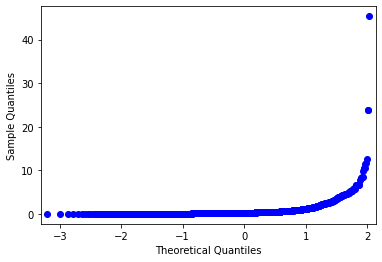

In [ ]:
for col in df.columns[19:]: #iterate over the new columns , their index starts from 19
  sm.qqplot(df[col]) #plot using the statsmodel library
  pyplot.show() #show the plot

None of the fields are drawn from Gaussian as seen by Q-Q plots , sample quantities are much higher than theoretical quantities

The following is the extra EDA

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

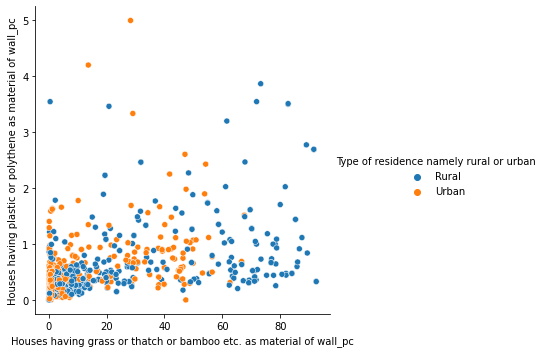

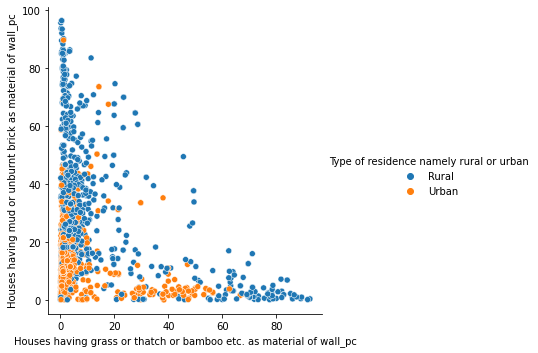

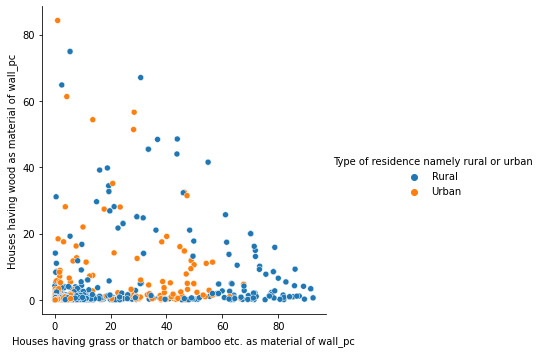

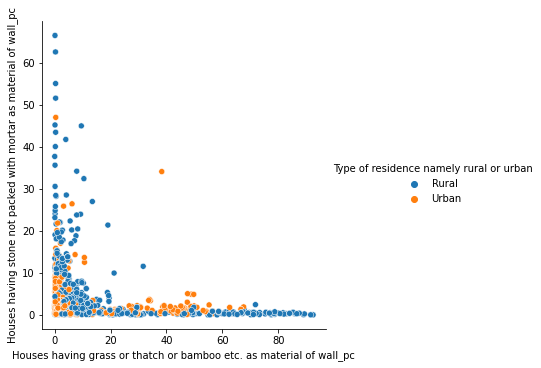

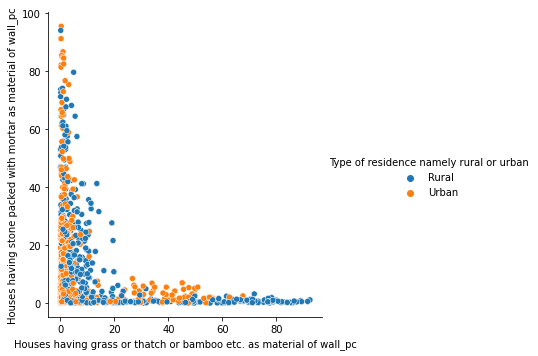

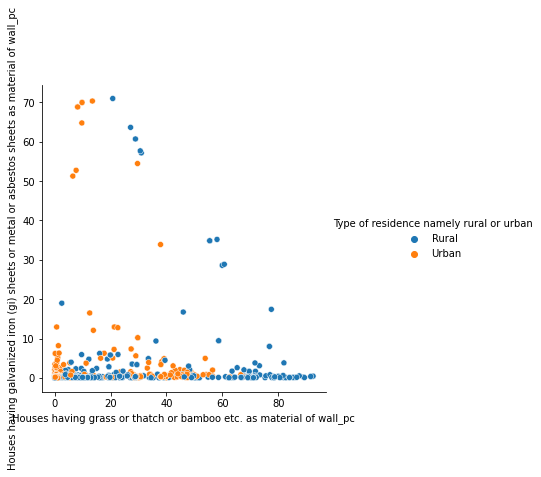

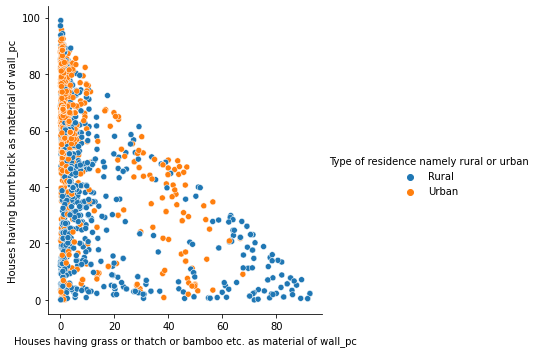

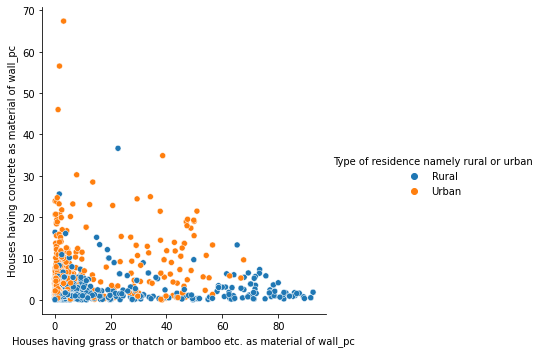

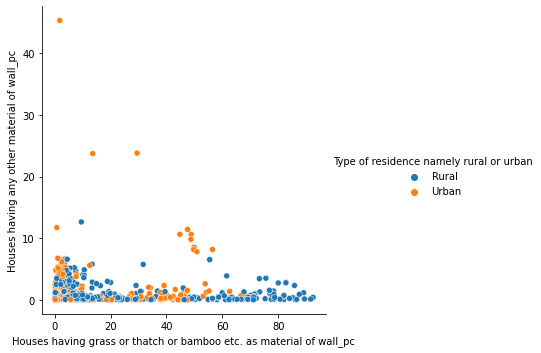

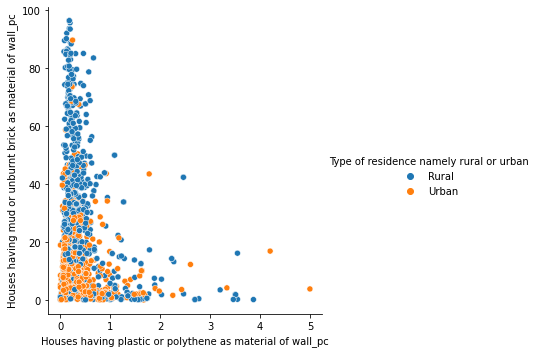

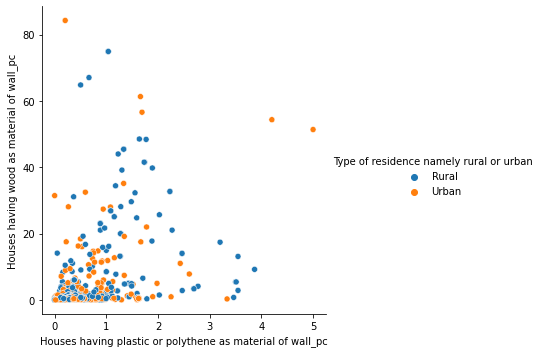

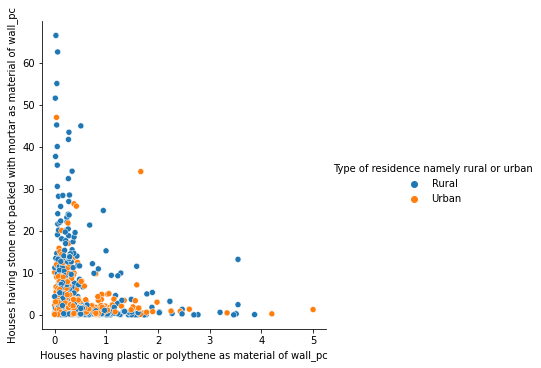

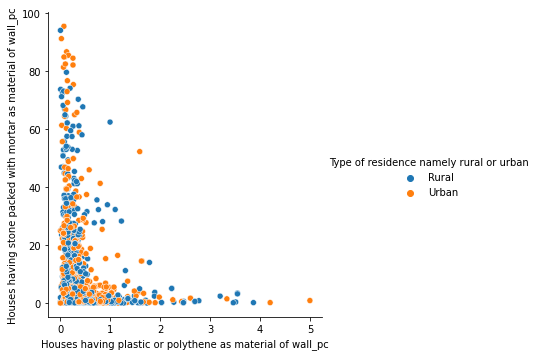

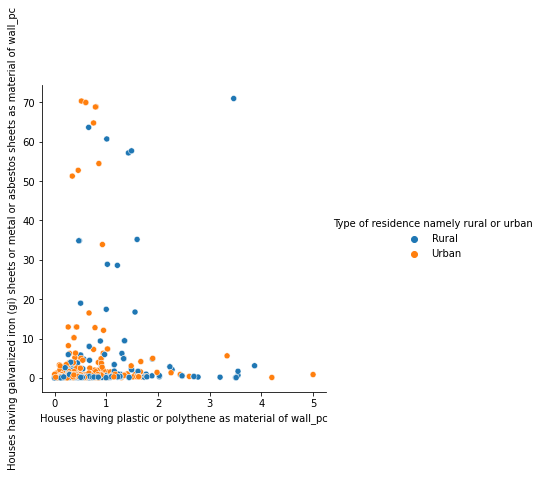

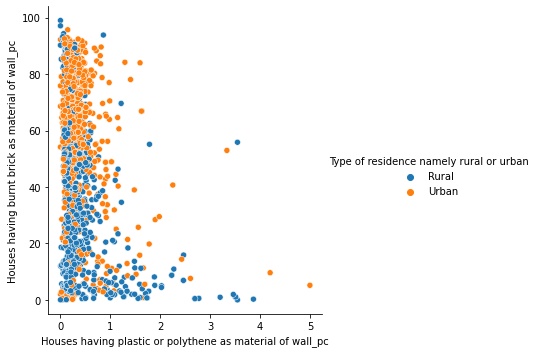

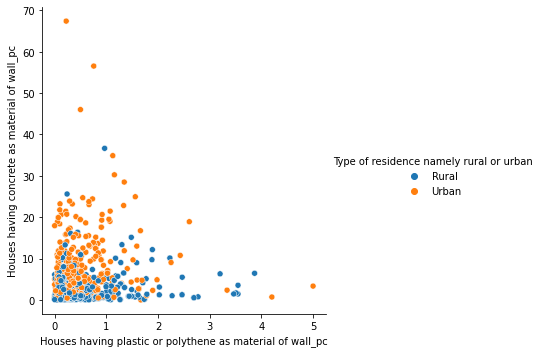

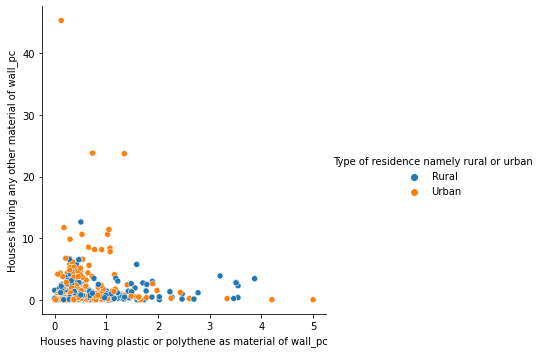

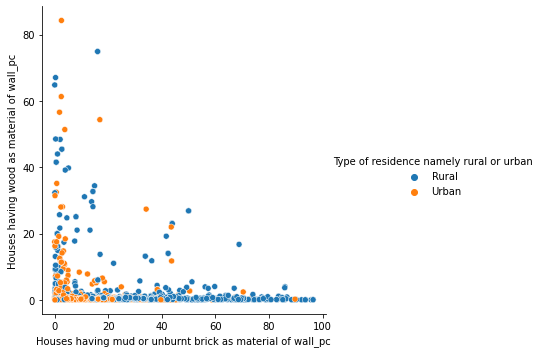

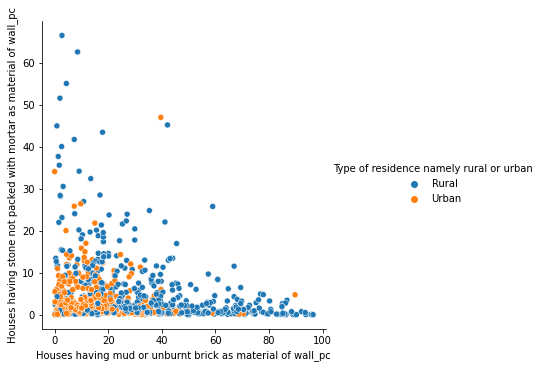

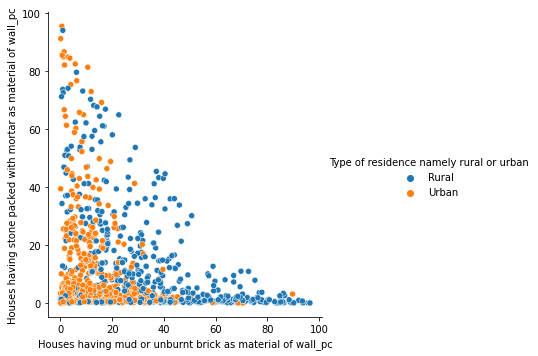

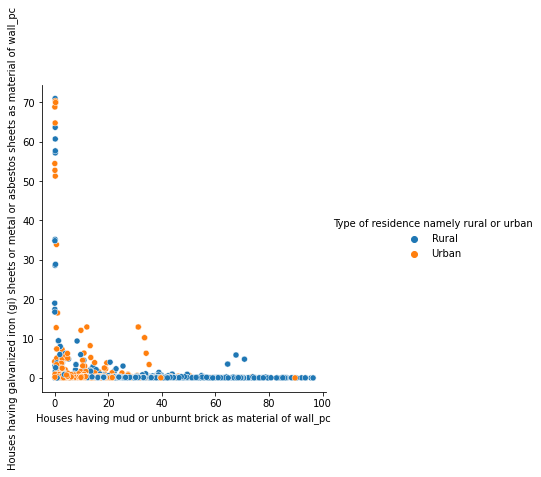

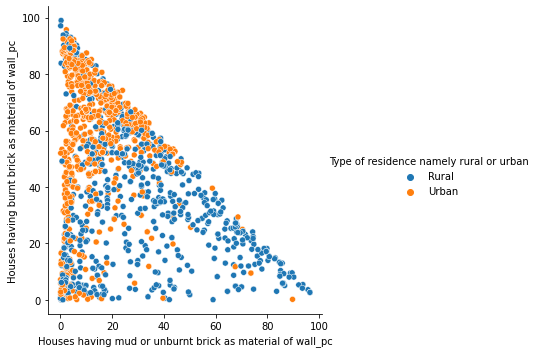

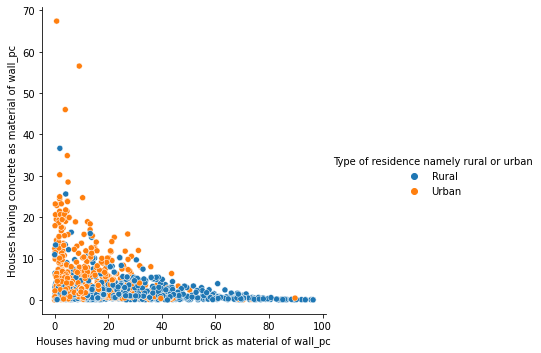

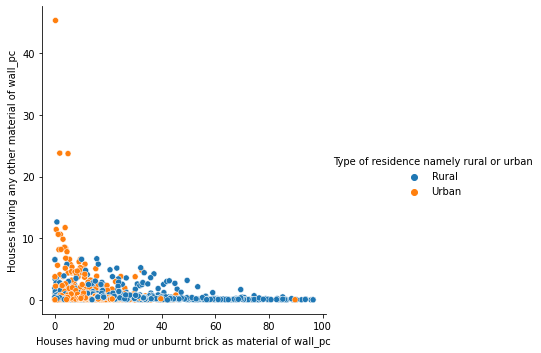

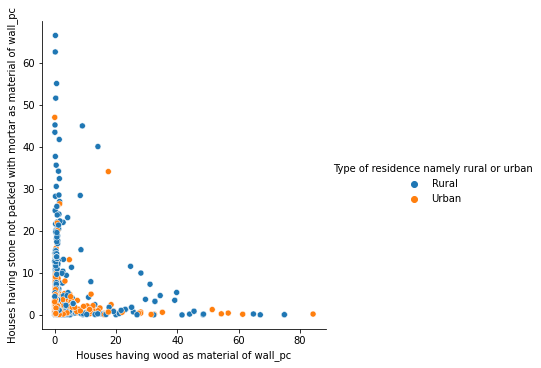

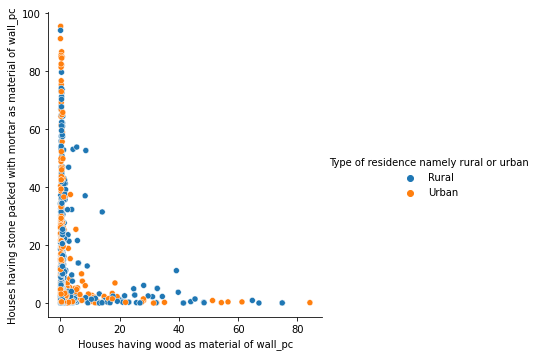

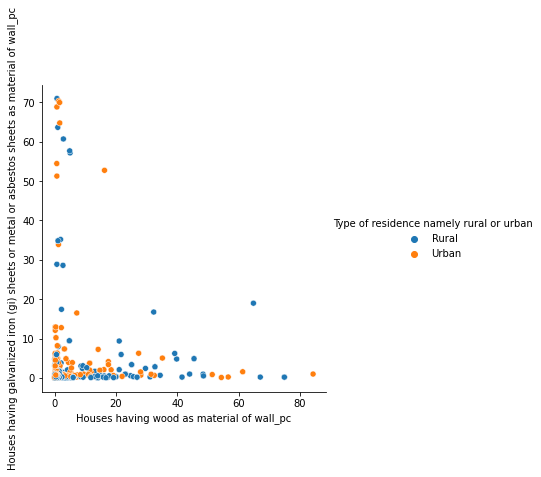

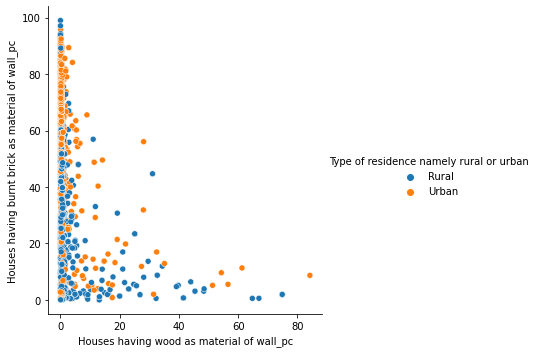

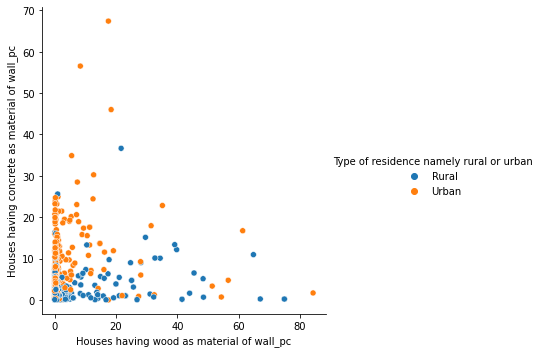

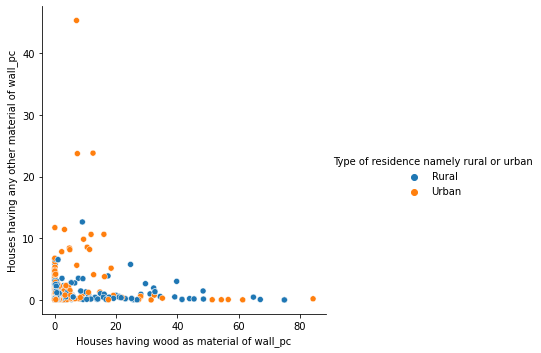

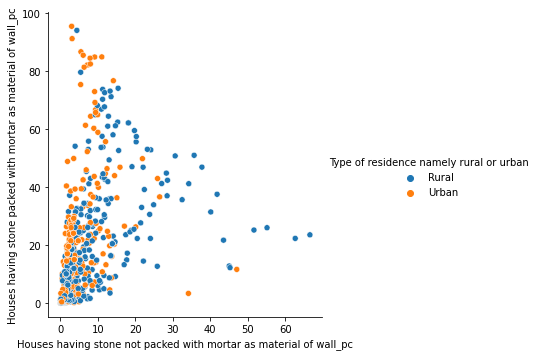

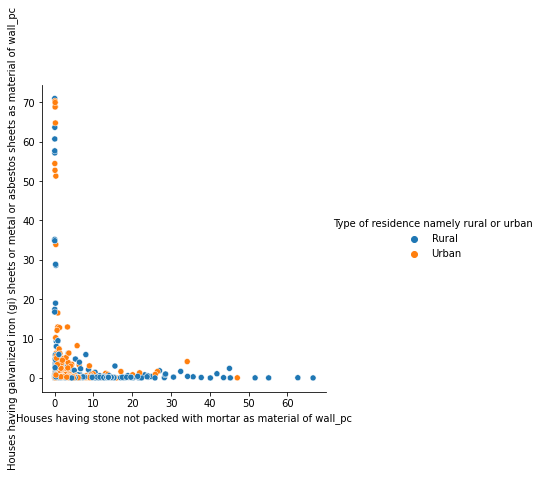

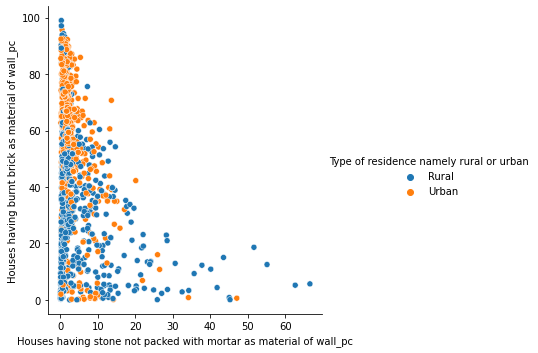

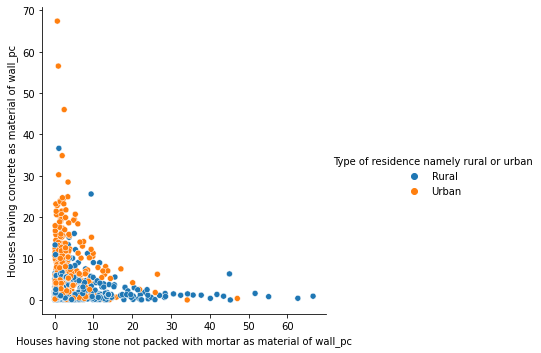

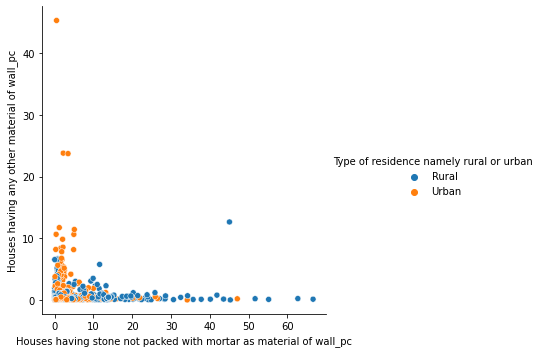

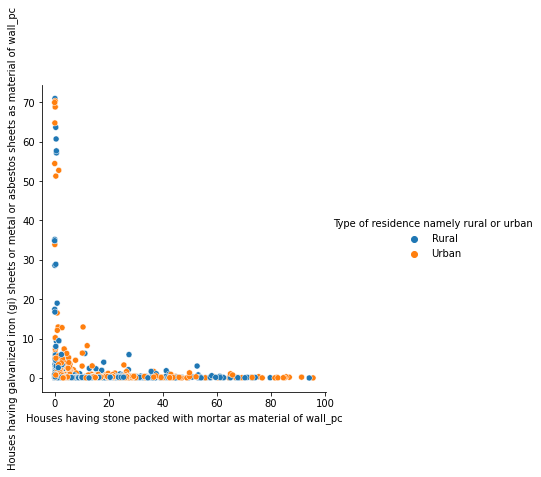

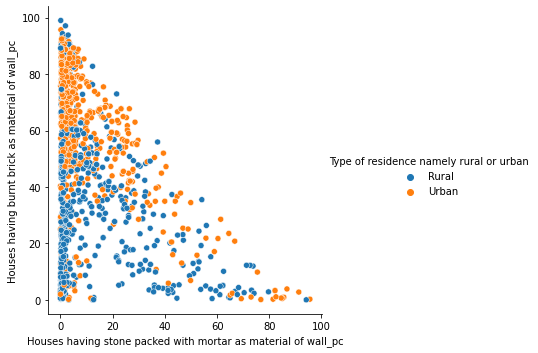

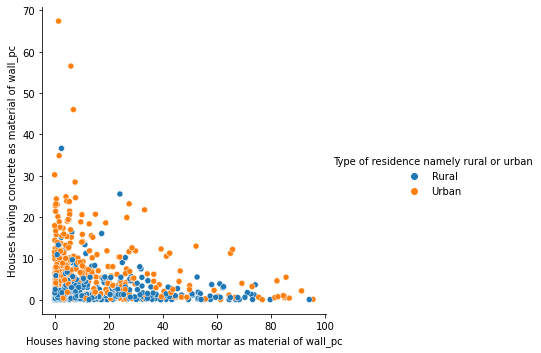

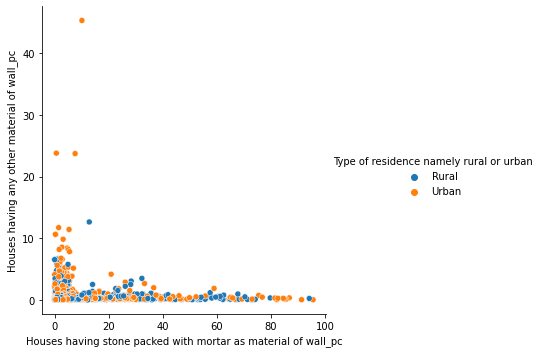

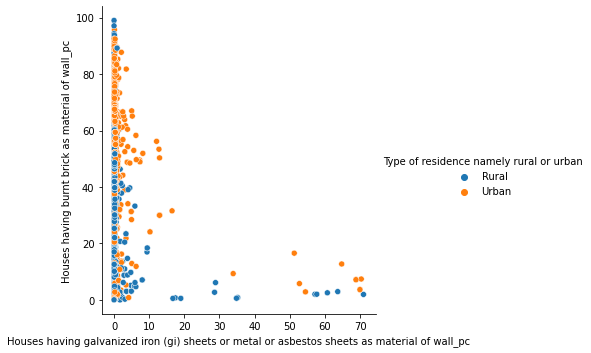

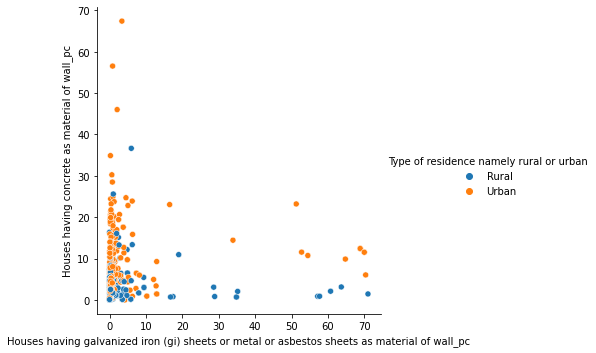

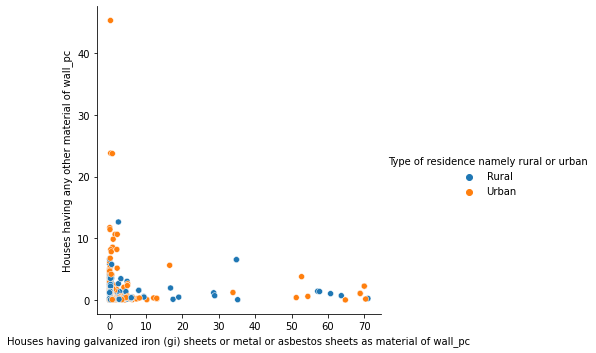

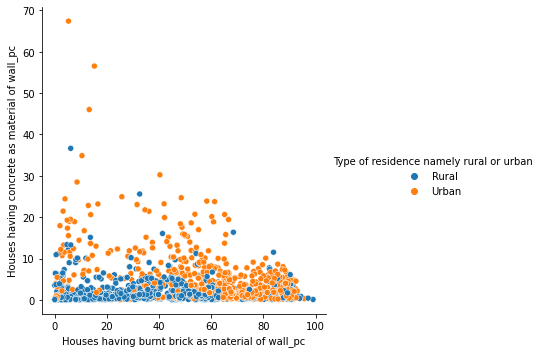

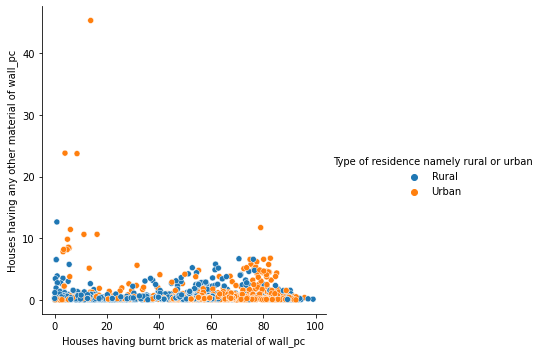

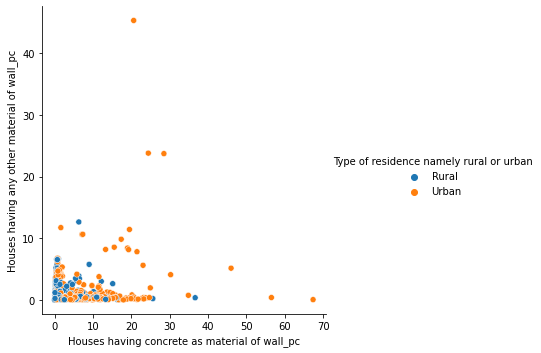

In [ ]:
col_name=df.columns.values
indices=[19, 20, 21, 22, 23, 24, 25, 26, 27, 28] #list of column indices we want to iterate over

for i in range(len(indices)): #nested loop to consider pairs of columns without any duplicacy
  for j in range(i+1,len(indices)):
    sb.relplot(x=df[col_name[indices[i]]],y=df[col_name[indices[j]]],hue=df['Type of residence namely rural or urban']) # scatter plot the columns and segrate datapoints by urban or rural

In quite a few plots the rural and urban dots are inter-mixed well however there are also plots where there is a visible segregation which implies that the percentage of houses is depending on nature of the locality

Andaman And Nicobar Islands Rural Mean 19676.666666666668
Andaman And Nicobar Islands Rural Median 23485.0
Andaman And Nicobar Islands Urban Mean 11448.666666666666
Andaman And Nicobar Islands Urban Median 741.0
Andhra Pradesh Rural Mean 696216.9230769231
Andhra Pradesh Rural Median 692542.0
Andhra Pradesh Urban Mean 277449.92307692306
Andhra Pradesh Urban Median 246396.0
Arunachal Pradesh Rural Mean 7828.56
Arunachal Pradesh Rural Median 7696.0
Arunachal Pradesh Urban Mean 2635.4
Arunachal Pradesh Urban Median 1586.0
Assam Rural Mean 162864.9090909091
Assam Rural Median 165938.0
Assam Urban Mean 30082.757575757576
Assam Urban Median 18031.0
Bihar Rural Mean 445446.2105263158
Bihar Rural Median 403996.5
Bihar Urban Mean 52991.28947368421
Bihar Urban Median 32462.0
Chandigarh Rural Mean 6785.0
Chandigarh Rural Median 6785.0
Chandigarh Urban Mean 228276.0
Chandigarh Urban Median 228276.0
Chhattisgarh Rural Mean 156575.10714285713
Chhattisgarh Rural Median 150953.5
Chhattisgarh Urban Mean

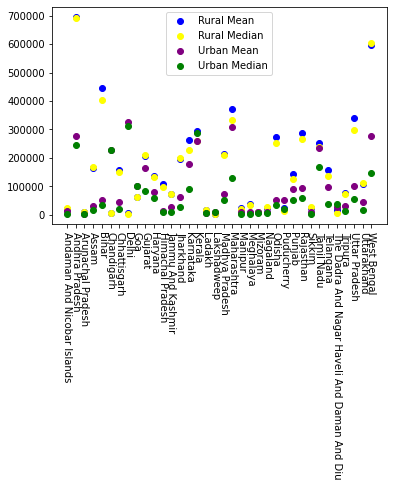

In [ ]:
grouped_data=df.groupby(['State','Type of residence namely rural or urban']) #group the dataframe first by state and then by type of locality
means=grouped_data[df.columns[8]].mean() #calculate mean for total number of houses in census in this grouped data
medians=grouped_data[df.columns[8]].median() #calculate mean for total number of houses in census in this grouped data
state_names=np.sort(df['State'].unique()) #names of states sorted in alphabetical order

for i in range(72): #iterate over 72(=36*2) rows in means and medians
  if i%2==0: #even indices represent rural sub-group of the state
    pyplot.scatter(state_names[i//2],means.iloc()[i],color='blue',label='Rural Mean') #plot the data point
    pyplot.scatter(state_names[i//2],medians.iloc()[i],color='yellow',label='Rural Median') #plot data point

    print(state_names[i//2],'Rural Mean',means.iloc()[i])
    print(state_names[i//2],'Rural Median',medians.iloc()[i])
  else: #odd indices represent rural sub-group of the state
    pyplot.scatter(state_names[i//2],means.iloc()[i],color='purple',label='Urban Mean') #plot data point for mean
    pyplot.scatter(state_names[i//2],medians.iloc()[i],color='green',label='Urban Median') #plot data point for median
    print(state_names[i//2],'Urban Mean',means.iloc()[i])
    print(state_names[i//2],'Urban Median',medians.iloc()[i])

pyplot.xticks(rotation=270) #change ticks for better readability
pyplot.legend(['Rural Mean','Rural Median','Urban Mean','Urban Median']) #show legend
pyplot.show() #show plot

Here we have plotted number of houses sampled per district for a given state and the median of number of houses sampled in a district for a given state. Number per district is a better metric as district sizes are much more consistent than state sizes hence this is preffered over total number of houses surveyed in a district

The above plot indicates that for certain states houses surveyed per district in rural areas are much more than houses in urban areas. The average number of houses surveyed per district is much more consistent over states for urban areas than it is for rural areas  

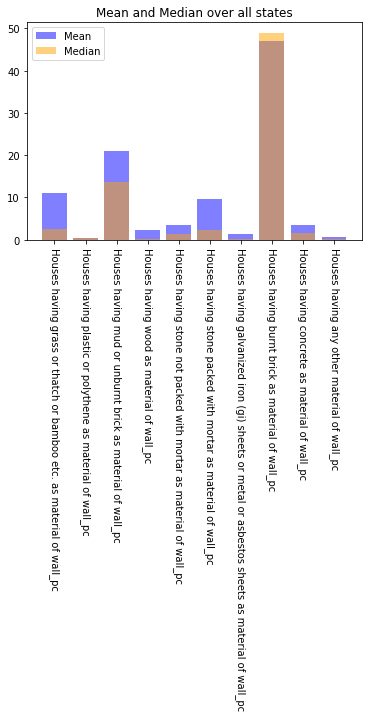

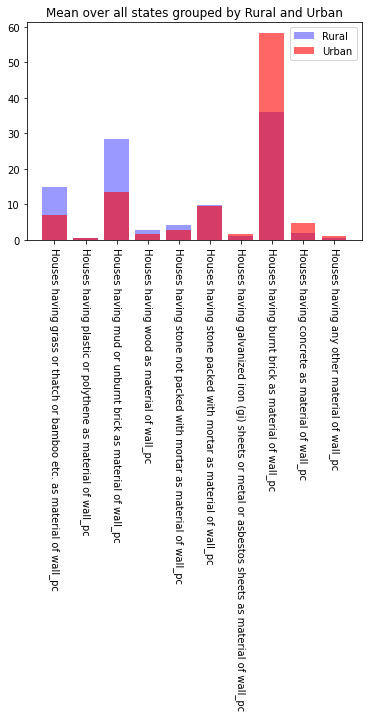

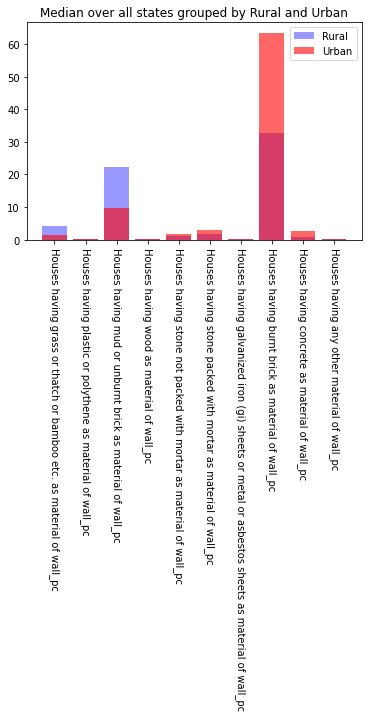

In [ ]:
for col in df.columns.values[19:]: #iterate over the percentage wise columns
  pyplot.bar(col,df[col].mean(),label='Mean',color='blue',alpha=0.5) #plot the mean
  pyplot.bar(col,df[col].median(),label='Median',color='orange',alpha=0.5) #plot the median
pyplot.legend(['Mean','Median']) #show legend
pyplot.xticks(rotation=270) #rotate ticks
pyplot.title('Mean and Median over all states')
pyplot.show() #show plot
grouped_area=df.groupby(['Type of residence namely rural or urban'])
for col in df.columns.values[19:]: #iterate over the percentage wise columns
  for i in range(len(grouped_area[col].mean())): #iterate over over rural and urban
    if i%2==0: #even indices are rural in the grouping
      pyplot.bar(col,grouped_area[col].mean().iloc()[i],label='Rural',color='blue',alpha=0.4) #plot the mean
    else: #odd indices are urban in the grouping
      pyplot.bar(col,grouped_area[col].mean().iloc()[i],label='Urban',color='red',alpha=0.6)
pyplot.legend(['Rural','Urban']) #show legend
pyplot.xticks(rotation=270) #rotate ticks
pyplot.title('Mean over all states grouped by Rural and Urban')
pyplot.show() #show plot
for col in df.columns.values[19:]: #iterate over the percentage wise columns
  for i in range(len(grouped_area[col].median())):#iterate over rural and urban
    if i%2==0:
      pyplot.bar(col,grouped_area[col].median().iloc()[i],label='Rural',color='blue',alpha=0.4) #plot the median
    else:
      pyplot.bar(col,grouped_area[col].median().iloc()[i],label='Urban',color='red',alpha=0.6)
pyplot.legend(['Rural','Urban']) #show legend
pyplot.xticks(rotation=270) #rotate ticks
pyplot.title('Median over all states grouped by Rural and Urban')
pyplot.show() #show plot


The above data depicts nature of wall material over all states, from the first graph we can infer that the most popular material is burnt brick which is present in ~45% houses. However distribuition of burnt brick is disproportionately more in urban areas than in rural areas. Rural areas have a higher percentage of mud/unburnt brick and grass/thatch as compared to urban areas